In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

# –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ –¥–ª—è –ø–æ—Ç—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π ML

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold) 

from sklearn.preprocessing import OrdinalEncoder

from sklearn.feature_selection import RFE

from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# –∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞
from sklearn.metrics import (recall_score, 
                             confusion_matrix)


In [2]:
from pandas_profiling import ProfileReport

–ò–∑—É—á–∏–º –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç

In [52]:
heart = pd.read_csv("train.csv")
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     955 non-null    object 
 1   –ü–æ–ª                                    954 non-null    object 
 2   –°–µ–º—å—è                                  955 non-null    object 
 3   –≠—Ç–Ω–æ—Å                                  955 non-null    object 
 4   –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å                         955 non-null    object 
 5   –†–µ–ª–∏–≥–∏—è                                955 non-null    object 
 6   –û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ                            955 non-null    object 
 7   –ü—Ä–æ—Ñ–µ—Å—Å–∏—è                              955 non-null    object 
 8   –í—ã —Ä–∞–±–æ—Ç–∞–µ—Ç–µ?                          955 non-null    int64  
 9   –í—ã—Ö–æ–¥ –Ω–∞ –ø–µ–Ω—Å–∏—é                        955 non-null    int64  
 

In [39]:
heart.head(5)

ID –ü–æ–ª                      –°–µ–º—å—è        –≠—Ç–Ω–æ—Å –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å  \
0  54-102-358-02   –ú  –≤ –±—Ä–∞–∫–µ –≤ –Ω–∞—Å—Ç–æ—è—â–µ–µ –≤—Ä–µ–º—è  –µ–≤—Ä–æ–ø–µ–π—Å–∫–∞—è        –†—É—Å—Å–∫–∏–µ   
1  54-103-101-01   –ñ                  –≤ —Ä–∞–∑–≤–æ–¥–µ  –µ–≤—Ä–æ–ø–µ–π—Å–∫–∞—è        –†—É—Å—Å–∫–∏–µ   
2  54-501-026-03   –ñ  –≤ –±—Ä–∞–∫–µ –≤ –Ω–∞—Å—Ç–æ—è—â–µ–µ –≤—Ä–µ–º—è  –µ–≤—Ä–æ–ø–µ–π—Å–∫–∞—è        –†—É—Å—Å–∫–∏–µ   
3  54-501-094-02   –ú  –≤ –±—Ä–∞–∫–µ –≤ –Ω–∞—Å—Ç–æ—è—â–µ–µ –≤—Ä–µ–º—è  –µ–≤—Ä–æ–ø–µ–π—Å–∫–∞—è        –†—É—Å—Å–∫–∏–µ   
4  54-503-022-01   –ñ  –≤ –±—Ä–∞–∫–µ –≤ –Ω–∞—Å—Ç–æ—è—â–µ–µ –≤—Ä–µ–º—è  –µ–≤—Ä–æ–ø–µ–π—Å–∫–∞—è        –†—É—Å—Å–∫–∏–µ   

             –†–µ–ª–∏–≥–∏—è                                        –û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ  \
0       –•—Ä–∏—Å—Ç–∏–∞–Ω—Å—Ç–≤–æ  3 - —Å—Ä–µ–¥–Ω—è—è —à–∫–æ–ª–∞ / –∑–∞–∫–æ–Ω.—Å—Ä–µ–¥–Ω–µ–µ / –≤—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ   
1       –•—Ä–∏—Å—Ç–∏–∞–Ω—Å—Ç–≤–æ                                            5 - –í–£–ó   
2       –•—Ä–∏—Å—Ç–∏–∞–Ω—Å—Ç–≤–æ                                            5 - –í–£–ó   
3  –ê—Ç–µ–∏—Å—Ç / –∞–≥–Ω–æ—Å—Ç–∏–∫  3 - —Å—Ä–µ–¥–Ω—è—è —à–∫–æ–ª–∞ / –∑–∞–∫–æ–Ω.—Å—Ä–µ–¥–Ω–µ–µ / –≤—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ   
4       –•—Ä–∏—Å—Ç–∏–∞–Ω—Å—Ç–≤–æ  3 - —Å—Ä–µ–¥–Ω—è—è —à–∫–æ–ª–∞ / –∑–∞–∫–æ–Ω.—Å—Ä–µ–¥–Ω–µ–µ / –≤—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ   

                                           –ü—Ä–æ—Ñ–µ—Å—Å–∏—è  –í—ã —Ä–∞–±–æ—Ç–∞–µ—Ç–µ?  \
0                   –Ω–∏–∑–∫–æ–∫–≤–∞–ª–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Ä–∞–±–æ—Ç–Ω–∏–∫–∏              1   
1                        –¥–∏–ø–ª–æ–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—ã              0   
2                        –¥–∏–ø–ª–æ–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—ã              0   
3                   –Ω–∏–∑–∫–æ–∫–≤–∞–ª–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Ä–∞–±–æ—Ç–Ω–∏–∫–∏              1   
4  –æ–ø–µ—Ä–∞—Ç–æ—Ä—ã –∏ –º–æ–Ω—Ç–∞–∂–Ω–∏–∫–∏ —É—Å—Ç–∞–Ω–æ–≤–æ–∫ –∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ...              0   

   –í—ã—Ö–æ–¥ –Ω–∞ –ø–µ–Ω—Å–∏—é  ...  –í—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è  –°–æ–Ω –ø–æ—Å–ª–µ –æ–±–µ–¥–∞  –°–ø–æ—Ä—Ç, –∫–ª—É–±—ã  \
0                0  ...           06:00:00                0             0   
1                0  ...           04:00:00                1             0   
2                0  ...           07:00:00                0             0   
3                0  ...           07:00:00                0             0   
4                0  ...           06:00:00                0             0   

   –†–µ–ª–∏–≥–∏—è, –∫–ª—É–±—ã           ID_y  –ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è  –û–ù–ú–ö  \
0               0  54-102-358-02                         0     0   
1               0  54-103-101-01                         1     1   
2               0  54-501-026-03                         0     0   
3               0  54-501-094-02                         1     0   
4               0  54-503-022-01                         1     0   

   –°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞  –°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å  \
0                                   0                          0   
1                                   0                          0   
2                                   0                          0   
3                                   0                          0   
4                                   1                          1   

   –ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 39 columns]

In [53]:
–ó–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Ä—è–¥–µ —Å—Ç–æ–ª–±—Ü–æ–≤ –Ω–∞ –Ω—É–ª–∏, –∞ —Ç–∞–∫–∂–µ —Å–æ–∑–¥–∞–¥–∏–º —Å—Ç–æ–ª–±—Ü—ã —Å —á–∞—Å–∞–º–∏ –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è –∏ –∑–∞—Å—ã–ø–∞–Ω–∏—è. 

In [53]:
heart = heart.fillna(0)
heart[heart["–ü–æ–ª"] == 0]
heart = heart.drop(index=[304]).reset_index()

heart['–í—Ä–µ–º—è –∑–∞—Å—ã–ø–∞–Ω–∏—è'] = heart['–í—Ä–µ–º—è –∑–∞—Å—ã–ø–∞–Ω–∏—è'].astype('datetime64')
heart['–í—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'] = heart['–í—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'].astype('datetime64')

heart.insert(34, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è', heart['–í—Ä–µ–º—è –∑–∞—Å—ã–ø–∞–Ω–∏—è'].dt.hour, True)
heart.insert(35, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è', heart['–í—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'].dt.hour, True)

–î–ª—è –±–æ–ª–µ–µ –¥–µ—Ç–∞–ª—å–Ω–æ–≥–æ –∏–∑—É—á–µ–Ω–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞ –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –±–∏–±–ª–∏–æ—Ç–µ–∫–æ–π Pandas Profiling –∏ –ø–æ–ª—É—á–∏–º –ø–æ–¥—Ä–æ–±–Ω—ã–π –æ—Ç—á–µ—Ç –æ –¥–∞–Ω–Ω—ã—Ö, 
–≤–∫–ª—é—á–∞—è —Ä–∞—Å—á–µ—Ç –±–∞–∑–æ–≤—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫

In [91]:
report = ProfileReport(heart, title="Pandas Profiling Report")
report.to_file("my_report.html")
report.to_widgets()

Summarize dataset:   0%|          | 0/56 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
–î–æ–±–∞–≤–∏–º –µ—â–µ –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫ - –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞

In [54]:
heart.insert(36, '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞', 0, True)
for num in range(0, 954):
    if heart.loc[num, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è'] > heart.loc[num, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è']:
        heart.loc[num, '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞'] =  heart.loc[num, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'] - heart.loc[num, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è'] + 24
    elif heart.loc[num, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è'] == 12:
        heart.loc[num, '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞'] = heart.loc[num, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è']     
    else:
        heart.loc[num, '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞'] =  heart.loc[num, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'] - heart.loc[num, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è']
        
# –ø–µ—Ä–µ–º–µ—Å—Ç–∏–º —Ä—è–¥ —Å—Ç–æ–ª–±—Ü–æ–≤ 
heart.insert(34, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è', heart['–í—Ä–µ–º—è –∑–∞—Å—ã–ø–∞–Ω–∏—è'].dt.hour, True)
heart.insert(35, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è', heart['–í—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'].dt.hour, True)

–†—è–¥ –±–∏–Ω–∞—Ä–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∏ –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —Ç–∞–∫–∏–µ –∫–∞–∫, —Å—Ç–∞—Ç—É—Å –∫—É—Ä–µ–Ω–∏—è, —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –∞–ª–∫–æ–≥–æ–ª—è, –ø—Ä–∏–µ–º –ª–µ–∫–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã—Ö 
—Å—Ä–µ–¥—Å—Ç–≤, –º–æ–≥—É—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω—ã —Å –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è–º–∏.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∏ –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è "–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è"

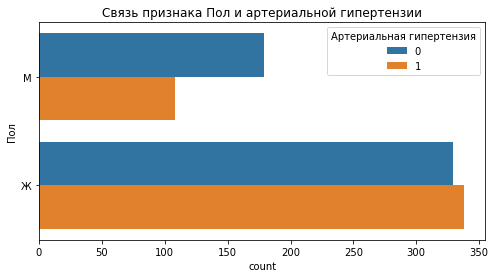

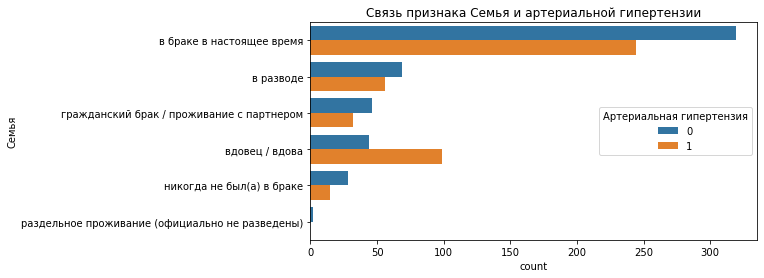

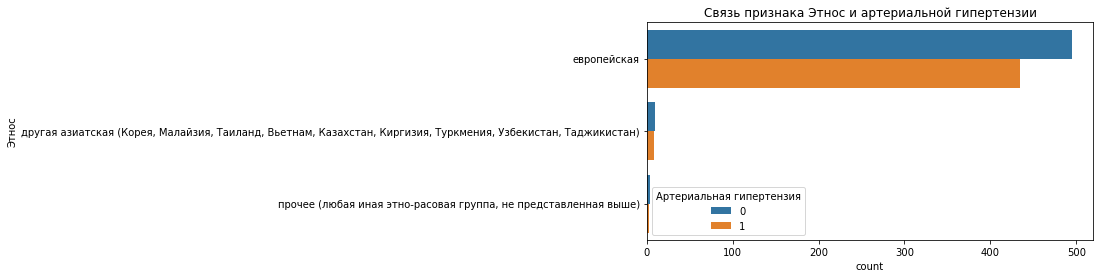

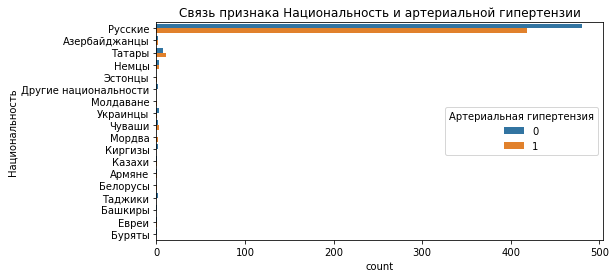

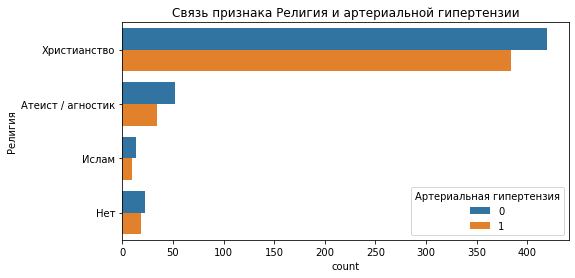

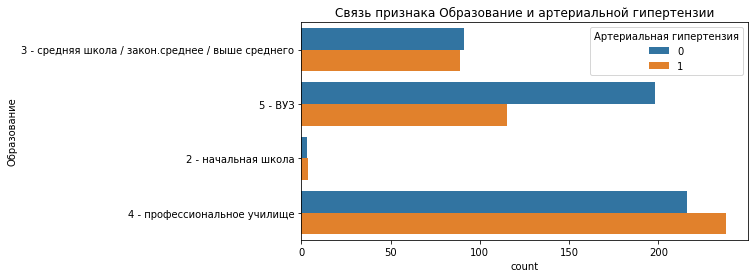

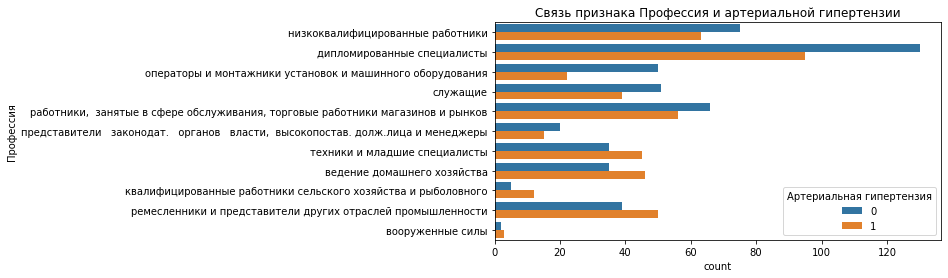

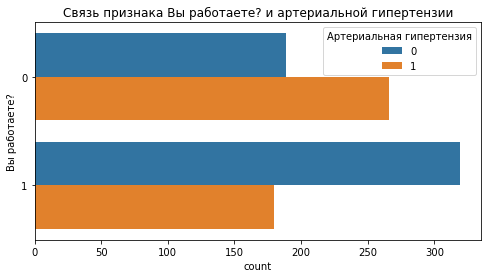

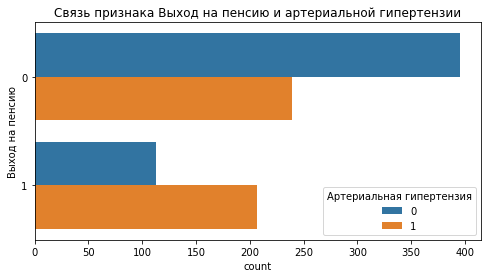

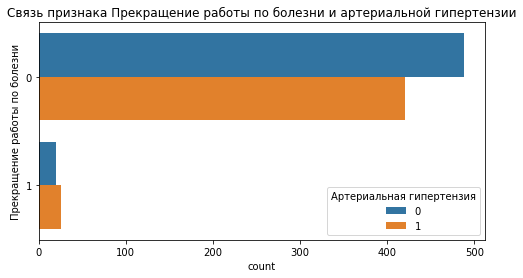

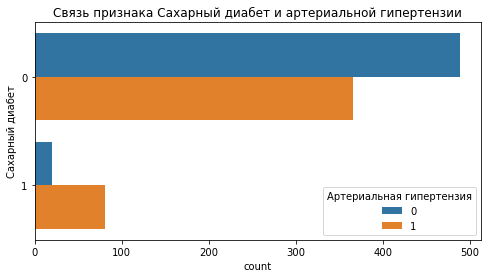

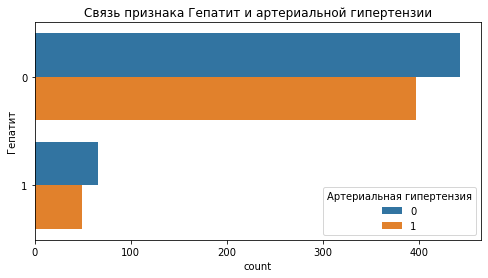

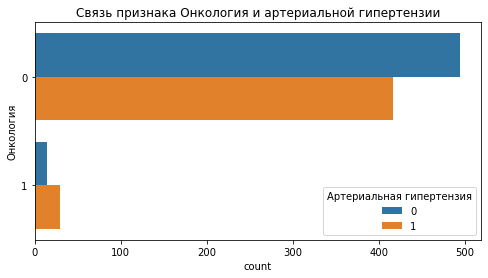

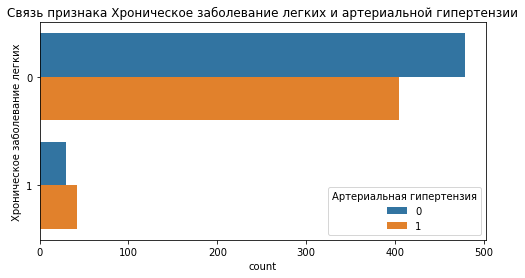

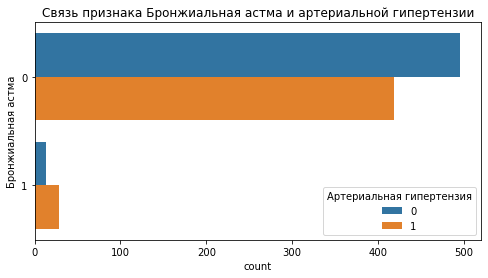

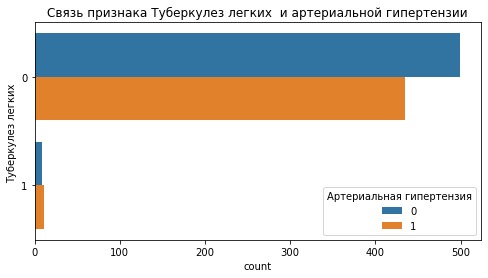

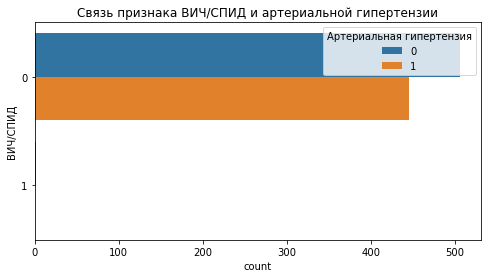

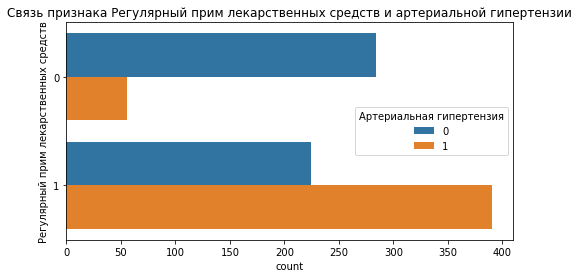

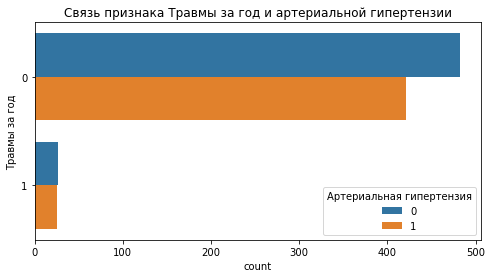

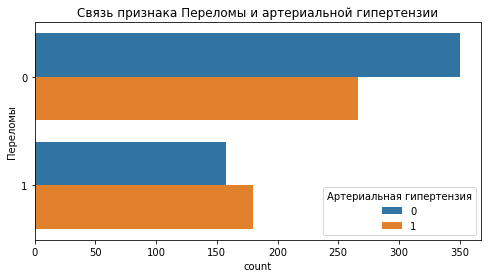

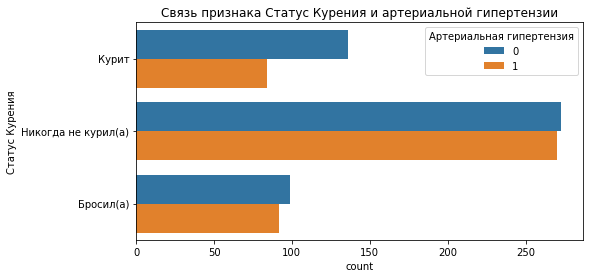

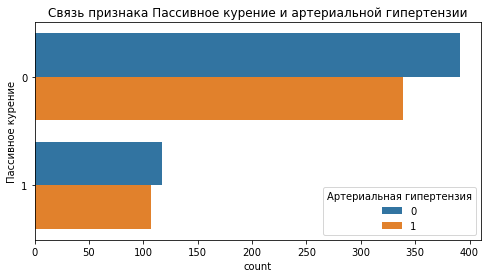

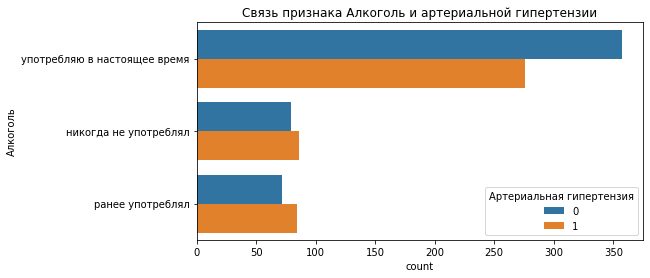

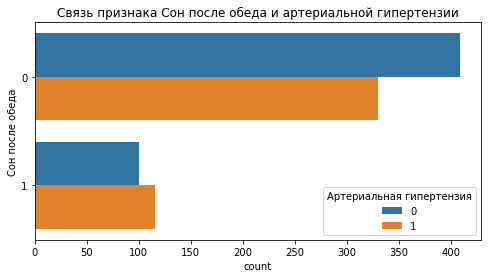

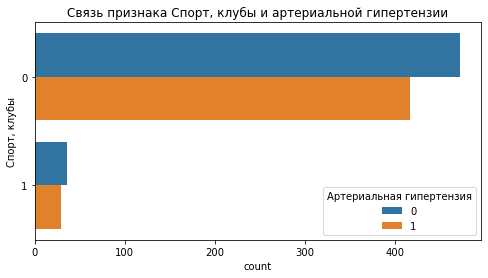

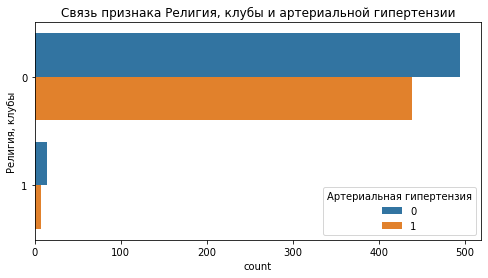

In [65]:
# –∑–∞–∫–∏–Ω–µ–º –≤—Å–µ –∏–º–µ–Ω–∞ –∫–æ–ª–æ–Ω–æ–∫ —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º –∏ –±–∏–Ω–∞—Ä–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏(–∫—Ä–æ–º–µ —Ü–µ–ª–æ–≤–æ–≥–æ)
# –≤ –æ–¥–∏–Ω —Å–ø–∏–æ–∫

cat_names_list = ['–ü–æ–ª', '–°–µ–º—å—è', '–≠—Ç–Ω–æ—Å', '–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å', '–†–µ–ª–∏–≥–∏—è', '–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ', '–ü—Ä–æ—Ñ–µ—Å—Å–∏—è', 
                 '–í—ã —Ä–∞–±–æ—Ç–∞–µ—Ç–µ?', '–í—ã—Ö–æ–¥ –Ω–∞ –ø–µ–Ω—Å–∏—é', '–ü—Ä–µ–∫—Ä–∞—â–µ–Ω–∏–µ —Ä–∞–±–æ—Ç—ã –ø–æ –±–æ–ª–µ–∑–Ω–∏', '–°–∞—Ö–∞—Ä–Ω—ã–π –¥–∏–∞–±–µ—Ç', 
                 '–ì–µ–ø–∞—Ç–∏—Ç', '–û–Ω–∫–æ–ª–æ–≥–∏—è', '–•—Ä–æ–Ω–∏—á–µ—Å–∫–æ–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ –ª–µ–≥–∫–∏—Ö', '–ë—Ä–æ–Ω–∂–∏–∞–ª—å–Ω–∞—è –∞—Å—Ç–º–∞', 
                 '–¢—É–±–µ—Ä–∫—É–ª–µ–∑ –ª–µ–≥–∫–∏—Ö ', '–í–ò–ß/–°–ü–ò–î', '–†–µ–≥—É–ª—è—Ä–Ω—ã–π –ø—Ä–∏–º –ª–µ–∫–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤', '–¢—Ä–∞–≤–º—ã –∑–∞ –≥–æ–¥', 
                 '–ü–µ—Ä–µ–ª–æ–º—ã', '–°—Ç–∞—Ç—É—Å –ö—É—Ä–µ–Ω–∏—è', '–ü–∞—Å—Å–∏–≤–Ω–æ–µ –∫—É—Ä–µ–Ω–∏–µ', '–ê–ª–∫–æ–≥–æ–ª—å', '–°–æ–Ω –ø–æ—Å–ª–µ –æ–±–µ–¥–∞', '–°–ø–æ—Ä—Ç, –∫–ª—É–±—ã',
                 '–†–µ–ª–∏–≥–∏—è, –∫–ª—É–±—ã']

# –ø–æ—Å—Ç—Ä–æ–∏–º —Å—Ç–æ–ª–±—á–∞—Ç—ã–µ –¥–∏–∞–≥—Ä–∞–º–º—ã —Å–≤—è–∑–µ–π –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –∑–∞–±–æ–ª–µ–≤–Ω–∞–∏—è
for col in cat_names_list:
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.countplot(y=col, hue='–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è', data=heart)
    ax.set_title('–°–≤—è–∑—å –ø—Ä–∏–∑–Ω–∞–∫–∞ {} –∏ –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–π –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏–∏'.format(col))
    plt.show()

–í–∑–≥–ª—è–Ω–µ–º –Ω–∞ —Å–≤—è–∑—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∏ –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –û–ù–ú–ö

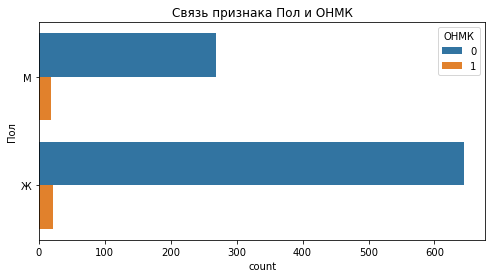

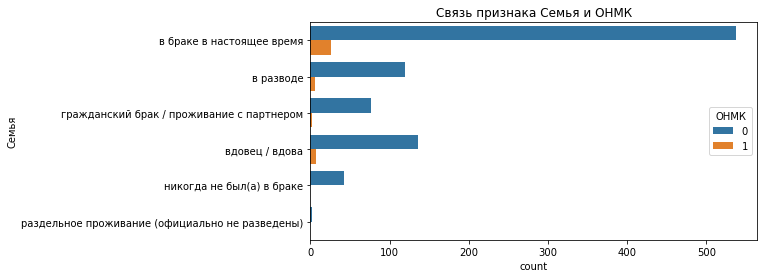

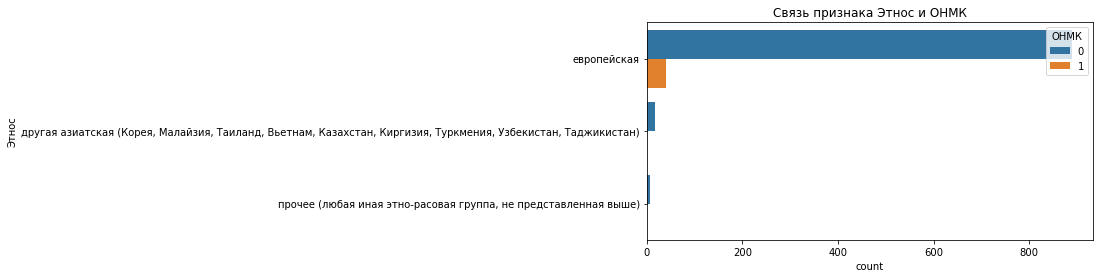

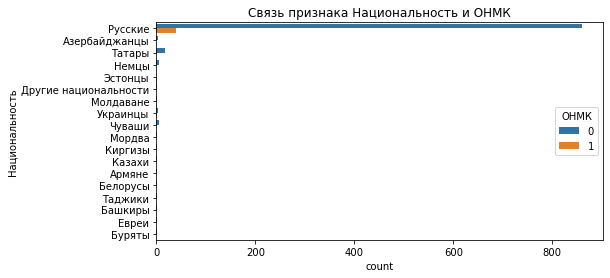

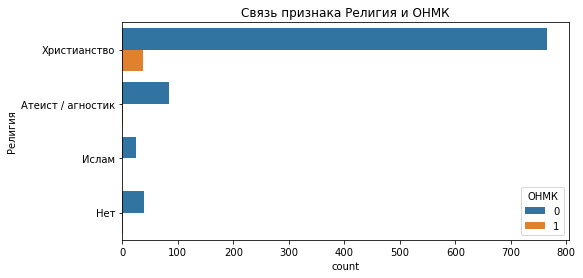

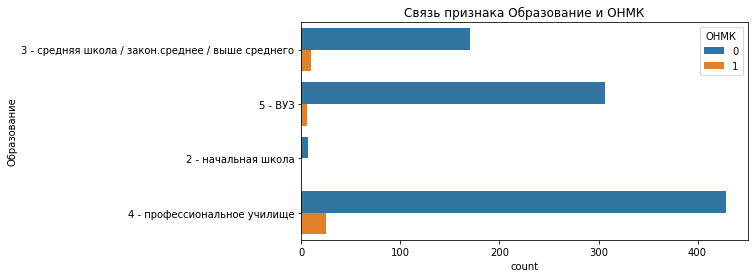

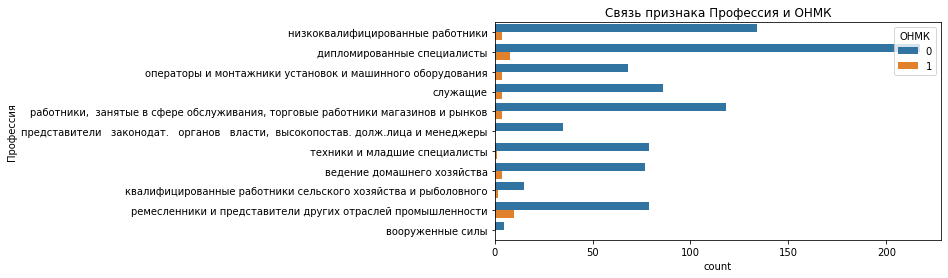

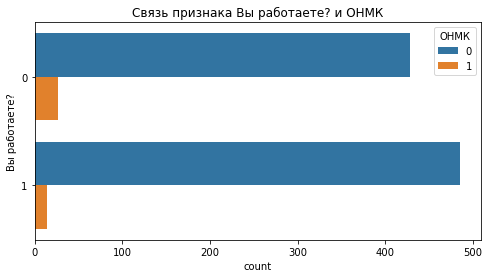

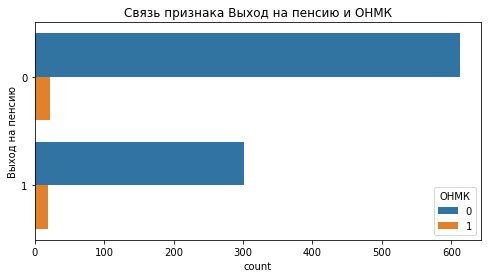

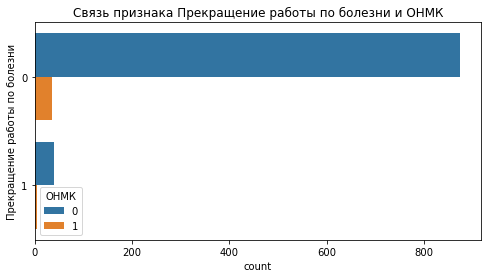

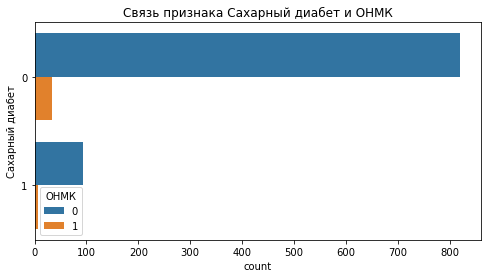

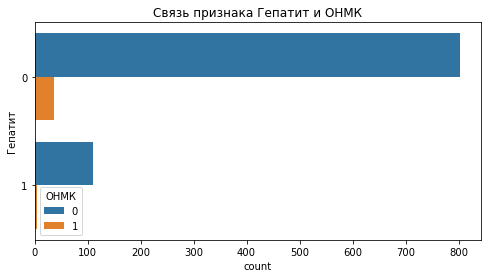

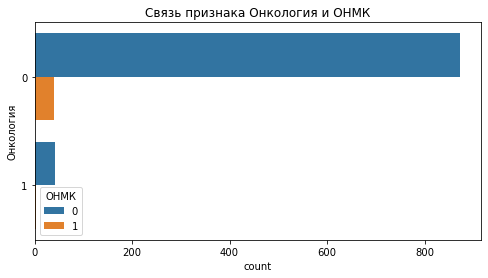

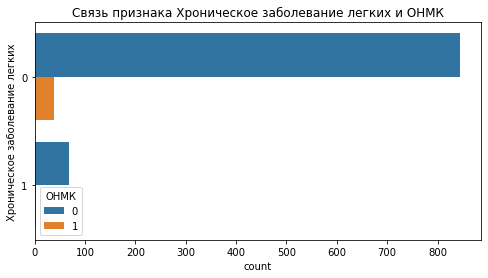

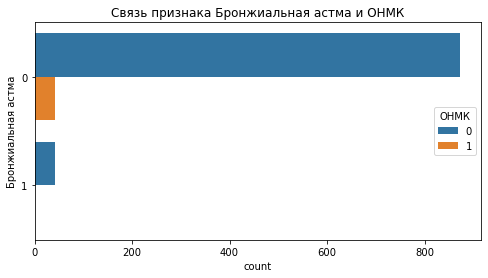

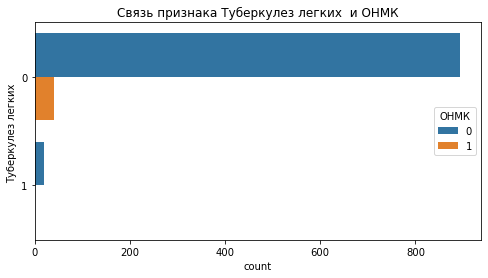

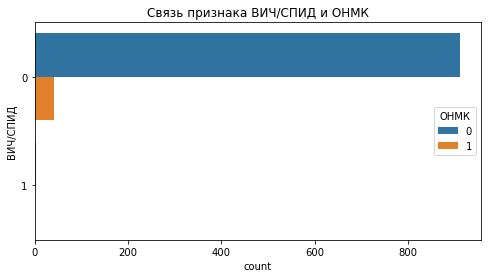

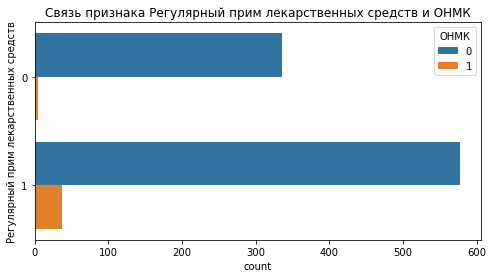

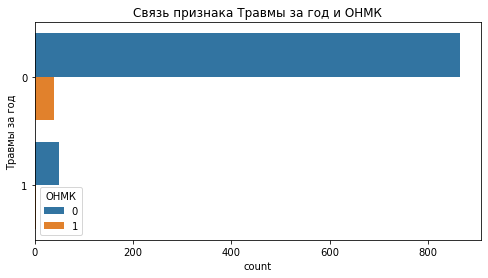

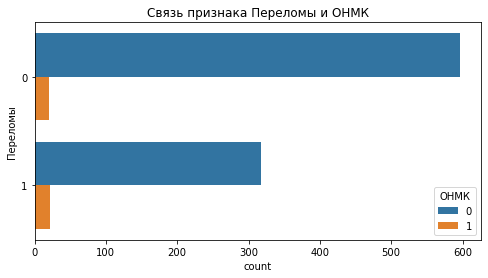

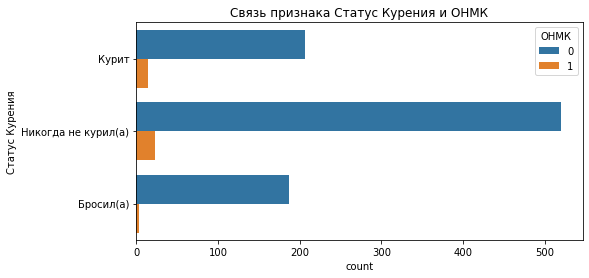

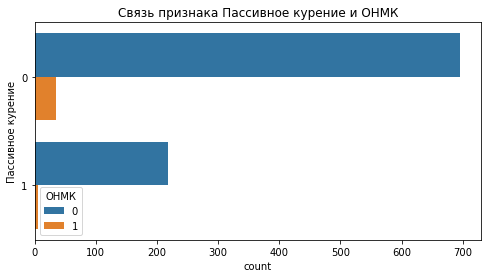

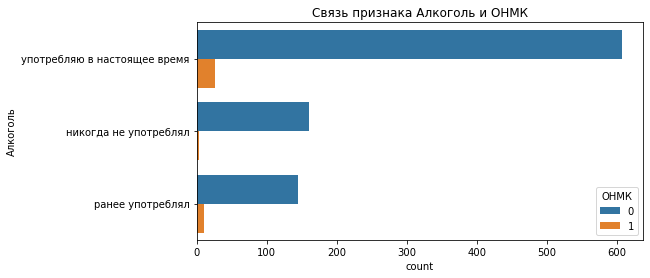

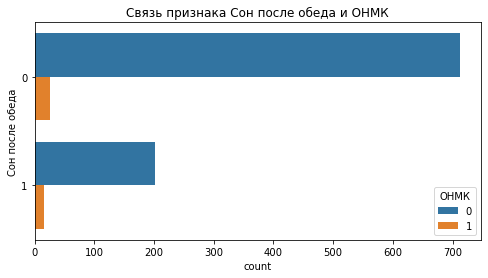

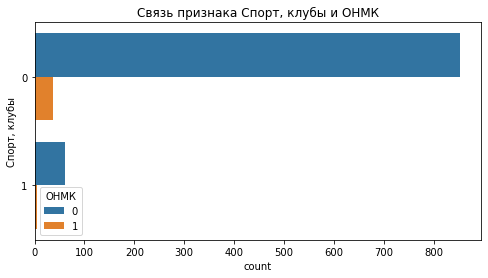

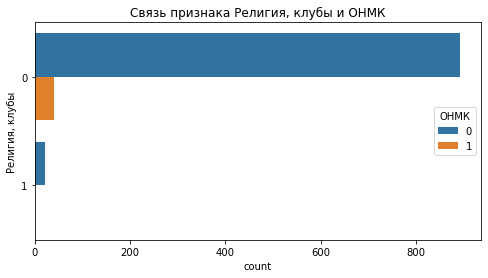

In [66]:
for col in cat_names_list:
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.countplot(y=col, hue='–û–ù–ú–ö', data=heart)
    ax.set_title('–°–≤—è–∑—å –ø—Ä–∏–∑–Ω–∞–∫–∞ {} –∏ –û–ù–ú–ö'.format(col))
    plt.show()

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ç–∞–∫–∂–µ –Ω–∞ —Å–≤—è–∑—å —Å–æ —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏–µ–π, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç–æ–º –º–∏–æ–∫–∞—Ä–¥–∞

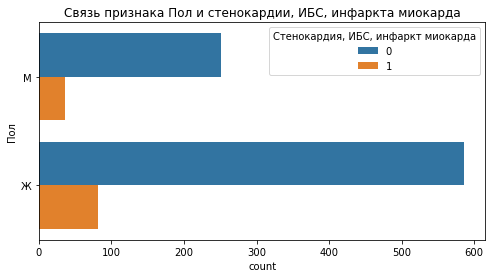

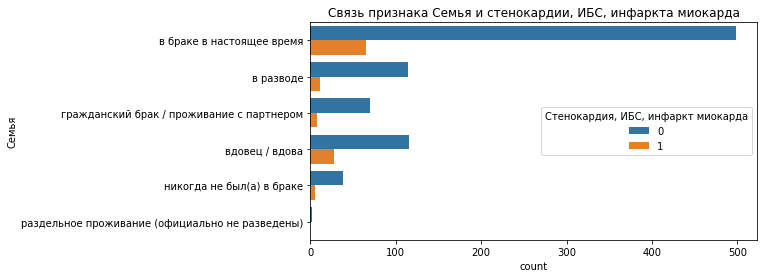

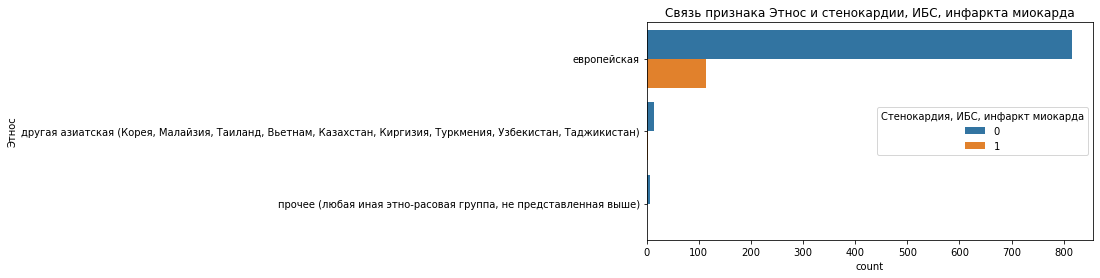

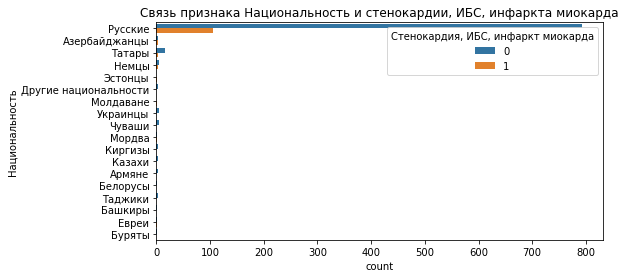

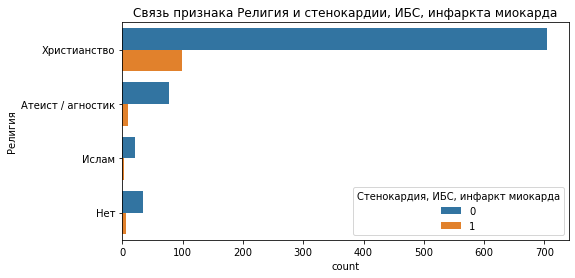

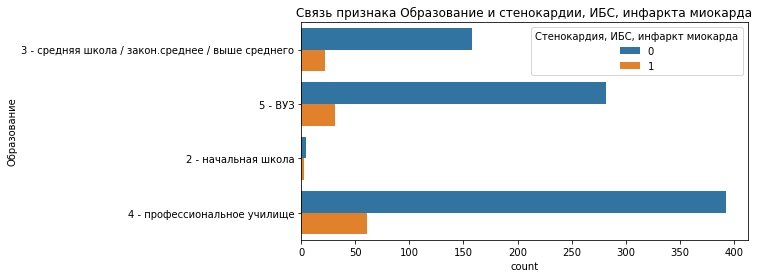

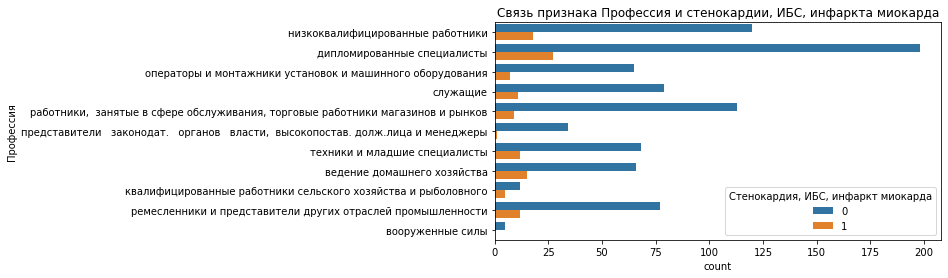

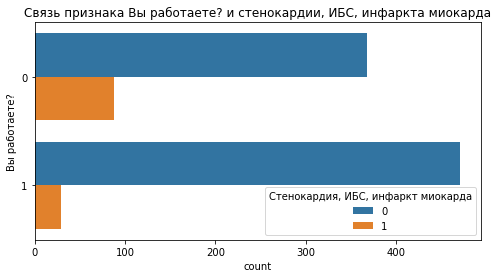

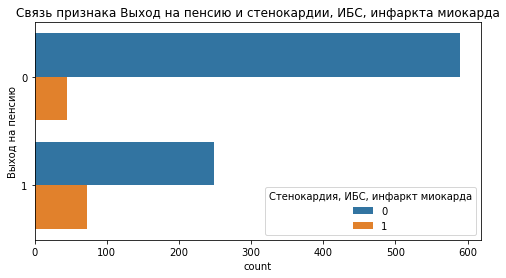

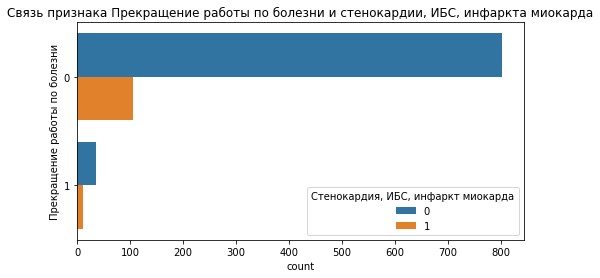

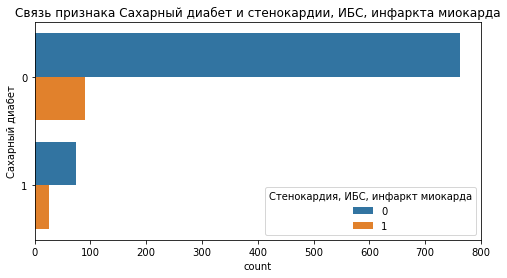

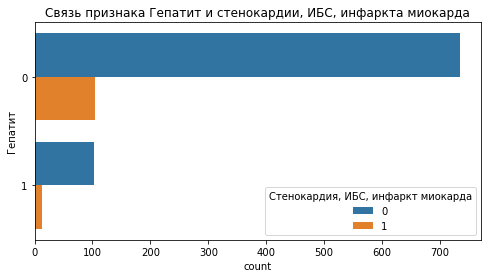

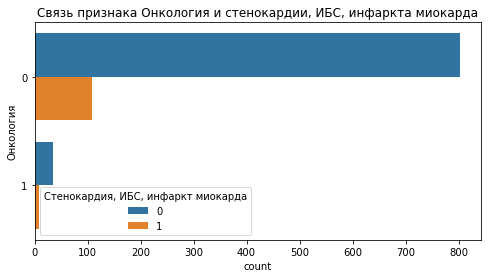

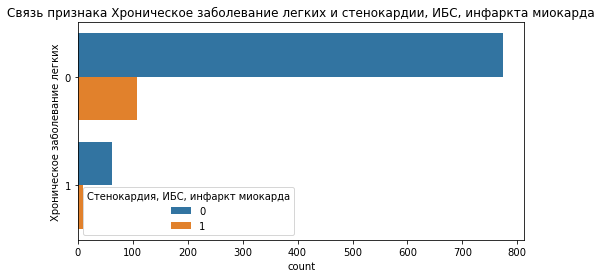

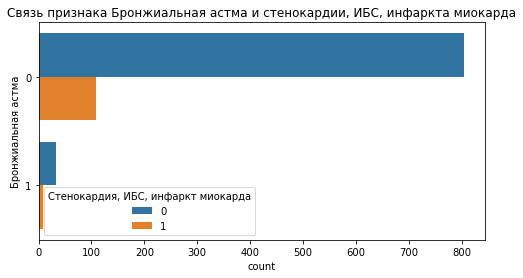

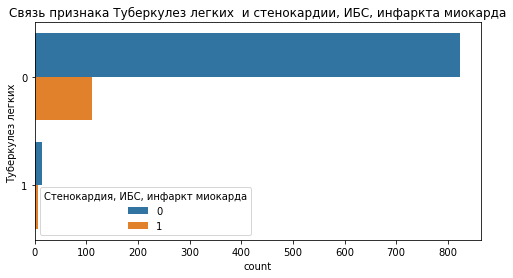

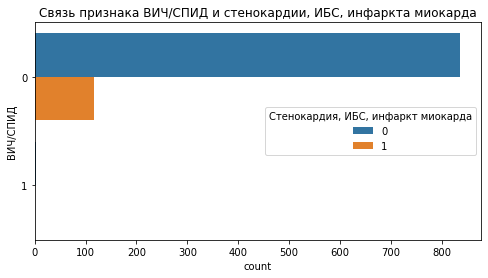

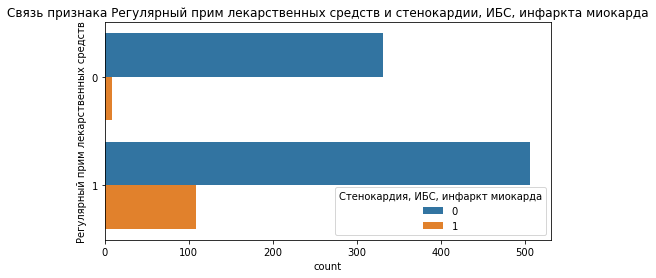

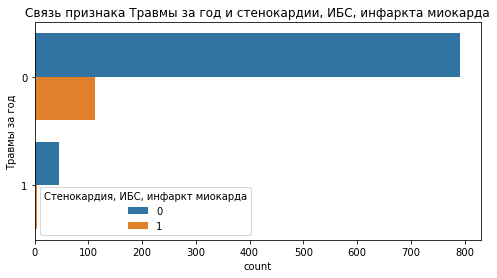

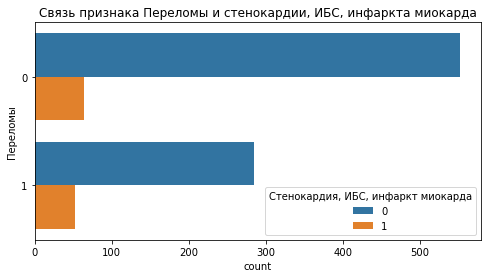

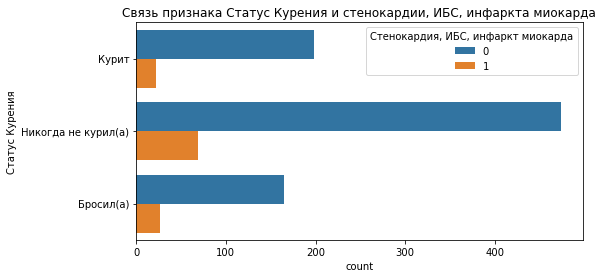

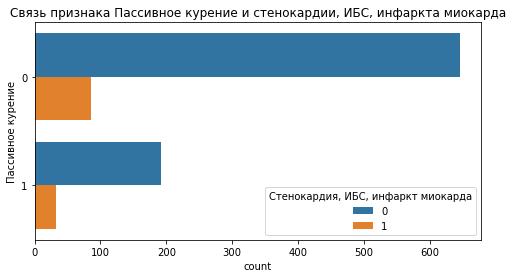

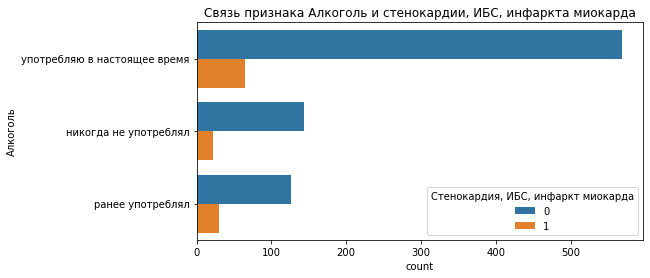

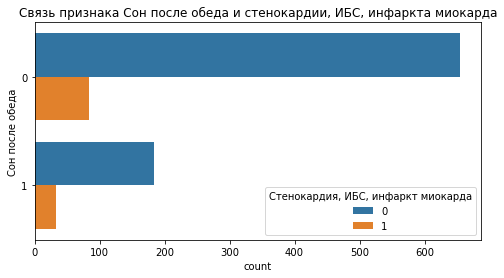

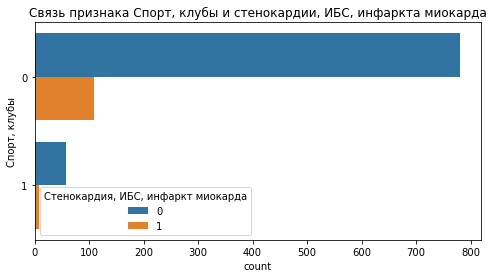

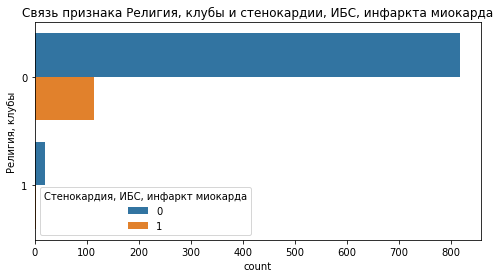

In [67]:
for col in cat_names_list:
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.countplot(y=col, hue='–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞', data=heart)
    ax.set_title('–°–≤—è–∑—å –ø—Ä–∏–∑–Ω–∞–∫–∞ {} –∏ —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏–∏, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç–∞ –º–∏–æ–∫–∞—Ä–¥–∞'.format(col))
    plt.show()

–°–≤—è–∑—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö/–±–∏–Ω–∞—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Å–µ—Ä–¥–µ—á–Ω–æ–π –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç–∏:

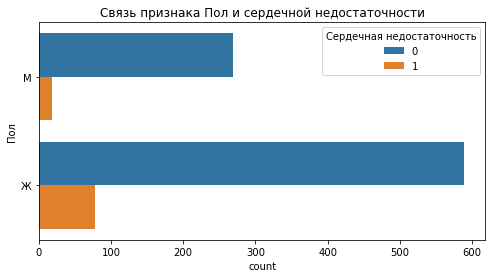

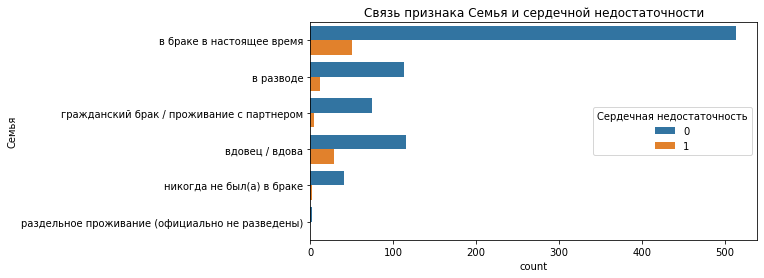

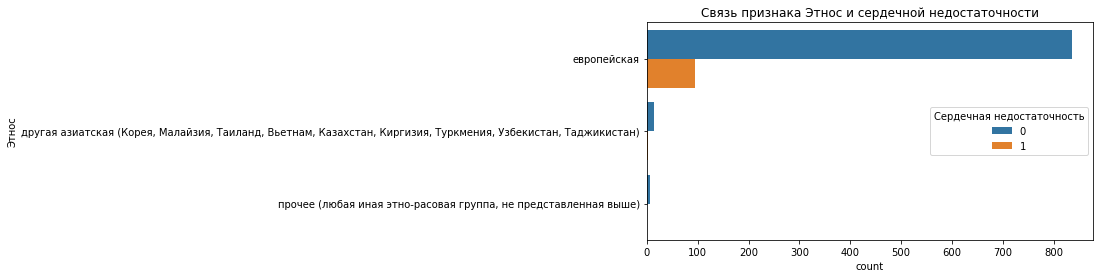

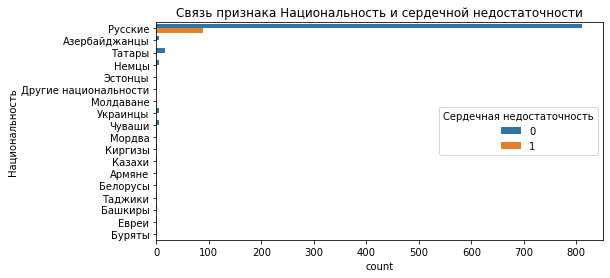

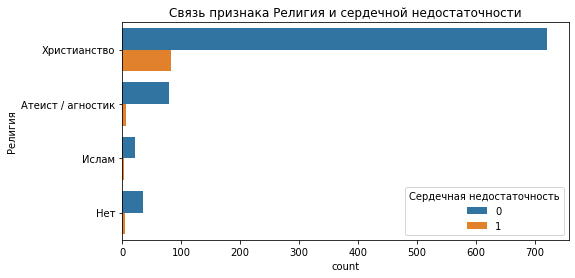

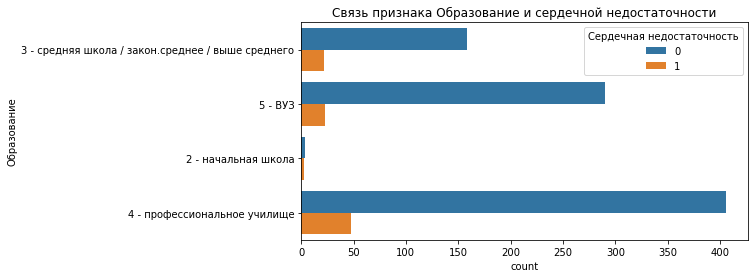

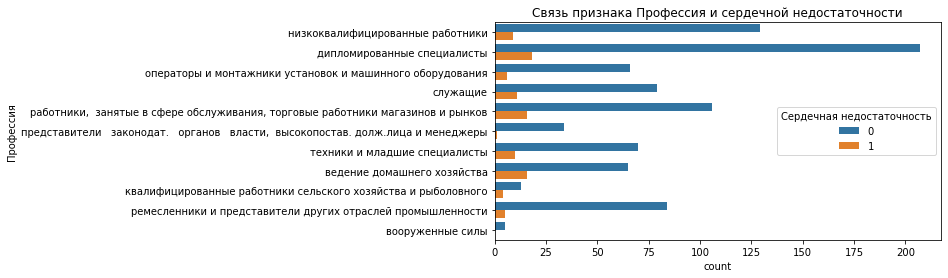

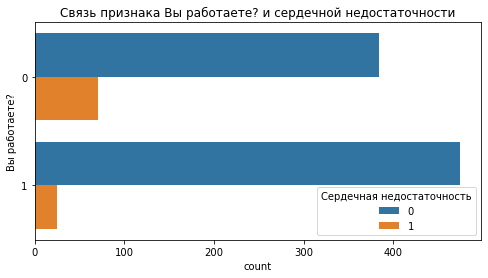

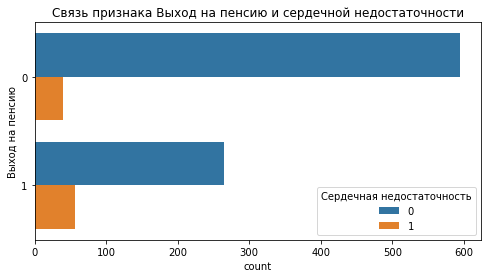

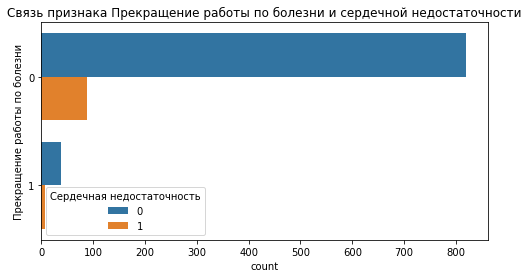

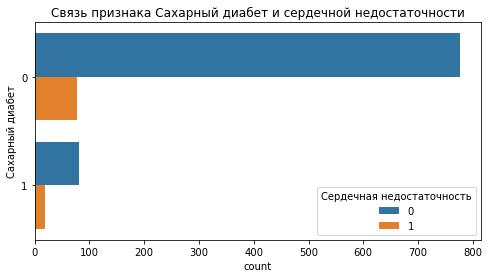

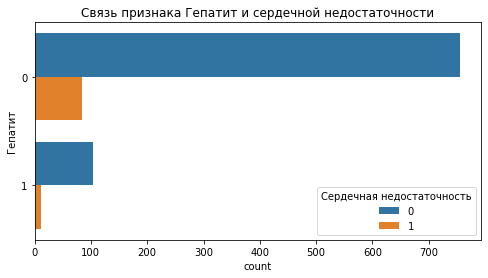

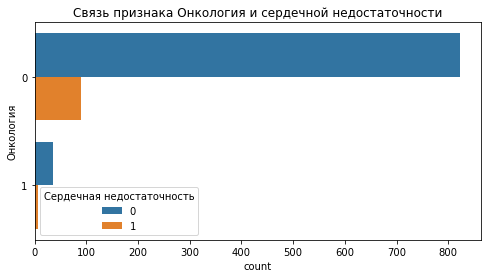

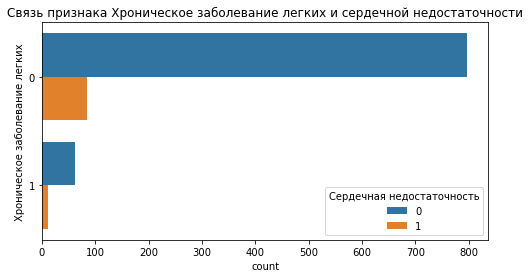

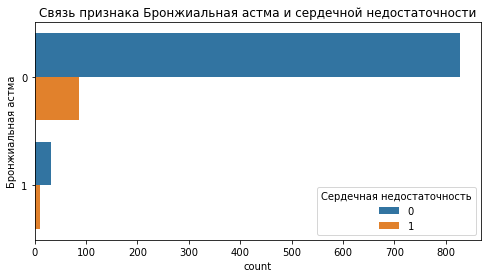

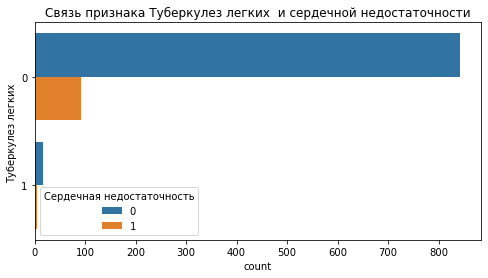

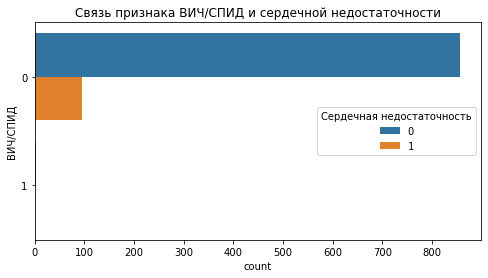

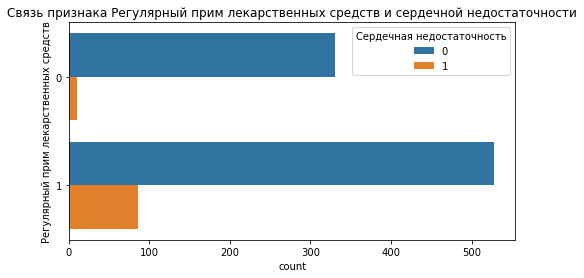

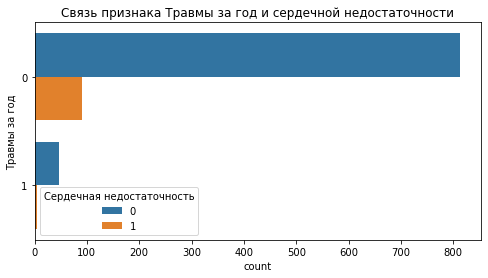

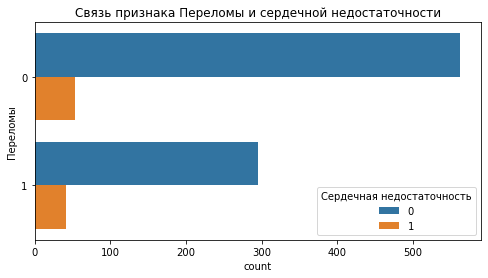

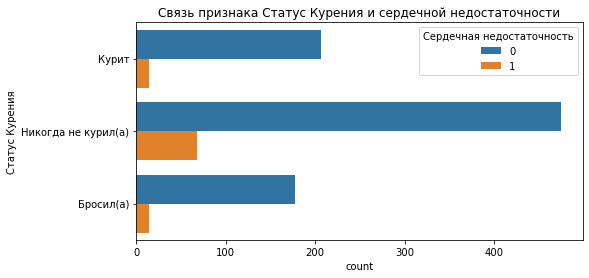

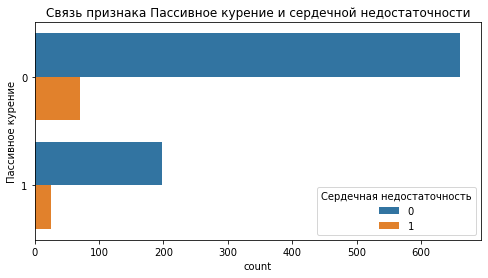

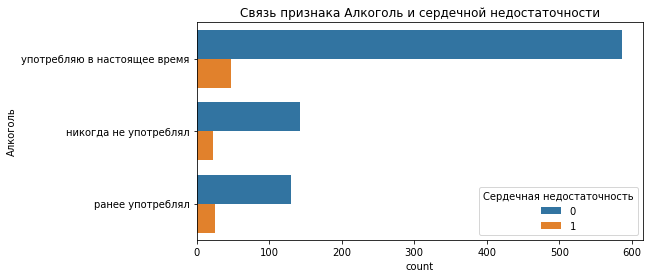

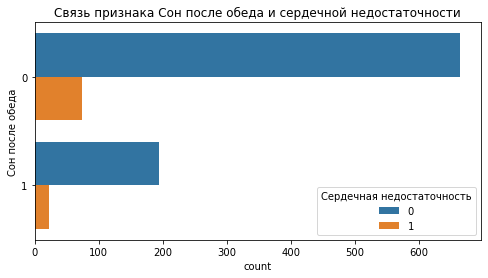

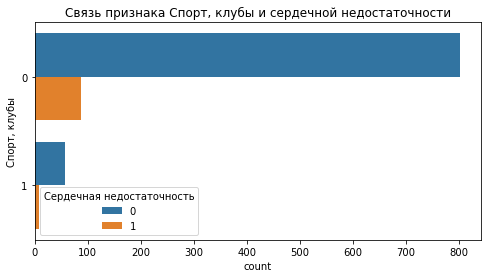

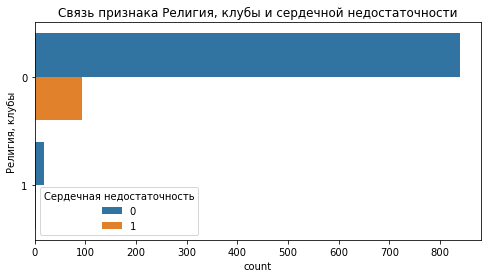

In [68]:
for col in cat_names_list:
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.countplot(y=col, hue='–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å', data=heart)
    ax.set_title('–°–≤—è–∑—å –ø—Ä–∏–∑–Ω–∞–∫–∞ {} –∏ —Å–µ—Ä–¥–µ—á–Ω–æ–π –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç–∏'.format(col))
    plt.show()

–í–∑–≥–ª—è–Ω–µ–º –Ω–∞ —Å–≤—è–∑–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö —Å–µ—Ä–¥–µ—á–Ω—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π

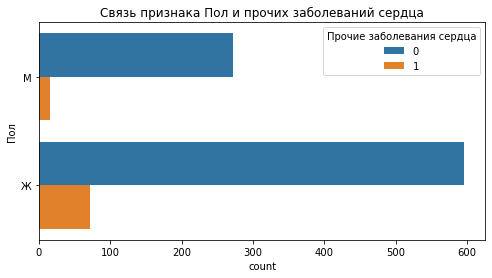

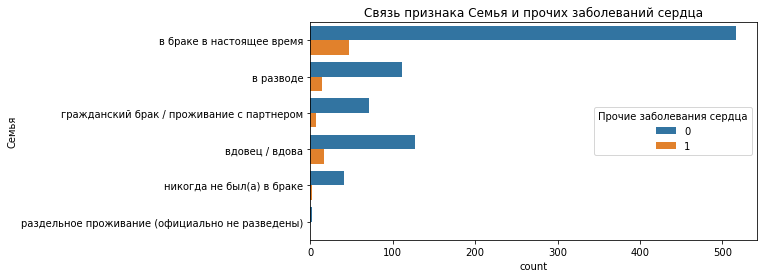

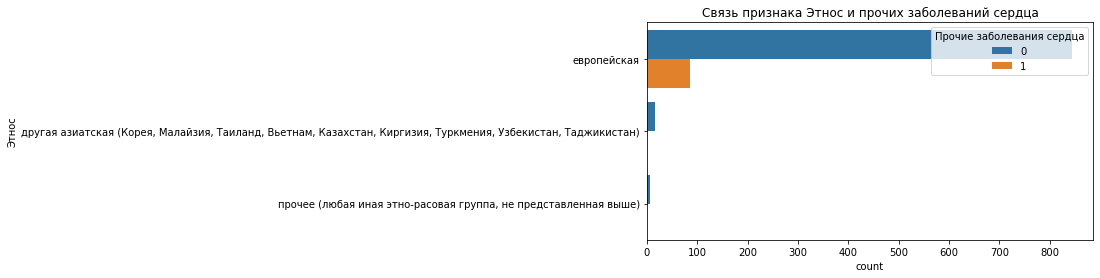

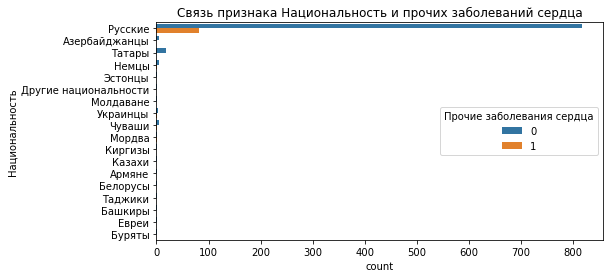

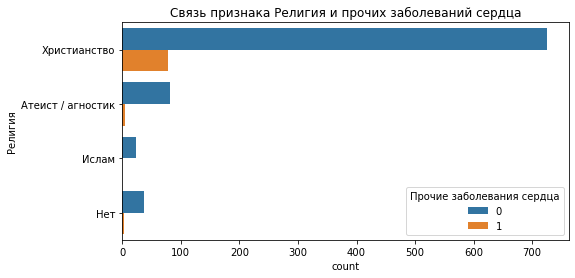

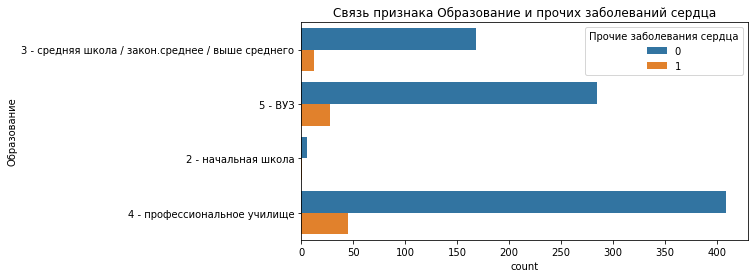

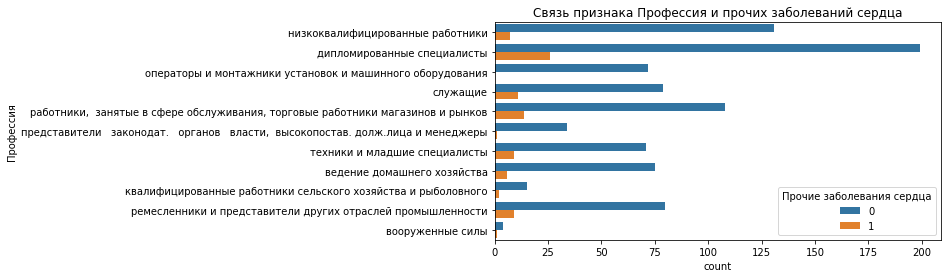

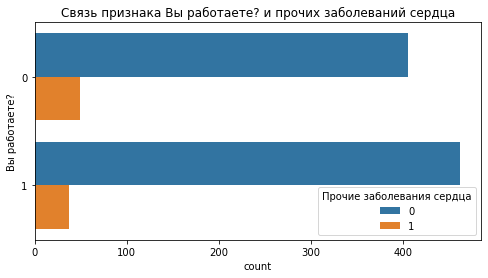

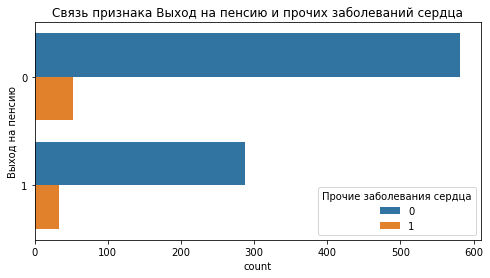

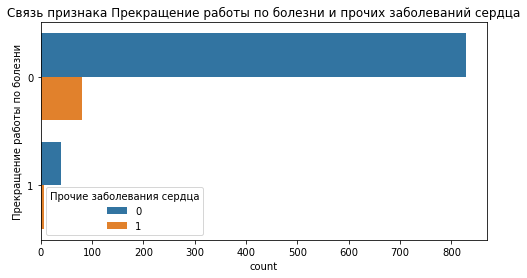

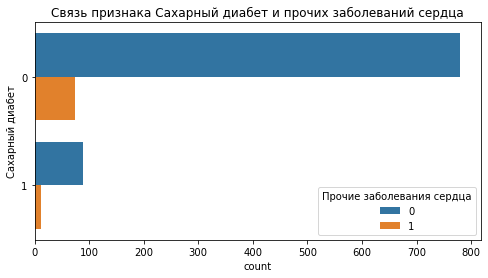

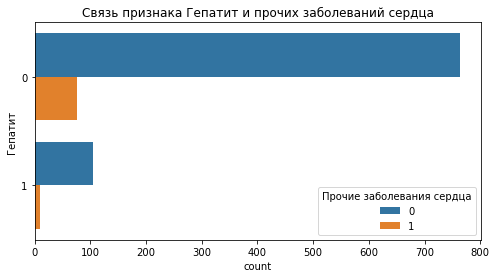

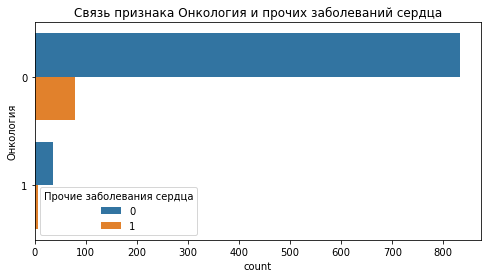

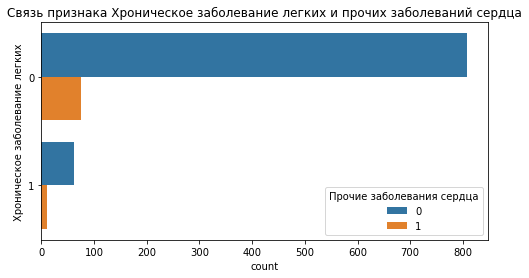

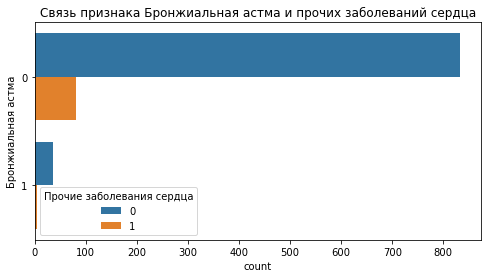

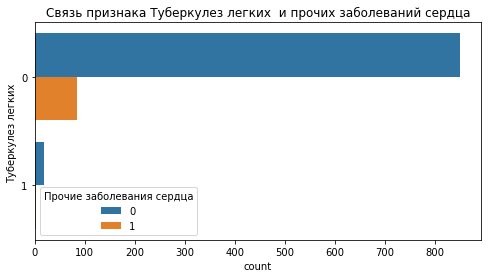

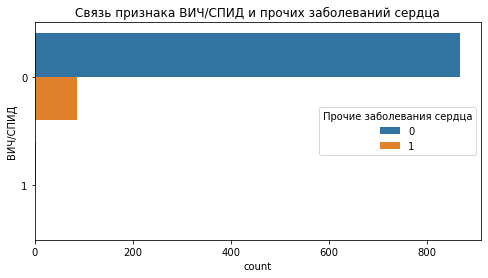

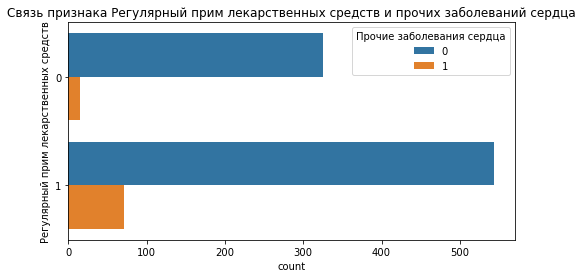

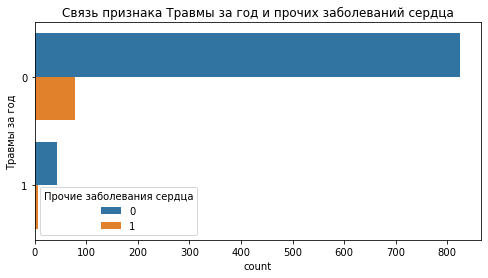

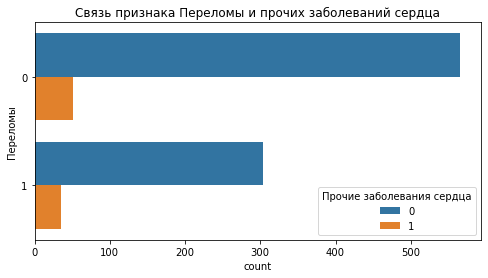

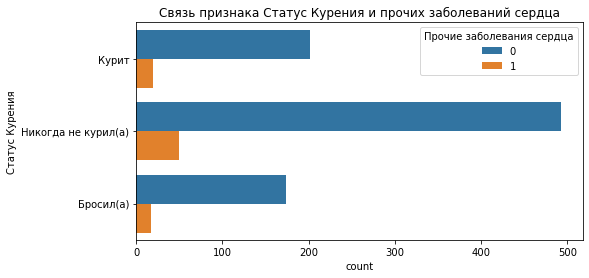

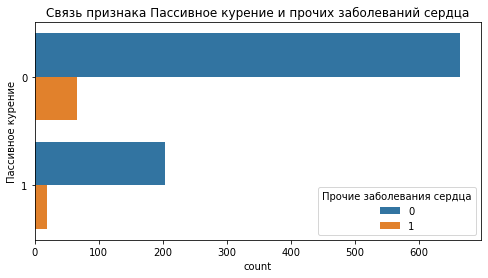

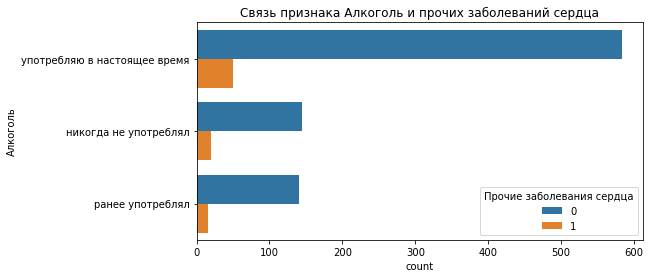

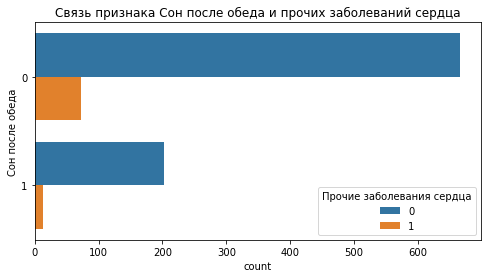

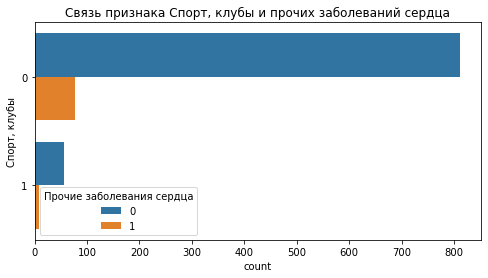

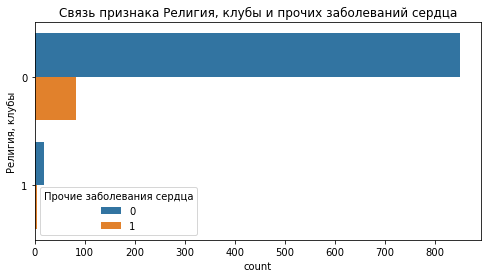

In [69]:
for col in cat_names_list:
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.countplot(y=col, hue='–ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞', data=heart)
    ax.set_title('–°–≤—è–∑—å –ø—Ä–∏–∑–Ω–∞–∫–∞ {} –∏ –ø—Ä–æ—á–∏—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π —Å–µ—Ä–¥—Ü–∞'.format(col))
    plt.show()

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–≤—è–∑—å –º–µ–∂–¥—É –Ω–∏–º–∏ –∏ –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–π –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏–µ–π.

In [9]:
num_columns = ['–í–æ–∑—Ä–∞—Å—Ç –∫—É—Ä–µ–Ω–∏—è', '–°–∏–≥–∞—Ä–µ—Ç –≤ –¥–µ–Ω—å', '–í–æ–∑—Ä–∞—Å—Ç –∞–ª–∫–æ–≥', '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è', '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è', '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞']

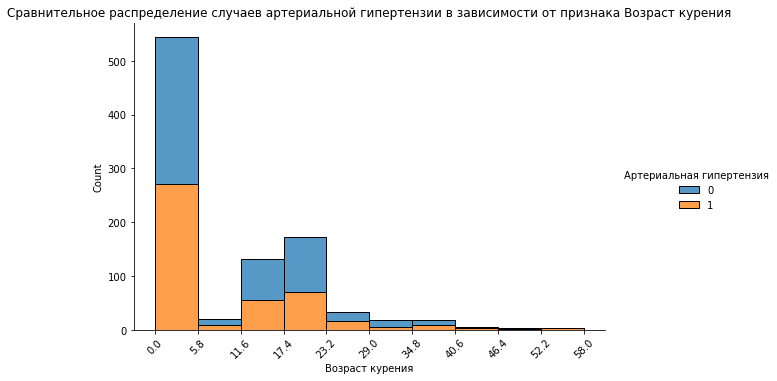

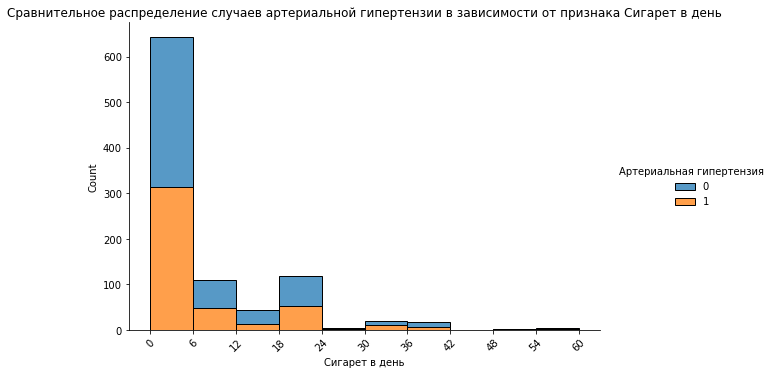

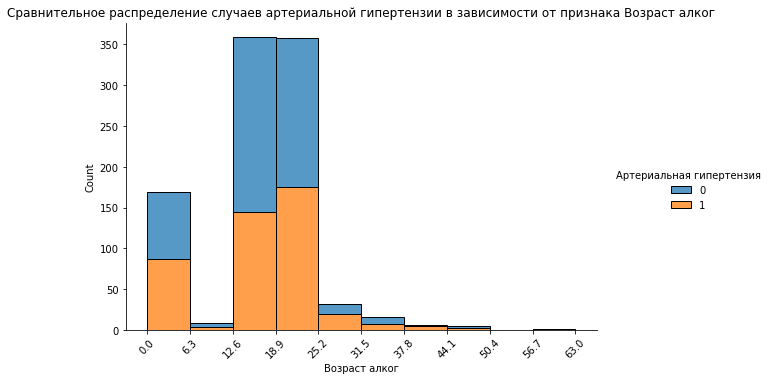

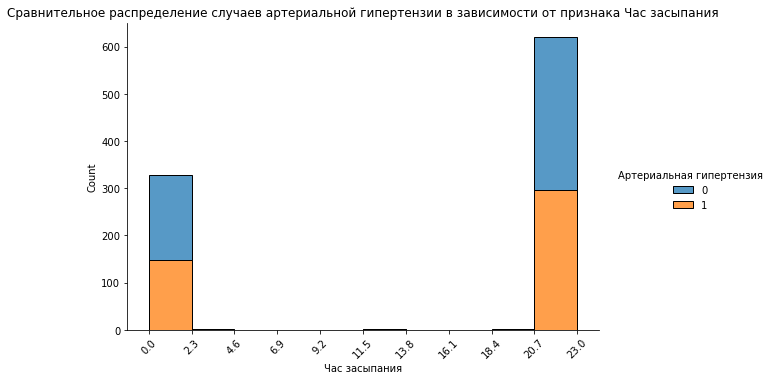

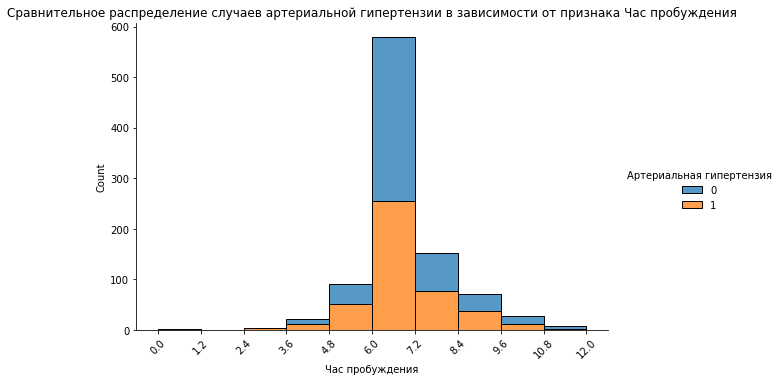

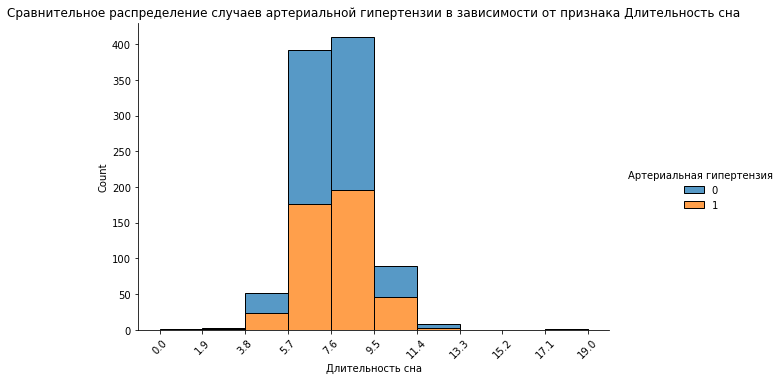

In [10]:
# –ø–æ–¥–±–µ—Ä–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª-–≤–æ —Å—Ç–æ–æ–ª–±—Ü–æ–≤ –¥–ª—è –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º
bins = int(1 + np.math.log(954, 2))

# –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
for col in num_columns:
    bin_width = heart[col].max() / bins
    x_range = [num * bin_width for num in range(bins + 1)]
    ax = sns.displot(x=col, hue='–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è', data=heart, aspect=1.5, bins=bins, multiple='stack')
    plt.xticks(x_range, rotation=45)
    plt.title('–°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ª—É—á–∞–µ–≤ –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–π –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∞ {}'.format(col))

–°–≤—è–∑—å –∫–æ–ª-–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –û–ù–ú–ö:

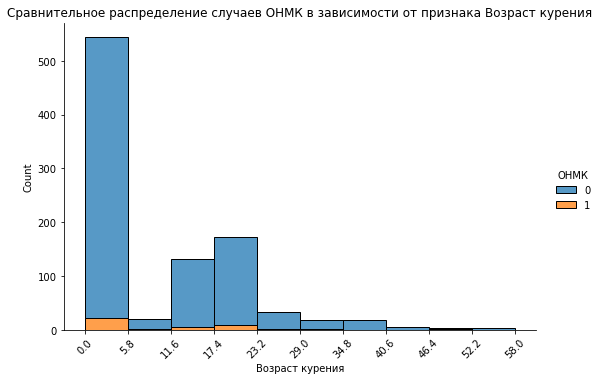

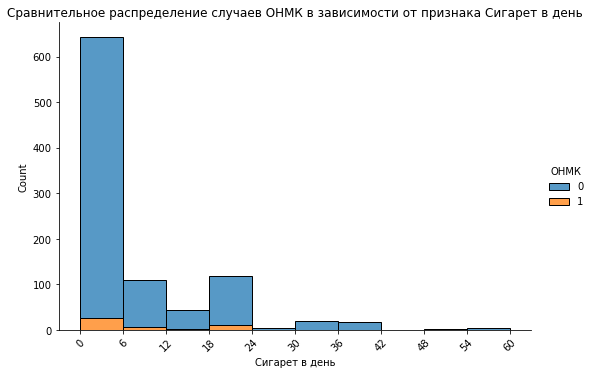

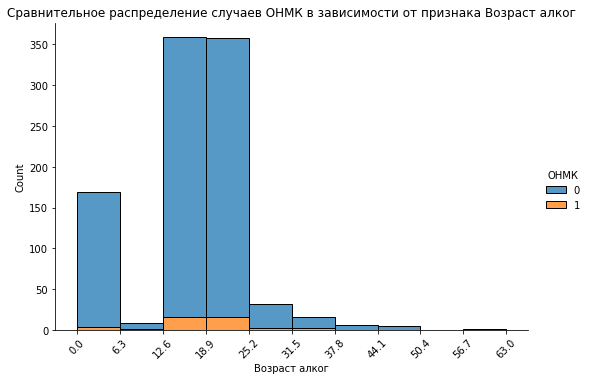

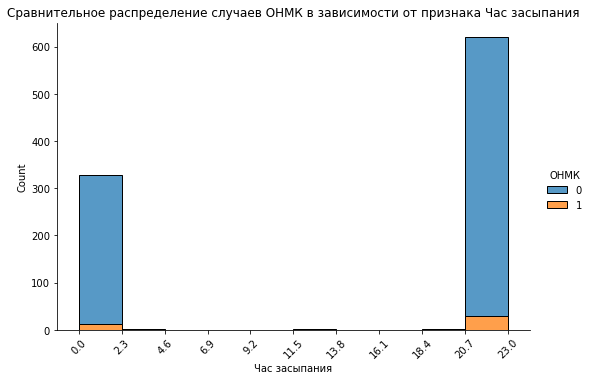

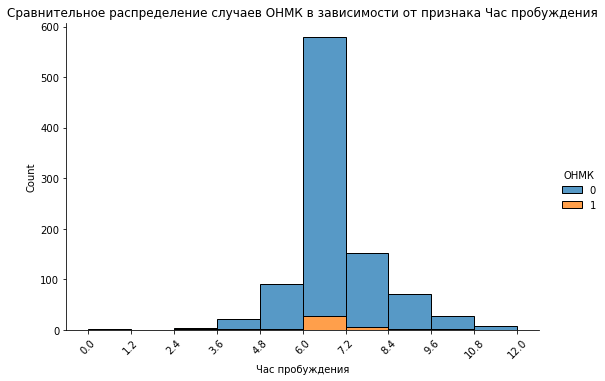

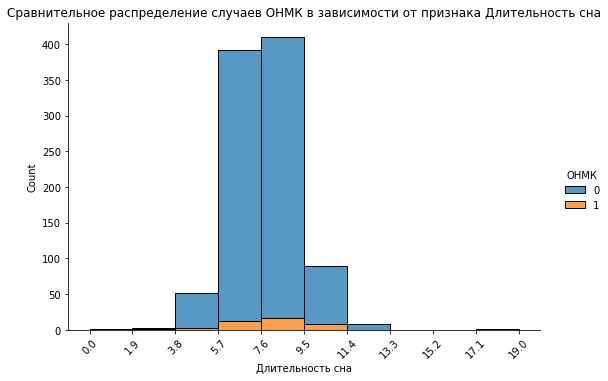

In [11]:
bins = int(1 + np.math.log(954, 2))

for col in num_columns:
    bin_width = heart[col].max() / bins
    x_range = [num * bin_width for num in range(bins + 1)]
    ax = sns.displot(x=col, hue='–û–ù–ú–ö', data=heart, aspect=1.5, bins=bins, multiple='stack')
    plt.xticks(x_range, rotation=45)
    plt.title('–°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ª—É—á–∞–µ–≤ –û–ù–ú–ö –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∞ {}'.format(col))

–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Å—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–ª—É—á–∞–µ–≤ —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏–∏, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç–∞ –º–∏–æ–∫–∞—Ä–¥–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ–ª-–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:

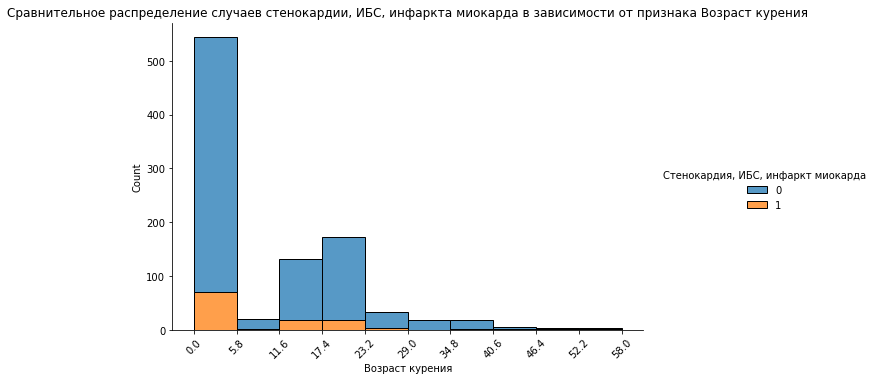

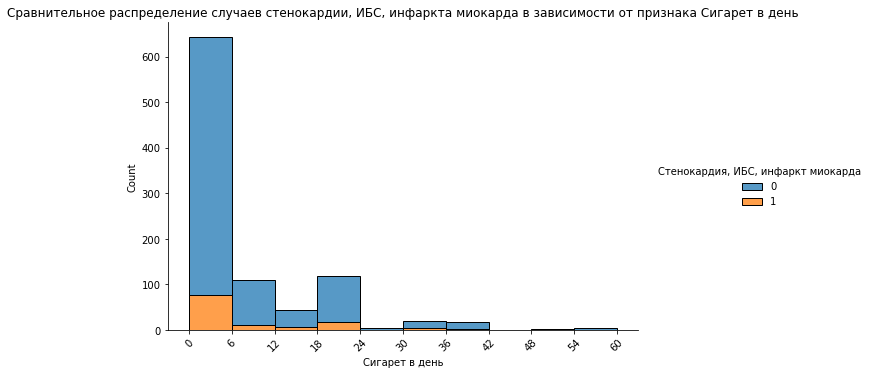

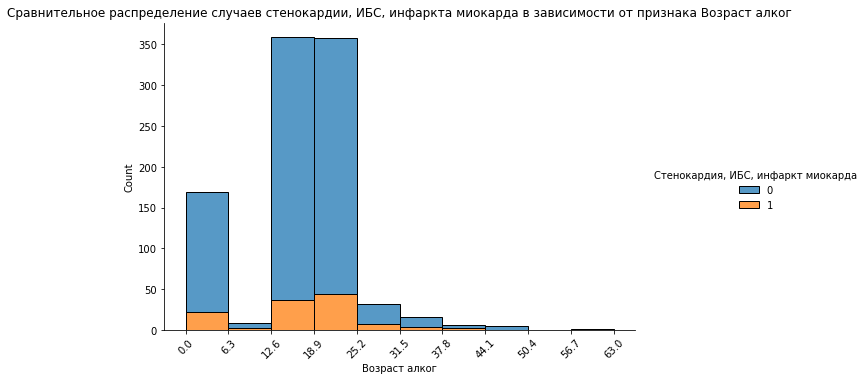

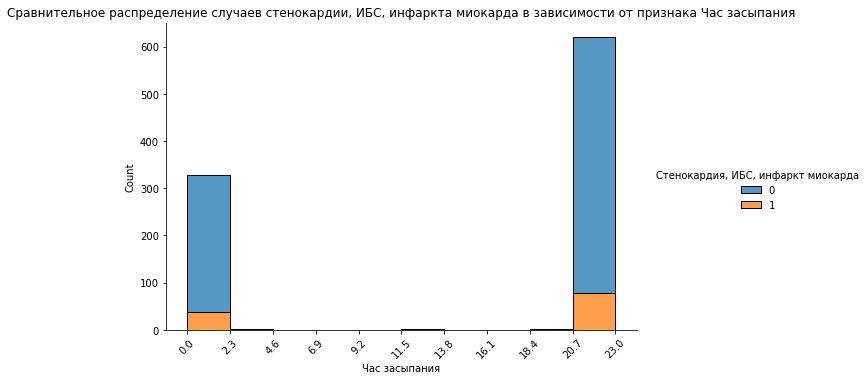

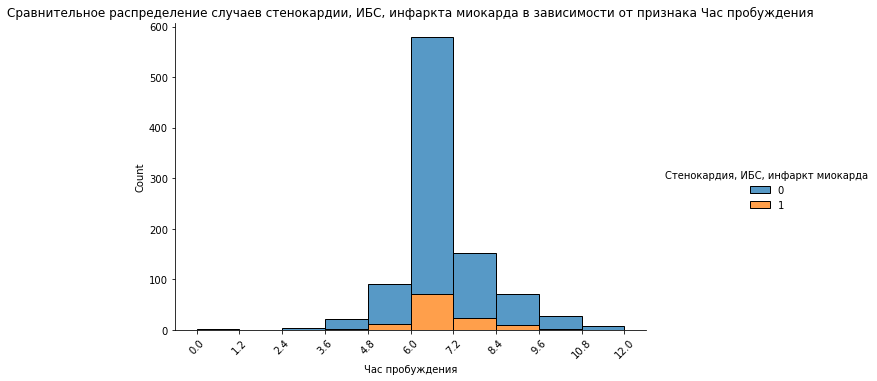

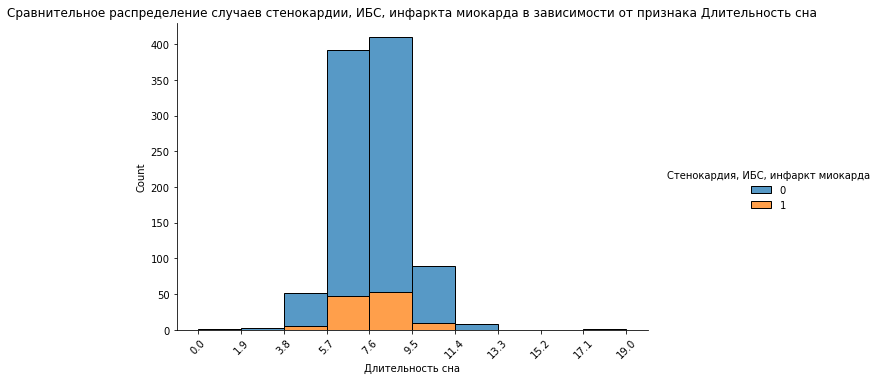

In [12]:
bins = int(1 + np.math.log(954, 2))

for col in num_columns:
    bin_width = heart[col].max() / bins
    x_range = [num * bin_width for num in range(bins + 1)]
    ax = sns.displot(x=col, hue='–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞', data=heart, aspect=1.5, bins=bins, multiple='stack')
    plt.xticks(x_range, rotation=45)
    plt.title('–°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ª—É—á–∞–µ–≤ —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏–∏, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç–∞ –º–∏–æ–∫–∞—Ä–¥–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∞ {}'.
              format(col))

–°–≤—è–∑—å —Å–ª—É—á–∞–µ–≤ —Å–µ—Ä–¥–µ—á–Ω–æ–π –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç–∏ –∏ –∫–æ–ª-–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:

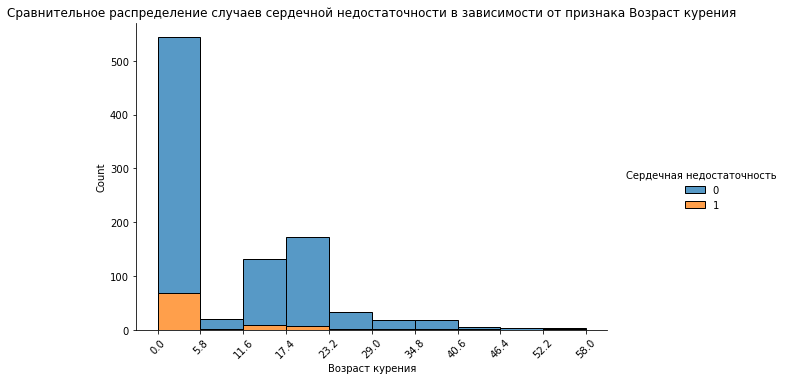

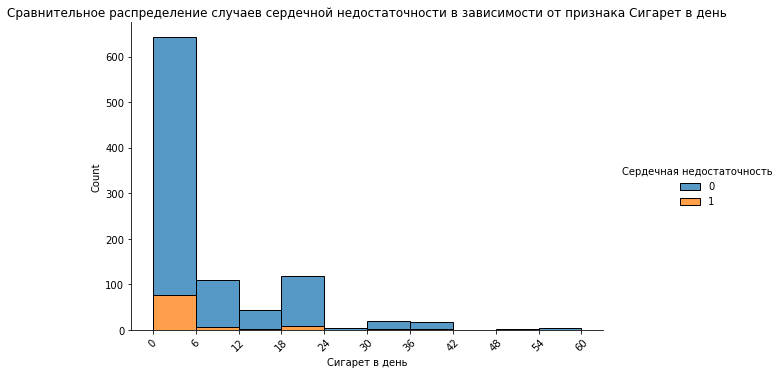

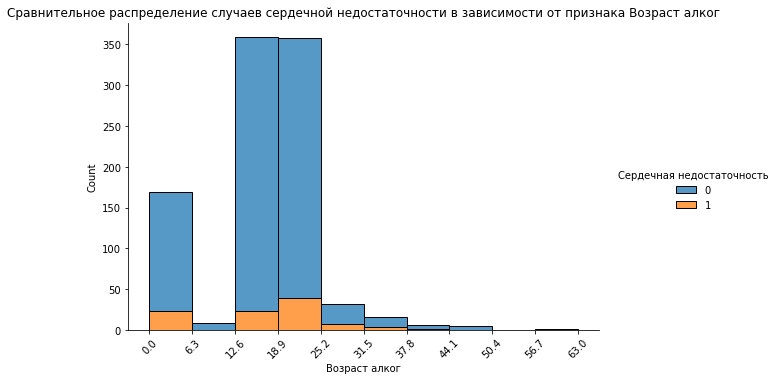

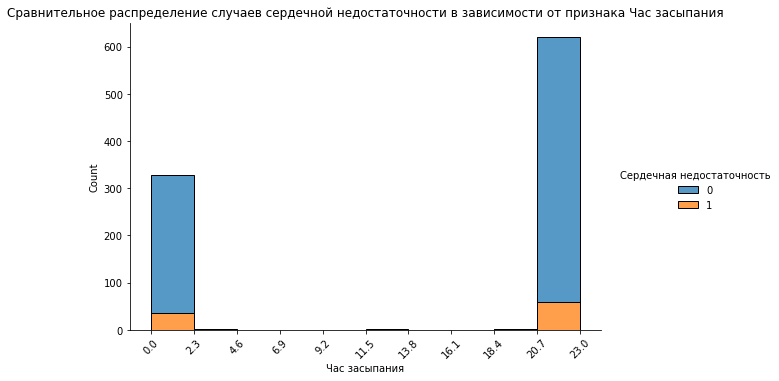

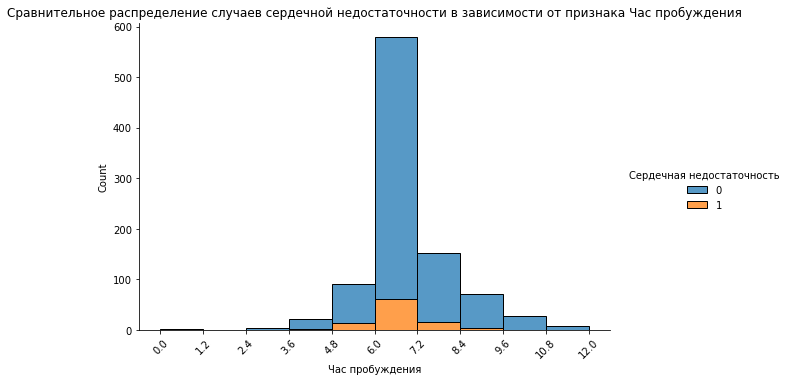

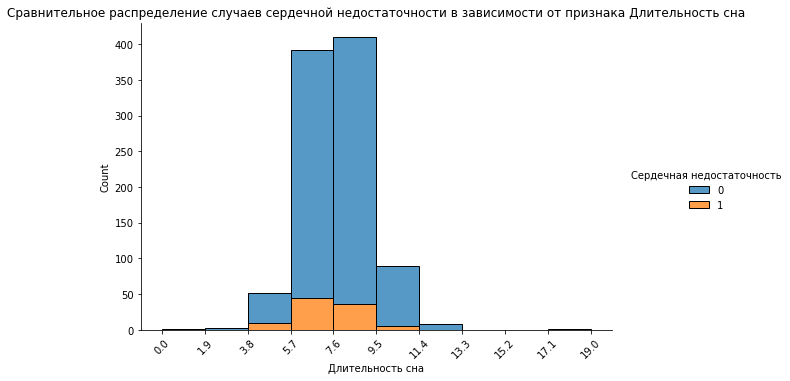

In [13]:
for col in num_columns:
    bin_width = heart[col].max() / bins
    x_range = [num * bin_width for num in range(bins + 1)]
    ax = sns.displot(x=col, hue='–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å', data=heart, aspect=1.5, bins=bins, multiple='stack')
    plt.xticks(x_range, rotation=45)
    plt.title('–°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ª—É—á–∞–µ–≤ —Å–µ—Ä–¥–µ—á–Ω–æ–π –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∞ {}'.
              format(col))

–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–ª—É—á–∞–µ–≤ –ø—Ä–æ—á–∏—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π —Å–µ—Ä–¥—Ü–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ–ª-–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:

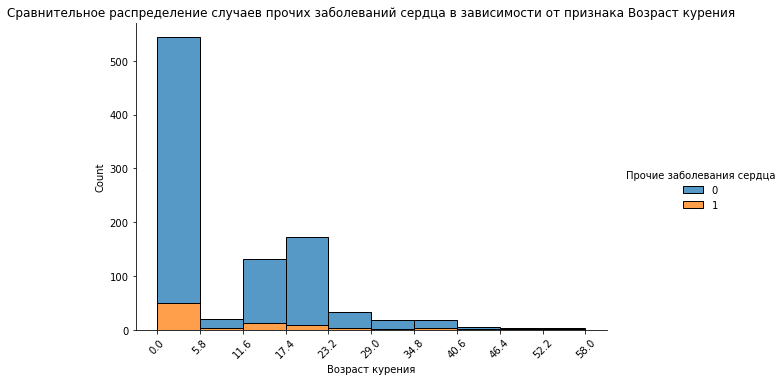

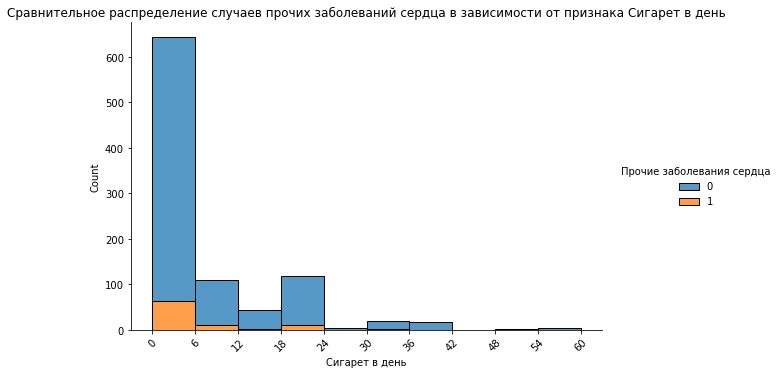

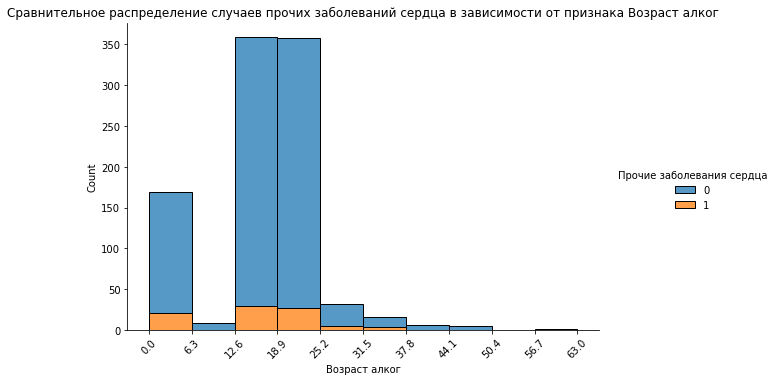

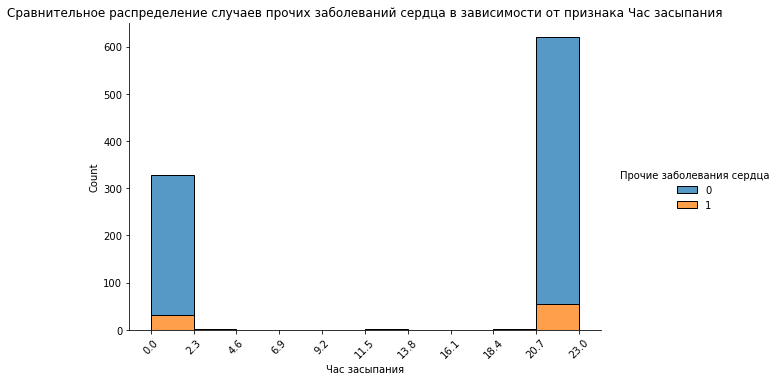

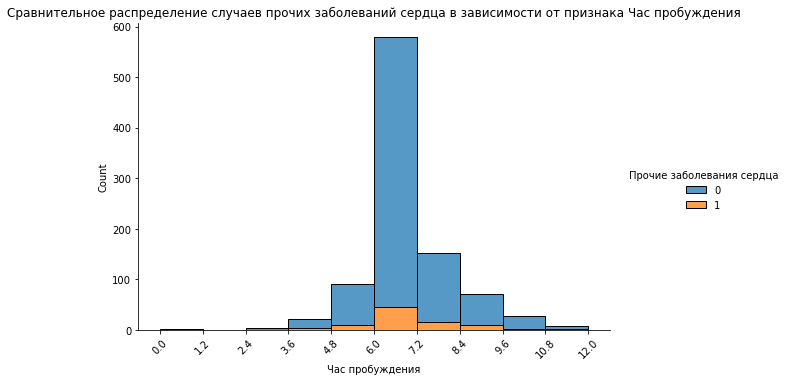

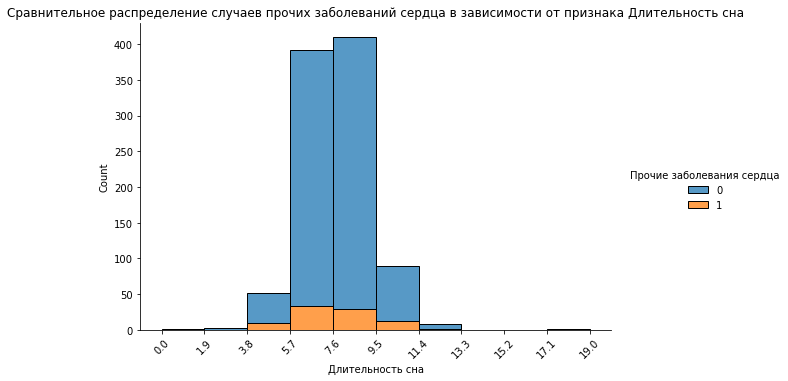

In [14]:
for col in num_columns:
    bin_width = heart[col].max() / bins
    x_range = [num * bin_width for num in range(bins + 1)]
    ax = sns.displot(x=col, hue='–ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞', data=heart, aspect=1.5, bins=bins, multiple='stack')
    plt.xticks(x_range, rotation=45)
    plt.title('–°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ª—É—á–∞–µ–≤ –ø—Ä–æ—á–∏—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π —Å–µ—Ä–¥—Ü–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∞ {}'.
              format(col))

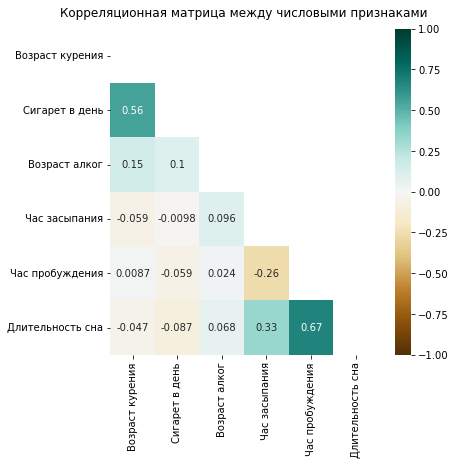

In [15]:
# –í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Ç–µ–ø–ª–æ–≤–æ–π –∫–∞—Ä—Ç–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, —á—Ç–æ–±—ã –ª—É—á—à–µ —É–≤–∏–¥–µ—Ç—å —Å–≤—è–∑—å –º–µ–∂–¥—É –∫–æ–ª–∏—á–µ—Å—Ç–≤–Ω–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏

df_corr = heart[num_columns].corr()
mask_matrix = np.zeros_like(df_corr)
mask_matrix[np.triu_indices_from(mask_matrix)] = True
plt.figure(figsize=(6, 6))  

sns.heatmap(df_corr, cmap='BrBG',annot=True, vmin=-1, vmax=1, center=0, 
            annot_kws={"fontsize":10}, linecolor='black', mask=mask_matrix
           ) 

plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –º–µ–∂–¥—É —á–∏—Å–ª–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏', fontsize=12, pad=12 )
plt.show()

–ù–∞–∫–æ–Ω–µ—Ü, –∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ —É–≤–∏–¥–µ—Ç—å –≤—Å—é –∫–∞—Ä—Ç–∏–Ω—É —Ü–µ–ª–∏–∫–æ–º. –î–ª—è –ª—É—á—à–µ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è 
–º–µ—Ç–æ–¥–æ–º Phik(ùúôk), –∫–æ—Ç–æ—Ä—ã–π —Ä–µ–∞–ª–∏–∑—É–µ—Ç—Å—è –±–ª–∞–≥–æ–¥–∞—Ä—è –±–∏–±–ª–∏–æ—Ç–µ–∫–µ phik, –ø–æ—è–≤–∏–≤—à–µ–π—Å—è –≤ –∫–æ–Ω—Ü–µ 2018 –≥. –ï–µ —Å–æ–∑–¥–∞—Ç–µ–ª–∏ —É–≤–µ—Ä—è—é—Ç –Ω–∞—Å 
–≤ —Ç–æ–º, —á—Ç–æ "Phik(ùúôk) - –Ω–æ–≤—ã–π –ø—Ä–∞–∫—Ç–∏—á–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, –∫–æ—Ç–æ—Ä—ã–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –º–µ–∂–¥—É –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏, 
–ø–æ—Ä—è–¥–∫–æ–≤—ã–º–∏ –∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª—å–Ω—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, —Ñ–∏–∫—Å–∏—Ä—É–µ—Ç –Ω–µ–ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –∫ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ 
–ü–∏—Ä—Å–æ–Ω–∞ –≤ —Å–ª—É—á–∞–µ –¥–≤—É–º–µ—Ä–Ω–æ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ –≤—Ö–æ–¥–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è".

In [55]:
# –£–¥–∞–ª–∏–º –Ω–µ–Ω—É–∂–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã
heart = heart.drop(['index', 'ID', '–í–ò–ß/–°–ü–ò–î', 'ID_y','–í—Ä–µ–º—è –∑–∞—Å—ã–ø–∞–Ω–∏—è', '–í—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'], axis=1)

interval columns not set, guessing: ['–í—ã —Ä–∞–±–æ—Ç–∞–µ—Ç–µ?', '–í—ã—Ö–æ–¥ –Ω–∞ –ø–µ–Ω—Å–∏—é', '–ü—Ä–µ–∫—Ä–∞—â–µ–Ω–∏–µ —Ä–∞–±–æ—Ç—ã –ø–æ –±–æ–ª–µ–∑–Ω–∏', '–°–∞—Ö–∞—Ä–Ω—ã–π –¥–∏–∞–±–µ—Ç', '–ì–µ–ø–∞—Ç–∏—Ç', '–û–Ω–∫–æ–ª–æ–≥–∏—è', '–•—Ä–æ–Ω–∏—á–µ—Å–∫–æ–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ –ª–µ–≥–∫–∏—Ö', '–ë—Ä–æ–Ω–∂–∏–∞–ª—å–Ω–∞—è –∞—Å—Ç–º–∞', '–¢—É–±–µ—Ä–∫—É–ª–µ–∑ –ª–µ–≥–∫–∏—Ö ', '–†–µ–≥—É–ª—è—Ä–Ω—ã–π –ø—Ä–∏–º –ª–µ–∫–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤', '–¢—Ä–∞–≤–º—ã –∑–∞ –≥–æ–¥', '–ü–µ—Ä–µ–ª–æ–º—ã', '–í–æ–∑—Ä–∞—Å—Ç –∫—É—Ä–µ–Ω–∏—è', '–°–∏–≥–∞—Ä–µ—Ç –≤ –¥–µ–Ω—å', '–ü–∞—Å—Å–∏–≤–Ω–æ–µ –∫—É—Ä–µ–Ω–∏–µ', '–í–æ–∑—Ä–∞—Å—Ç –∞–ª–∫–æ–≥', '–°–æ–Ω –ø–æ—Å–ª–µ –æ–±–µ–¥–∞', '–°–ø–æ—Ä—Ç, –∫–ª—É–±—ã', '–†–µ–ª–∏–≥–∏—è, –∫–ª—É–±—ã', '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è', '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è', '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞', '–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è', '–û–ù–ú–ö', '–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞', '–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å', '–ü—Ä–æ—á–∏–

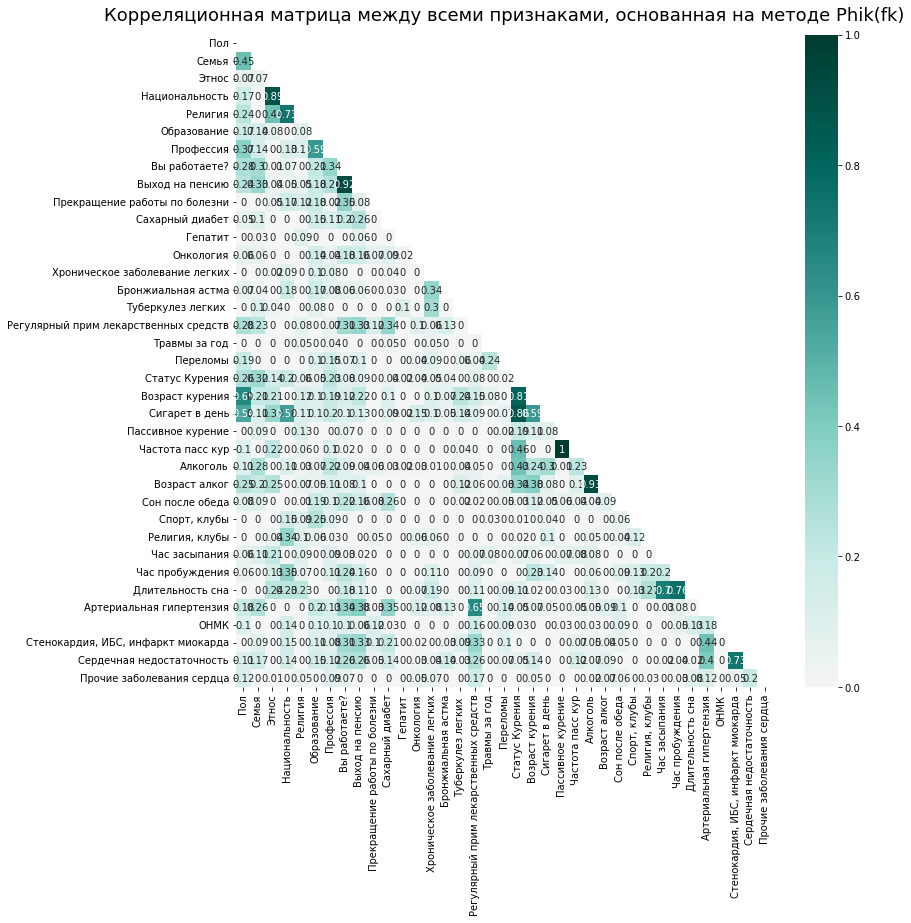

In [44]:
# –ø–æ—Å—Ç–æ—Ä–æ–∏–º phik-–º–∞—Ç—Ä–∏—Üy c –ø–æ–º–æ—â—å—é –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ phik
phik_matrix = heart.phik_matrix()
#phik_matrix = df_users.phik_matrix(interval_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'])
phik_matrix = np.round(phik_matrix, 2)

# –ø–æ—Å—Ç—Ä–æ–∏–º —Ç—Ä–µ—É–≥–æ–ª—å–Ω—É—é —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, –ø–æ–º–Ω—è –æ —Ç–æ–º, —á—Ç–æ –º–∞—Ç—Ä–∏—Ü–∞ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –º–µ–∂–¥—É 0 –∏ 1
mask_matrix = np.zeros_like(phik_matrix)
mask_matrix[np.triu_indices_from(mask_matrix)] = True
plt.figure(figsize=(12, 12)) 
sns.heatmap(phik_matrix, cmap='BrBG',annot=True, vmin=0, vmax=1, center=0, 
            annot_kws={"fontsize":10}, linecolor='black', mask=mask_matrix
           ) 
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –º–µ–∂–¥—É –≤—Å–µ–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏, –æ—Å–Ω–æ–≤–∞–Ω–Ω–∞—è –Ω–∞ –º–µ—Ç–æ–¥–µ Phik(fk)', fontsize=18, pad=14)
plt.show()

In [45]:
# –¢–∞–∫ –∫–∞–∫ –Ω–∞ —Ç–µ–ø–ª–æ–≤–æ–π –∫–∞—Ä—Ç–µ –ø–ª–æ—Ö–æ –≤–∏–¥–Ω—ã –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –Ω–∏—Ö –Ω–∞ —Ç–∞–±–ª–∏—Ü–µ 

phik_matrix = heart.phik_matrix()
phik_matrix 

interval columns not set, guessing: ['–í—ã —Ä–∞–±–æ—Ç–∞–µ—Ç–µ?', '–í—ã—Ö–æ–¥ –Ω–∞ –ø–µ–Ω—Å–∏—é', '–ü—Ä–µ–∫—Ä–∞—â–µ–Ω–∏–µ —Ä–∞–±–æ—Ç—ã –ø–æ –±–æ–ª–µ–∑–Ω–∏', '–°–∞—Ö–∞—Ä–Ω—ã–π –¥–∏–∞–±–µ—Ç', '–ì–µ–ø–∞—Ç–∏—Ç', '–û–Ω–∫–æ–ª–æ–≥–∏—è', '–•—Ä–æ–Ω–∏—á–µ—Å–∫–æ–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ –ª–µ–≥–∫–∏—Ö', '–ë—Ä–æ–Ω–∂–∏–∞–ª—å–Ω–∞—è –∞—Å—Ç–º–∞', '–¢—É–±–µ—Ä–∫—É–ª–µ–∑ –ª–µ–≥–∫–∏—Ö ', '–†–µ–≥—É–ª—è—Ä–Ω—ã–π –ø—Ä–∏–º –ª–µ–∫–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤', '–¢—Ä–∞–≤–º—ã –∑–∞ –≥–æ–¥', '–ü–µ—Ä–µ–ª–æ–º—ã', '–í–æ–∑—Ä–∞—Å—Ç –∫—É—Ä–µ–Ω–∏—è', '–°–∏–≥–∞—Ä–µ—Ç –≤ –¥–µ–Ω—å', '–ü–∞—Å—Å–∏–≤–Ω–æ–µ –∫—É—Ä–µ–Ω–∏–µ', '–í–æ–∑—Ä–∞—Å—Ç –∞–ª–∫–æ–≥', '–°–æ–Ω –ø–æ—Å–ª–µ –æ–±–µ–¥–∞', '–°–ø–æ—Ä—Ç, –∫–ª—É–±—ã', '–†–µ–ª–∏–≥–∏—è, –∫–ª—É–±—ã', '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è', '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è', '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞', '–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è', '–û–ù–ú–ö', '–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞', '–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å', '–ü—Ä–æ—á–∏–

–ü–æ–ª     –°–µ–º—å—è     –≠—Ç–Ω–æ—Å  \
–ü–æ–ª                                    1.000000  0.449826  0.066272   
–°–µ–º—å—è                                  0.449826  1.000000  0.070328   
–≠—Ç–Ω–æ—Å                                  0.066272  0.070328  1.000000   
–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å                         0.172091  0.000000  0.892470   
–†–µ–ª–∏–≥–∏—è                                0.243402  0.000000  0.443815   
–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ                            0.174778  0.137542  0.077289   
–ü—Ä–æ—Ñ–µ—Å—Å–∏—è                              0.371997  0.136772  0.000000   
–í—ã —Ä–∞–±–æ—Ç–∞–µ—Ç–µ?                          0.275025  0.301424  0.012255   
–í—ã—Ö–æ–¥ –Ω–∞ –ø–µ–Ω—Å–∏—é                        0.241640  0.334550  0.039220   
–ü—Ä–µ–∫—Ä–∞—â–µ–Ω–∏–µ —Ä–∞–±–æ—Ç—ã –ø–æ –±–æ–ª–µ–∑–Ω–∏          0.000000  0.000000  0.053422   
–°–∞—Ö–∞—Ä–Ω—ã–π –¥–∏–∞–±–µ—Ç                        0.046150  0.100523  0.000000   
–ì–µ–ø–∞—Ç–∏—Ç                                0.000000  0.034224  0.000000   
–û–Ω–∫–æ–ª–æ–≥–∏—è                              0.057502  0.055594  0.000000   
–•—Ä–æ–Ω–∏—á–µ—Å–∫–æ–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ –ª–µ–≥–∫–∏—Ö         0.000000  0.000000  0.020269   
–ë—Ä–æ–Ω–∂–∏–∞–ª—å–Ω–∞—è –∞—Å—Ç–º–∞                     0.068813  0.035457  0.000000   
–¢—É–±–µ—Ä–∫—É–ª–µ–∑ –ª–µ–≥–∫–∏—Ö                      0.000000  0.102290  0.036230   
–†–µ–≥—É–ª—è—Ä–Ω—ã–π –ø—Ä–∏–º –ª–µ–∫–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤  0.278339  0.232813  0.000000   
–¢—Ä–∞–≤–º—ã –∑–∞ –≥–æ–¥                          0.000000  0.000000  0.000000   
–ü–µ—Ä–µ–ª–æ–º—ã                               0.193630  0.000000  0.000000   
–°—Ç–∞—Ç—É—Å –ö—É—Ä–µ–Ω–∏—è                         0.260991  0.320992  0.137740   
–í–æ–∑—Ä–∞—Å—Ç –∫—É—Ä–µ–Ω–∏—è                        0.646698  0.213267  0.206959   
–°–∏–≥–∞—Ä–µ—Ç –≤ –¥–µ–Ω—å                         0.535882  0.109501  0.330075   
–ü–∞—Å—Å–∏–≤–Ω–æ–µ –∫—É—Ä–µ–Ω–∏–µ                      0.000000  0.093391  0.000000   
–ß–∞—Å—Ç–æ—Ç–∞ –ø–∞—Å—Å –∫—É—Ä                       0.103978  0.000000  0.216317   
–ê–ª–∫–æ–≥–æ–ª—å                               0.109331  0.284712  0.000000   
–í–æ–∑—Ä–∞—Å—Ç –∞–ª–∫–æ–≥                          0.252386  0.203074  0.245018   
–°–æ–Ω –ø–æ—Å–ª–µ –æ–±–µ–¥–∞                        0.084664  0.087962  0.000000   
–°–ø–æ—Ä—Ç, –∫–ª—É–±—ã                           0.000000  0.000000  0.000000   
–†–µ–ª–∏–≥–∏—è, –∫–ª—É–±—ã                         0.000000  0.000000  0.036648   
–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è                          0.055685  0.105847  0.207348   
–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è                        0.063369  0.000000  0.132102   
–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞                       0.000000  0.000000  0.244498   
–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è               0.176762  0.255534  0.000000   
–û–ù–ú–ö                                   0.096476  0.000000  0.000000   
–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞     0.000000  0.094301  0.000000   
–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å              0.112780  0.168413  0.000000   
–ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞              0.119441  0.000000  0.012933   

                                       –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å   –†–µ–ª–∏–≥–∏—è  –û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ  \
–ü–æ–ª                                          0.172091  0.243402     0.174778   
–°–µ–º—å—è                                        0.000000  0.000000     0.137542   
–≠—Ç–Ω–æ—Å                                        0.892470  0.443815     0.077289   
–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å                               1.000000  0.729581     0.000000   
–†–µ–ª–∏–≥–∏—è                                      0.729581  1.000000     0.078868   
–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ                                  0.000000  0.078868     1.000000   
–ü—Ä–æ—Ñ–µ—Å—Å–∏—è                                    0.127802  0.106897     0.594917   
–í—ã —Ä–∞–±–æ—Ç–∞–µ—Ç–µ?                                0.067126  0.000000     0.214270   

–í–ª–∏—è–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ —Ü–µ–ª–µ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, —Ç.–µ. —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è. 

–ì–ª—è–¥—è –Ω–∞ —Ç–∞–±–ª–∏—Ü—É –∏ —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É, –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ —Ç–æ–ª—å–∫–æ —Ä–µ–≥—É–ª—è—Ä–Ω—ã–º  –ø—Ä–∏–µ–º–æ–º –ª–µ–∞—Ä—Å—Ç–≤ –∏ –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–π –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏–µ–π –µ—Å—Ç—å –∑–∞–º–µ—Ç–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Å–≤—è–∑—å (–∫–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ - 0.65), —Ç–∞–∫–∂–µ –º–æ–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å —É–º–µ—Ä–µ–Ω–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é —Å–≤—è–∑—å –º–µ–∂–¥—É 
–ø—Ä–∏–µ–º–æ–º –ª–µ–∫–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤ –∏ —Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏–µ–π, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç–æ–º –º–∏–æ–∫–∞—Ä–¥–∞. –£–º–µ—Ä–µ–Ω–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Å–≤—è–∑—Ç—å –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –∏ –º–µ–∂–¥—É
–Ω–∞–ª–∏—á–∏–µ–º —Å–∞—Ö–∞—Ä–Ω–æ–≥–æ –¥–∏–∞–±–µ—Ç–∞ –∏ –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–π –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏–µ–π, —Ç–∞–∫–∂–µ –º–µ–∂–¥—É –ø–µ–Ω—Å–æ–Ω–Ω—ã–º –≤–æ–∑—Ä–∞—Å—Ç–æ–º –∏ –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–π –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏–µ–π, –∫–∞–∫ –∏ 
—Å—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏–µ–π, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç–æ–º –º–∏–æ–∫–∞—Ä–¥–∞. 

–°–≤—è–∑—å –º–µ–∂–¥—É –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–º–∏–∏ –∏ —Å–µ—Ä–¥–µ—á–Ω–æ-—Å–æ—Å—É–¥–∏—Å—Ç—ã–º–∏ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è–º–∏ –ª–∏–±–æ —Å–ª–∞–±–∞—è, –ª–∏–±–æ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç. –°–ª–∞–±–æ–π —Å–≤—è–∑—å —Å —Å–µ—Ä–¥–µ—á–Ω–æ-
—Å–æ—Å—É–¥–∏—Å—Ç—ã–º–∏ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è–º–∏ –æ–±–ª–∞–¥–∞—é—Ç —Ç–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–∞–∫ –ø–æ–ª, —Å–µ–º—å—è, –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å, –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ,  –ø—Ä–æ—Ñ–µ—Å—Å–∏–µ—è, –Ω–∞–ª–∏—á–∏–µ —Ä–∞–±–æ—Ç—ã,
–ø—Ä–µ–∫—Ä–∞—â–µ–Ω–∏–µ —Ä–∞–±–æ—Ç—ã –ø–æ –±–æ–ª–µ–∑–Ω–∏, –æ–Ω–∫–æ–ª–æ–≥–∏—è, –±—Ä–æ–Ω—Ö–∏–∞–ª—å–Ω–∞—è –∞—Å—Ç–º–∞, –ø–µ—Ä–µ–ª–æ–º—ã, –≤–æ–∑—Ä–∞—Å—Ç –∫—É—Ä–µ–Ω–∏—è, —á–∞—Å—Ç–æ—Ç–∞ –ø–∞—Å—Å–∏–≤–Ω–æ–≥–æ –∫—É—Ä–µ–Ω–∏—è, —Å–æ–Ω
–ø–æ—Å–ª–µ –æ–±–µ–¥–∞, –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞.

–î–ª—è –æ–±—É—á–∞—é—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞ –¥–¥–ª—è –º–æ–¥–µ–ª–µ–π –ø—Ä–µ–¥–ª–∞–≥–∞—é –æ—Å—Ç–∞–≤–∏—Ç—å —Ç–æ–ª—å–∫–æ —Ç–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, —É –∫–æ—Ç–æ—Ä—ã—Ö –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ —Å —Ü–µ–ª–µ–≤—ã–º–∏ 
–ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –±–æ–ª–µ–µ 0.1.

In [56]:
# —Å–¥–∫–µ–ª–µ–º –∫–æ–ø–∏—é –¥–∞—Ç–∞—Å–µ—Ç–∞
heart_copy = heart.copy()

# —É–¥–∞–ª–∏–º –Ω–µ–Ω—É–∂–Ω—ã–µ –∏ —Ü–µ–ª–µ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
heart_copy = heart_copy.drop(['–≠—Ç–Ω–æ—Å', '–†–µ–ª–∏–≥–∏—è', '–ì–µ–ø–∞—Ç–∏—Ç', '–•—Ä–æ–Ω–∏—á–µ—Å–∫–æ–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–µ –ª–µ–≥–∫–∏—Ö',  '–¢—É–±–µ—Ä–∫—É–ª–µ–∑ –ª–µ–≥–∫–∏—Ö ',
               '–¢—Ä–∞–≤–º—ã –∑–∞ –≥–æ–¥', '–°—Ç–∞—Ç—É—Å –ö—É—Ä–µ–Ω–∏—è', '–°–∏–≥–∞—Ä–µ—Ç –≤ –¥–µ–Ω—å', '–ü–∞—Å—Å–∏–≤–Ω–æ–µ –∫—É—Ä–µ–Ω–∏–µ', '–ê–ª–∫–æ–≥–æ–ª—å', 
               '–í–æ–∑—Ä–∞—Å—Ç –∞–ª–∫–æ–≥', '–°–ø–æ—Ä—Ç, –∫–ª—É–±—ã', '–†–µ–ª–∏–≥–∏—è, –∫–ª—É–±—ã', '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è', '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è',
               '–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è', '–û–ù–ú–ö', '–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞',
               '–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å', '–ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞'], axis=1)


#  –¥–∞–ª–µ–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∏—Ä—É–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ —á–∏—Å–ª–æ–≤—ã–µ
ord_enc = OrdinalEncoder()

heart_copy['–ü–æ–ª'] = ord_enc.fit_transform(heart_copy[['–ü–æ–ª']])
heart_copy['–°–µ–º—å—è'] = ord_enc.fit_transform(heart_copy[['–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å']]).astype(int)
heart_copy['–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ'] = ord_enc.fit_transform(heart_copy[['–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ']]).astype(int)
heart_copy['–ü—Ä–æ—Ñ–µ—Å—Å–∏—è'] = ord_enc.fit_transform(heart_copy[['–ü—Ä–æ—Ñ–µ—Å—Å–∏—è']]).astype(int)
heart_copy['–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å'] = ord_enc.fit_transform(heart_copy[['–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å']]).astype(int)
heart_copy['–ß–∞—Å—Ç–æ—Ç–∞ –ø–∞—Å—Å –∫—É—Ä'] = heart_copy['–ß–∞—Å—Ç–æ—Ç–∞ –ø–∞—Å—Å –∫—É—Ä'].replace({'1-2 —Ä–∞–∑–∞ –≤ –Ω–µ–¥–µ–ª—é':1,
                                                                         '3-6 —Ä–∞–∑ –≤ –Ω–µ–¥–µ–ª—é':2,
                                                                         '–Ω–µ –º–µ–Ω–µ–µ 1 —Ä–∞–∑–∞ –≤ –¥–µ–Ω—å':3,
                                                                         '2-3 —Ä–∞–∑–∞ –≤ –¥–µ–Ω—å':4,
                                                                         '4 –∏ –±–æ–ª–µ–µ —Ä–∞–∑ –≤ –¥–µ–Ω—å':5}).astype(int)

In [57]:
# —Å–æ–∑–¥–∞–µ–º –º–∞—Ç—Ä–∏—Ü—É –æ–±—ä–µ–∫—Ç–æ–≤-–ø—Ä–∏–∑–Ω–∞–∫–æ–≤
X = heart_copy
# –≤–µ–∫—Ç–æ—Ä –æ—Ç–≤–µ—Ç–æ–≤ 
y_1 = heart[['–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è']]

–î–∞–ª–µ–µ —Ä–∞–∑–¥–µ–ª–∏–º –¥–∞—Ç–∞—Å–µ—Ç –∏ –≤–µ–∫—Ç–æ—Ä –æ—Ç–≤–µ—Ç–æ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–∏–µ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–µ –≤—ã–±–æ—Ä–∫–∏. 

In [58]:
# –ø—Ä–∏–º–µ–Ω–∏–º —Ñ—É–Ω–∫—Ü–∏—é train_test_split
X_train, X_valid, y_train_1, y_valid_1 = train_test_split(X, y_1, test_size= 0.2, random_state=17)

–û–±—É—á–∏–º 5 –º–æ–¥–µ–ª–µ–π –∫–ª–∞—Å—Å—Å—Ñ–∏–∫–∞—Ü–∏–∏: –¥–ª—è –±–∏–Ω–∞—Ä–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞,
—Å–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å, –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é, –º–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤, CatBoost. 
–¢–∞–∫–∂–µ –≤–æ—Å–ø–æ–ª—å–∑–µ–º—Å—è —Å—Ç–µ–∫–∏–Ω–≥–æ–º –∏ –ø–æ—Å—Ç—Ä–æ–∏–º –º–µ—Ç–∞-–∞–ª–≥–æ—Ä–∏—Ç–º(–≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ç–∞–∫–æ–≤–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–µ–º XGBClassifier) –∏
—Å—Ä–∞–≤–Ω–∏–º –ø–µ—Ä–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ —Å –±–∞–∑–æ–≤—ã–º–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∏–º–∏.

In [108]:
# –∑–∞–¥–∞–∏–º —Å–ª–æ–≤–∞—Ä–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏

gbc_params = {'learning_rate': np.arange(0.05, 0.6, 0.05),
              "max_depth": np.arange(2,7,1)}

rfc_params = {'n_estimators': range(10, 100, 5),
             'min_samples_leaf': np.arange(1, 6),
              'max_features': np.arange(3, 10, 1)}
              
lr_params = {'penalty': ('l1', 'l2', 'elasticnet',),
            'C': np.arange(0.5, 1, 0.05),
            'class_weight': ['balanced'],
             'solver':['saga'],
            'l1_ratio': np.arange(0.1, 1, 0.1)}
svc_params = {'kernel': ['linear', 'rbf'],
              'C': np.arange(0.1, 1, 0.1),
              'class_weight': ['balanced']
             }

cb_params = {'iterations': np.arange(200, 1000, 100),
             'max_depth': np.arange(5, 11, 1)}


# –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è CatBoostClassifier


# —Å–∞–º–∏ –∞–ª–≥–æ—Ä–∏—Ç–º—ã
gbc = GradientBoostingClassifier(random_state=17)
rfc = RandomForestClassifier(rfc_params, random_state=17)
lr = LogisticRegression(lr_params, random_state=17)
svc = SVC(random_state=17)
cb = CatBoostClassifier(cb_params, random_state=17)


# –ù–∞—Ç—Ä–æ–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏, 
skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

–î–ª—è –Ω–∞—á–∞–ª–∞ –≤—ã—á–∏—Å–ª–∏–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –º–æ–¥–µ–ª–µ–π. 

In [109]:
# –í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è GridSearchCV –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

gbc_grid = GridSearchCV(estimator=gbc, param_grid=gbc_params, cv=skf, n_jobs=-1).fit(X_train, y_train_1)
rfc_grid = GridSearchCV(estimator=rfc, param_grid = rfc_params, cv=skf, n_jobs=-1).fit(X_train, y_train_1)
lr_grid = GridSearchCV(estimator=lr, param_grid=lr_params, cv=skf, n_jobs=-1, error_score='raise').fit(X_train, y_train_1)
svc_grid = GridSearchCV(estimator=svc, param_grid=svc_params, cv=skf, n_jobs=-1, error_score='raise').fit(X_train, y_train_1)
cb_grid = GridSearchCV(estimator=cb, param_grid=cb_params, cv=skf, n_jobs=-1).fit(X_train, y_train_1)

# –í—ã–≤–µ–¥–µ–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏
list_grid = [gbc_grid, rfc_grid, lr_grid, svc_grid, cb_grid]
name_alg = ['GradientBoostingClassifier',
            'RandomForestClassifier',
            'LogisticRegression', 
            'SVC', 
            'CatBoostClassifier']

for i, i_grid in enumerate(list_grid):
    print('–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è ',
         name_alg[i], i_grid.best_params_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\catboost\core.py", line 5007, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\user\anaconda3\lib\site-packages\catboost\core.py", line 2278, in _fi

Learning rate set to 0.027685
0:	learn: 0.6839914	total: 155ms	remaining: 46.4s
1:	learn: 0.6756045	total: 156ms	remaining: 23.3s
2:	learn: 0.6681187	total: 158ms	remaining: 15.6s
3:	learn: 0.6611927	total: 159ms	remaining: 11.7s
4:	learn: 0.6543095	total: 160ms	remaining: 9.42s
5:	learn: 0.6485358	total: 161ms	remaining: 7.88s
6:	learn: 0.6427682	total: 162ms	remaining: 6.77s
7:	learn: 0.6377817	total: 163ms	remaining: 5.93s
8:	learn: 0.6322309	total: 164ms	remaining: 5.29s
9:	learn: 0.6269608	total: 165ms	remaining: 4.77s
10:	learn: 0.6222412	total: 166ms	remaining: 4.35s
11:	learn: 0.6188077	total: 167ms	remaining: 4s
12:	learn: 0.6144468	total: 168ms	remaining: 3.7s
13:	learn: 0.6105873	total: 169ms	remaining: 3.45s
14:	learn: 0.6056823	total: 170ms	remaining: 3.23s
15:	learn: 0.6016519	total: 172ms	remaining: 3.05s
16:	learn: 0.5987095	total: 173ms	remaining: 2.88s
17:	learn: 0.5951642	total: 174ms	remaining: 2.72s
18:	learn: 0.5925540	total: 175ms	remaining: 2.58s
19:	learn: 0.58

205:	learn: 0.4570865	total: 335ms	remaining: 153ms
206:	learn: 0.4566500	total: 336ms	remaining: 151ms
207:	learn: 0.4561974	total: 337ms	remaining: 149ms
208:	learn: 0.4558406	total: 338ms	remaining: 147ms
209:	learn: 0.4556231	total: 339ms	remaining: 145ms
210:	learn: 0.4554722	total: 340ms	remaining: 143ms
211:	learn: 0.4552908	total: 341ms	remaining: 141ms
212:	learn: 0.4545456	total: 342ms	remaining: 140ms
213:	learn: 0.4538149	total: 343ms	remaining: 138ms
214:	learn: 0.4535324	total: 344ms	remaining: 136ms
215:	learn: 0.4531501	total: 345ms	remaining: 134ms
216:	learn: 0.4522383	total: 345ms	remaining: 132ms
217:	learn: 0.4516020	total: 346ms	remaining: 130ms
218:	learn: 0.4511627	total: 347ms	remaining: 128ms
219:	learn: 0.4506480	total: 348ms	remaining: 126ms
220:	learn: 0.4504823	total: 349ms	remaining: 125ms
221:	learn: 0.4501574	total: 349ms	remaining: 123ms
222:	learn: 0.4499691	total: 350ms	remaining: 121ms
223:	learn: 0.4495989	total: 351ms	remaining: 119ms
224:	learn: 

–û–±—É—á–∏–º –º–æ–¥–µ–ª–∏ —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∏ –≤—ã–≤–µ–¥–µ–º –º–µ—Ç—Ä–∏–∫—É –ø–æ–ª–Ω–æ—Ç—ã –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏. 

In [119]:
# –ü–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –æ—Ç –º–æ–¥–µ–ª–µ–π —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
gbc_predict = gbc_grid.predict(X_valid)
rfc_predict = rfc_grid.predict(X_valid)
lr_predict = lr_grid.predict(X_valid) 
svc_predict = svc_grid.predict(X_valid)
cb_predict = cb_grid.predict(X_valid)

# –°–æ–∑–¥–∞–¥–∏–º —Å–ø–∏—Å–æ–∫ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
predict_list = [gbc_predict, rfc_predict, lr_predict, svc_predict, cb_predict]

# –†–∞—Å—Å—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ Recall, Accuracy, F1-–º–µ—Ä—É –¥–ª—è –º–æ–¥–µ–ª–µ–π,
# –¥–æ–±–∞–≤–∏–≤ –∏—Ö –≤ —Å–ø–∏—Å–∫–∏ 

scores_1 = []

for i_pred in predict_list:
    recall = recall_score(y_valid_1 , i_pred)
    scores.append(recall)

# —Å–æ–∑–¥–∞–¥–∏–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –º–µ—Ç—Ä–∏–∫–∞–º–∏
scores_df = pd.DataFrame({'Recall': scores_1}, index=name_alg)
scores_df

Recall
GradientBoostingClassifier  0.771084
RandomForestClassifier      0.674699
LogisticRegression          0.746988
SVC                         0.867470
CatBoostClassifier          0.734940

–õ—É—á—à–µ –≤—Å–µ—Ö —Å –∑–∞–¥–∞—á–µ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –Ω–∞–ª–∏—á–∏—è –∞—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–æ–π –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏–∏ —Å–ø—Ä–∞–≤–∏–ª—Å—è –º–µ—Ç–æ–¥ 
–æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤.

–¢–µ–ø–µ—Ä—å –≤–æ—Å–ø–æ–ª—å–∑–µ–º—Å—è —Å—Ç–µ–∫–∏–Ω–≥–æ–º –∏ –ø–æ—Å—Ç—Ä–æ–∏–º –º–µ—Ç–∞-–∞–ª–≥–æ—Ä–∏—Ç–º(–∏—Å–ø–æ–ª—å–∑–µ–º XGBClassifier) –∏ —Å—Ä–∞–≤–Ω–∏–º –ø–µ—Ä–≤—É—é –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ —Å 
–±–∞–∑–æ–≤—ã–º–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∏–º–∏.

In [120]:
# –±–∞–∑–æ–≤—ã–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã
gbc_model = GradientBoostingClassifier(learning_rate=0.05, max_depth=2, random_state=17)
rfc_model = RandomForestClassifier(max_features=4, min_samples_leaf=3, n_estimators=90, random_state=17)
lr_model = LogisticRegression(C=0.5, class_weight='balanced', l1_ratio=0.5, penalty='elasticnet', 
                              solver='saga', random_state=17)
svc_model = SVC(C=0.1, class_weight='balanced', kernel='linear', random_state=17)
cb_model = CatBoostClassifier(iterations=300, max_depth=5)

In [121]:
# –°–æ–∑–¥–∞–µ–º –º–µ—Ç–∞-–∞–ª–≥–æ—Ä–∏—Ç–º –∏ –≤–≤–æ–¥–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã

meta_alg = XGBClassifier(random_state=17, eval_metric ='logloss', n_jobs=-1)

xgb_params = {'n_estimators': range(10, 100, 5),
              'eta': np.arange(0.1, 1, 0.05),
              'min_child_weight': range(1, 10, 1),
              'subsample': np.arange(0.1, 1., 0.1),
              'gamma': [0.25, 2, 0.25]}

# –æ–ø—Ä–µ–¥–µ–ª–∏–º –º–∞—Ç—Ä–∏—Ü—É meta_mtrx –∏ –∑–∞–ø–æ–ª–Ω–∏–º –µ–µ
meta_mtrx = np.empty((X_valid.shape[0], 5))
for i_num in range(5):
    meta_mtrx[:, i_num] = predict_list[i_num]

# –í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è GridSearchCV –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –≤—ã–≤–µ–¥–∏–º –∏—Ö

xgb_grid = GridSearchCV(estimator = meta_alg, param_grid=xgb_params, cv=skf, n_jobs=-1)
xgb_model = xgb_grid.fit(meta_mtrx, y_valid)
print('–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è XGBClassifier: ', xgb_model.best_params_)

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è XGBClassifier:  {'eta': 0.9000000000000002, 'gamma': 2, 'min_child_weight': 6, 'n_estimators': 50, 'subsample': 0.4}


In [59]:
# –°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é —Å—Ç–µ–∫–∏–Ω–≥–∞, 


def stacking(models, meta_alg, data_train, targets_train, data_test):
    
    # –∑–∞–ø–æ–ª–Ω–∏–º –º–∞—Ç—Ä–∏—Ü—É –º–µ—Ç–∞-–ø—Ä–∏–∑–Ω–∞–∫–æ–≤ c –ø–æ–º–æ—â—å—é cross_val_predict
    # –∏ –æ–±—É—á–∏–º –±–∞–∑–æ–≤—ã–µ –º–æ–¥–µ–ª–∏ 
    for n, model in enumerate(models):
            meta_mtrx[:, n] = cross_val_predict(model, data_train, targets_train,
                                                cv=5, method='predict')
            model = model.fit(data_train, targets_train)
    
    # –æ–±—É—á–∏–º –º–µ—Ç–∞-–∞–ª–≥–æ–∏—Ç–º
    meta_model = meta_alg.fit(meta_mtrx, targets_train)
    
    # –æ–ø—Ä–µ–¥–µ–ª–∏–º –º–∞—Ç—Ä–∏—Ü—É meta_mtrx_test –∏ –∑–∞–ø–æ–ª–Ω–∏–º –µ–µ
    meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
        
    for n, model in enumerate(models):
        meta_mtrx_test[:, n] = model.predict(data_test)
    
    # –ø–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    meta_predict = meta_model.predict(meta_mtrx_test)
    
    return meta_predict

gbc_model = GradientBoostingClassifier(learning_rate=0.05, max_depth=2, random_state=17)
rfc_model = RandomForestClassifier(max_features=4, min_samples_leaf=3, n_estimators=90, random_state=17)
lr_model = LogisticRegression(C=0.5, class_weight='balanced', l1_ratio=0.5, penalty='elasticnet', 
                              solver='saga', random_state=17)
svc_model = SVC(C=0.1, class_weight='balanced', kernel='linear', random_state=17)
cb_model = CatBoostClassifier(iterations=300, max_depth=5)

models = [gbc_model, rfc_model, lr_model, svc_model, cb_model]

# –º–µ—Ç–∞-–∞–ª–≥–æ—Ä–∏—Ç–º —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
meta_alg = XGBClassifier(random_state=17, eta=0.9, eval_metric='logloss', 
                         gamma=2, min_child_weight=6, n_estimators=50,
                         subsample=0.4, n_jobs=-1)

# –æ–ø—Ä–µ–¥–µ–ª–∏–º –º–∞—Ç—Ä–∏—Ü—É meta_mtrx
meta_mtrx = np.empty((X_train.shape[0], len(models)))

# –∑–∞–ø—É—Å—Ç–∏–º —Ñ—É–Ω–∫—Ü–∏—é —Å—Ç–µ–∫–∏–Ω–≥–∞
meta_predictions = stacking(models, meta_alg, X_train, y_train_1, X_valid)

# —Ä–∞—Å—Å—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫—É –¥–ª—è –º–µ—Ç–∞-–∞–ª–≥–æ—Ä–∏—Ç–º–∞ –∏ –≤—ã–≤–µ–¥–∏–º –µ–µ

recall = recall_score(y_valid_1, meta_predictions)
print('Recall: {0}.'.format(
          recall))

Learning rate set to 0.025162
0:	learn: 0.6850691	total: 253ms	remaining: 1m 15s
1:	learn: 0.6773699	total: 256ms	remaining: 38.1s
2:	learn: 0.6694498	total: 257ms	remaining: 25.5s
3:	learn: 0.6634523	total: 258ms	remaining: 19.1s
4:	learn: 0.6569576	total: 259ms	remaining: 15.3s
5:	learn: 0.6509505	total: 260ms	remaining: 12.7s
6:	learn: 0.6458764	total: 260ms	remaining: 10.9s
7:	learn: 0.6402244	total: 261ms	remaining: 9.52s
8:	learn: 0.6362962	total: 262ms	remaining: 8.46s
9:	learn: 0.6297447	total: 262ms	remaining: 7.6s
10:	learn: 0.6251173	total: 263ms	remaining: 6.9s
11:	learn: 0.6206996	total: 263ms	remaining: 6.32s
12:	learn: 0.6151149	total: 264ms	remaining: 5.83s
13:	learn: 0.6105932	total: 265ms	remaining: 5.41s
14:	learn: 0.6066832	total: 265ms	remaining: 5.04s
15:	learn: 0.6033896	total: 266ms	remaining: 4.72s
16:	learn: 0.5997958	total: 267ms	remaining: 4.44s
17:	learn: 0.5956207	total: 268ms	remaining: 4.19s
18:	learn: 0.5927576	total: 268ms	remaining: 3.97s
19:	learn: 0

200:	learn: 0.4427823	total: 411ms	remaining: 202ms
201:	learn: 0.4422316	total: 412ms	remaining: 200ms
202:	learn: 0.4414770	total: 412ms	remaining: 197ms
203:	learn: 0.4412315	total: 413ms	remaining: 194ms
204:	learn: 0.4408989	total: 414ms	remaining: 192ms
205:	learn: 0.4404820	total: 415ms	remaining: 189ms
206:	learn: 0.4402076	total: 415ms	remaining: 187ms
207:	learn: 0.4395670	total: 416ms	remaining: 184ms
208:	learn: 0.4394613	total: 417ms	remaining: 181ms
209:	learn: 0.4385498	total: 417ms	remaining: 179ms
210:	learn: 0.4383568	total: 418ms	remaining: 176ms
211:	learn: 0.4372874	total: 419ms	remaining: 174ms
212:	learn: 0.4370399	total: 419ms	remaining: 171ms
213:	learn: 0.4368349	total: 420ms	remaining: 169ms
214:	learn: 0.4361954	total: 421ms	remaining: 166ms
215:	learn: 0.4359600	total: 422ms	remaining: 164ms
216:	learn: 0.4347272	total: 423ms	remaining: 162ms
217:	learn: 0.4339082	total: 423ms	remaining: 159ms
218:	learn: 0.4333145	total: 424ms	remaining: 157ms
219:	learn: 

143:	learn: 0.4758772	total: 137ms	remaining: 149ms
144:	learn: 0.4757168	total: 138ms	remaining: 148ms
145:	learn: 0.4755346	total: 139ms	remaining: 147ms
146:	learn: 0.4741720	total: 140ms	remaining: 145ms
147:	learn: 0.4735500	total: 140ms	remaining: 144ms
148:	learn: 0.4732889	total: 141ms	remaining: 143ms
149:	learn: 0.4728992	total: 141ms	remaining: 141ms
150:	learn: 0.4725330	total: 142ms	remaining: 140ms
151:	learn: 0.4721998	total: 143ms	remaining: 139ms
152:	learn: 0.4717973	total: 143ms	remaining: 138ms
153:	learn: 0.4715362	total: 144ms	remaining: 136ms
154:	learn: 0.4711911	total: 144ms	remaining: 135ms
155:	learn: 0.4710002	total: 145ms	remaining: 134ms
156:	learn: 0.4702291	total: 146ms	remaining: 133ms
157:	learn: 0.4695550	total: 146ms	remaining: 131ms
158:	learn: 0.4692474	total: 147ms	remaining: 130ms
159:	learn: 0.4688314	total: 148ms	remaining: 129ms
160:	learn: 0.4673982	total: 148ms	remaining: 128ms
161:	learn: 0.4666397	total: 149ms	remaining: 127ms
162:	learn: 

Learning rate set to 0.025162
0:	learn: 0.6844478	total: 1.99ms	remaining: 595ms
1:	learn: 0.6753736	total: 4.38ms	remaining: 653ms
2:	learn: 0.6683679	total: 6.6ms	remaining: 654ms
3:	learn: 0.6618835	total: 8.65ms	remaining: 640ms
4:	learn: 0.6551829	total: 10.7ms	remaining: 631ms
5:	learn: 0.6489029	total: 13ms	remaining: 636ms
6:	learn: 0.6433610	total: 15ms	remaining: 626ms
7:	learn: 0.6368502	total: 17ms	remaining: 619ms
8:	learn: 0.6324746	total: 19.7ms	remaining: 636ms
9:	learn: 0.6263039	total: 21.5ms	remaining: 625ms
10:	learn: 0.6208524	total: 23.4ms	remaining: 615ms
11:	learn: 0.6163594	total: 25.2ms	remaining: 605ms
12:	learn: 0.6117578	total: 27ms	remaining: 597ms
13:	learn: 0.6068633	total: 28.8ms	remaining: 589ms
14:	learn: 0.6024470	total: 30.6ms	remaining: 582ms
15:	learn: 0.5990251	total: 32.4ms	remaining: 575ms
16:	learn: 0.5949316	total: 34.8ms	remaining: 579ms
17:	learn: 0.5911311	total: 36.6ms	remaining: 574ms
18:	learn: 0.5874870	total: 38.5ms	remaining: 569ms
1

167:	learn: 0.4490611	total: 154ms	remaining: 121ms
168:	learn: 0.4487066	total: 155ms	remaining: 120ms
169:	learn: 0.4484685	total: 155ms	remaining: 119ms
170:	learn: 0.4480578	total: 156ms	remaining: 118ms
171:	learn: 0.4469571	total: 157ms	remaining: 117ms
172:	learn: 0.4465376	total: 157ms	remaining: 115ms
173:	learn: 0.4460323	total: 158ms	remaining: 114ms
174:	learn: 0.4446433	total: 159ms	remaining: 113ms
175:	learn: 0.4430795	total: 159ms	remaining: 112ms
176:	learn: 0.4422894	total: 160ms	remaining: 111ms
177:	learn: 0.4420265	total: 160ms	remaining: 110ms
178:	learn: 0.4419713	total: 161ms	remaining: 109ms
179:	learn: 0.4418217	total: 162ms	remaining: 108ms
180:	learn: 0.4413991	total: 162ms	remaining: 107ms
181:	learn: 0.4408385	total: 163ms	remaining: 105ms
182:	learn: 0.4404666	total: 163ms	remaining: 104ms
183:	learn: 0.4402518	total: 164ms	remaining: 103ms
184:	learn: 0.4399797	total: 165ms	remaining: 103ms
185:	learn: 0.4394208	total: 166ms	remaining: 102ms
186:	learn: 

173:	learn: 0.4639445	total: 150ms	remaining: 109ms
174:	learn: 0.4632859	total: 151ms	remaining: 108ms
175:	learn: 0.4620864	total: 152ms	remaining: 107ms
176:	learn: 0.4613307	total: 153ms	remaining: 106ms
177:	learn: 0.4610140	total: 153ms	remaining: 105ms
178:	learn: 0.4608025	total: 154ms	remaining: 104ms
179:	learn: 0.4604792	total: 155ms	remaining: 103ms
180:	learn: 0.4600352	total: 155ms	remaining: 102ms
181:	learn: 0.4592595	total: 156ms	remaining: 101ms
182:	learn: 0.4590847	total: 156ms	remaining: 100ms
183:	learn: 0.4586957	total: 157ms	remaining: 98.9ms
184:	learn: 0.4578055	total: 158ms	remaining: 97.9ms
185:	learn: 0.4574168	total: 158ms	remaining: 96.9ms
186:	learn: 0.4574046	total: 159ms	remaining: 95.8ms
187:	learn: 0.4572332	total: 159ms	remaining: 94.8ms
188:	learn: 0.4570125	total: 160ms	remaining: 93.8ms
189:	learn: 0.4568012	total: 160ms	remaining: 92.9ms
190:	learn: 0.4567661	total: 161ms	remaining: 91.8ms
191:	learn: 0.4564331	total: 161ms	remaining: 90.8ms
192

173:	learn: 0.4716719	total: 157ms	remaining: 114ms
174:	learn: 0.4709992	total: 158ms	remaining: 113ms
175:	learn: 0.4706028	total: 159ms	remaining: 112ms
176:	learn: 0.4701411	total: 160ms	remaining: 111ms
177:	learn: 0.4699132	total: 160ms	remaining: 110ms
178:	learn: 0.4697184	total: 161ms	remaining: 109ms
179:	learn: 0.4694475	total: 162ms	remaining: 108ms
180:	learn: 0.4687553	total: 163ms	remaining: 107ms
181:	learn: 0.4681509	total: 163ms	remaining: 106ms
182:	learn: 0.4675311	total: 164ms	remaining: 105ms
183:	learn: 0.4672393	total: 165ms	remaining: 104ms
184:	learn: 0.4669705	total: 165ms	remaining: 103ms
185:	learn: 0.4665452	total: 166ms	remaining: 102ms
186:	learn: 0.4653308	total: 167ms	remaining: 101ms
187:	learn: 0.4651756	total: 167ms	remaining: 99.6ms
188:	learn: 0.4646971	total: 168ms	remaining: 98.6ms
189:	learn: 0.4633638	total: 168ms	remaining: 97.5ms
190:	learn: 0.4630173	total: 169ms	remaining: 96.6ms
191:	learn: 0.4625871	total: 170ms	remaining: 95.6ms
192:	le

162:	learn: 0.4755205	total: 150ms	remaining: 126ms
163:	learn: 0.4752514	total: 150ms	remaining: 125ms
164:	learn: 0.4751323	total: 151ms	remaining: 124ms
165:	learn: 0.4748859	total: 152ms	remaining: 122ms
166:	learn: 0.4746692	total: 152ms	remaining: 121ms
167:	learn: 0.4744770	total: 153ms	remaining: 120ms
168:	learn: 0.4741646	total: 153ms	remaining: 119ms
169:	learn: 0.4738052	total: 154ms	remaining: 118ms
170:	learn: 0.4734743	total: 155ms	remaining: 117ms
171:	learn: 0.4729855	total: 155ms	remaining: 116ms
172:	learn: 0.4726997	total: 156ms	remaining: 114ms
173:	learn: 0.4717151	total: 157ms	remaining: 113ms
174:	learn: 0.4708386	total: 157ms	remaining: 112ms
175:	learn: 0.4706157	total: 158ms	remaining: 111ms
176:	learn: 0.4701811	total: 158ms	remaining: 110ms
177:	learn: 0.4701324	total: 159ms	remaining: 109ms
178:	learn: 0.4694457	total: 159ms	remaining: 108ms
179:	learn: 0.4692322	total: 160ms	remaining: 107ms
180:	learn: 0.4687390	total: 161ms	remaining: 106ms
181:	learn: 

–†–µ–∑—É–ª—å—Ç–∞—Ç —Å—Ç–µ–∫–∏–Ω–≥–∞ - 0.66 - —Ö—É–∂–µ, —á–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –º–µ—Ç–æ–¥–∞ –æ–ø–æ—Ä–Ω—ã—Ö –≤–∫–æ—Ç–æ—Ä–æ–≤ –∏ –¥—Ä—É–≥–∏—Ö –±–∞–∑–æ–≤—ã—Ö –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤. –ú–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, 
—á—Ç–æ –º—ã –º–æ–∂–µ–º –æ–±–æ–π—Ç–∏—Å—å –±–µ–∑ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è —Å—Ç–µ–∫–∏–Ω–≥–∞, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, —Ç–∞–∫–∞—è –º–µ—Ç—Ä–∏–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –ø–æ–ª—É—á–µ–Ω–∞ –ø–æ—Ç–æ–º—É, —á—Ç–æ 
–º–µ—Ç–∞-–∞–ª–≥–æ—Ä–∏—Ç–º –ø–µ—Ä–µ—É—á–∏–ª—Å—è.

–¢–µ–ø–µ—Ä—å –ø–æ–ª—É—á–∏–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –≤—ã–≤–µ–¥–µ–º –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–µ–π —Å –ø–æ–ª—É—á–µ–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –≤—Å–µ—Ö –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏–π.

In [193]:
# –¥–∞—Ç–∞—Ñ—Ä–µ–º–π —Å —Ü–µ–ª–µ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏
v_answers = heart[['–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è', '–û–ù–ú–ö', 
                   '–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞', '–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å',
                   '–ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞']]

columns_answers = ['–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è', '–û–ù–ú–ö', 
                   '–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞', '–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å',
                   '–ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞']

# —Å–æ–∑–¥–∞–¥–∏–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –º–µ—Ç—Ä–∏–∫–∞–º–∏
recall_df = pd.DataFrame({'–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è':0, '–û–ù–ú–ö':0,
                   '–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞':0, '–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å':0,
                   '–ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞':0}, index=name_alg)

# –æ–±—É—á–∏–º –º–æ–¥–µ–ª–∏ —Å –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∏ –ø–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ —Ü–∏–∫–ª–µ
for num, i_col in enumerate(columns_answers):
    X_train, X_valid, y_train, y_valid = train_test_split(X, heart[i_col], test_size= 0.2, random_state=17)
    gbc_model = GradientBoostingClassifier(learning_rate=0.05, max_depth=2, random_state=17).fit(X_train, y_train)
    rfc_model = RandomForestClassifier(max_features=4, min_samples_leaf=5, n_estimators=15, 
                                       random_state=17).fit(X_train, y_train)
    lr_model = LogisticRegression(C=0.5, class_weight='balanced', l1_ratio=0.1, penalty='l1', 
                              solver='saga', random_state=17).fit(X_train, y_train)
    svc_model = SVC(C=0.1, class_weight='balanced', kernel='linear', random_state=17).fit(X_train, y_train)
    cb_model = CatBoostClassifier(iterations=200, max_depth=5).fit(X_train, y_train)
    models = [gbc_model, rfc_model, lr_model, svc_model, cb_model]
    
    gbc_predict = gbc_model.predict(X_valid)
    rfc_predict = rfc_model.predict(X_valid)
    lr_predict = lr_model.predict(X_valid) 
    svc_predict = svc_model.predict(X_valid)
    cb_predict = cb_model.predict(X_valid)

    # –°–æ–∑–¥–∞–¥–∏–º —Å–ø–∏—Å–æ–∫ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
    predict_list = [gbc_predict, rfc_predict, lr_predict, svc_predict, cb_predict]

# –†–∞—Å—Å—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ Recall–¥–ª—è –º–æ–¥–µ–ª–µ–π, –¥–æ–±–∞–≤–∏–≤ –∏—Ö –≤ —Å–ø–∏—Å–∫–∏ 

    for i, i_pred in enumerate(predict_list):
        recall = recall_score(y_valid, i_pred)
        recall_df.iloc[i, num] = recall
    
# –≤—ã–≤–µ–¥–µ–º –ø–æ–ª—É—á–∏–≤—à–∏–π—Å—è –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –æ—Ü–µ–Ω–∫–æ–π –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–µ–π
recall_df

Learning rate set to 0.040154
0:	learn: 0.6832085	total: 3.13ms	remaining: 622ms
1:	learn: 0.6720582	total: 5.38ms	remaining: 532ms
2:	learn: 0.6601857	total: 7.46ms	remaining: 490ms
3:	learn: 0.6499009	total: 9.26ms	remaining: 454ms
4:	learn: 0.6424424	total: 11ms	remaining: 430ms
5:	learn: 0.6361504	total: 12.3ms	remaining: 398ms
6:	learn: 0.6293987	total: 13.6ms	remaining: 375ms
7:	learn: 0.6232271	total: 14.9ms	remaining: 357ms
8:	learn: 0.6159358	total: 16ms	remaining: 340ms
9:	learn: 0.6090464	total: 17.2ms	remaining: 326ms
10:	learn: 0.6039114	total: 18.4ms	remaining: 315ms
11:	learn: 0.5995753	total: 19.5ms	remaining: 305ms
12:	learn: 0.5947471	total: 20.5ms	remaining: 295ms
13:	learn: 0.5905653	total: 21.5ms	remaining: 286ms
14:	learn: 0.5871159	total: 22.7ms	remaining: 280ms
15:	learn: 0.5839551	total: 23.7ms	remaining: 273ms
16:	learn: 0.5795475	total: 24.6ms	remaining: 265ms
17:	learn: 0.5759031	total: 25.5ms	remaining: 258ms
18:	learn: 0.5720420	total: 26.5ms	remaining: 25

173:	learn: 0.4146823	total: 160ms	remaining: 23.9ms
174:	learn: 0.4142479	total: 161ms	remaining: 23ms
175:	learn: 0.4135036	total: 162ms	remaining: 22.1ms
176:	learn: 0.4124843	total: 163ms	remaining: 21.2ms
177:	learn: 0.4114487	total: 164ms	remaining: 20.3ms
178:	learn: 0.4108773	total: 165ms	remaining: 19.3ms
179:	learn: 0.4104878	total: 166ms	remaining: 18.4ms
180:	learn: 0.4100218	total: 167ms	remaining: 17.5ms
181:	learn: 0.4089293	total: 168ms	remaining: 16.6ms
182:	learn: 0.4081913	total: 169ms	remaining: 15.7ms
183:	learn: 0.4070944	total: 170ms	remaining: 14.8ms
184:	learn: 0.4066030	total: 171ms	remaining: 13.9ms
185:	learn: 0.4062284	total: 173ms	remaining: 13ms
186:	learn: 0.4053477	total: 175ms	remaining: 12.1ms
187:	learn: 0.4047418	total: 176ms	remaining: 11.2ms
188:	learn: 0.4040082	total: 178ms	remaining: 10.4ms
189:	learn: 0.4032274	total: 180ms	remaining: 9.45ms
190:	learn: 0.4027339	total: 180ms	remaining: 8.5ms
191:	learn: 0.4017340	total: 182ms	remaining: 7.56m

Learning rate set to 0.040154
0:	learn: 0.6640646	total: 1.2ms	remaining: 239ms
1:	learn: 0.6324501	total: 2.27ms	remaining: 225ms
2:	learn: 0.6073383	total: 3.28ms	remaining: 215ms
3:	learn: 0.5785510	total: 4.19ms	remaining: 206ms
4:	learn: 0.5597993	total: 5.03ms	remaining: 196ms
5:	learn: 0.5423304	total: 6.15ms	remaining: 199ms
6:	learn: 0.5259324	total: 7.05ms	remaining: 194ms
7:	learn: 0.5063146	total: 7.89ms	remaining: 189ms
8:	learn: 0.4934067	total: 8.73ms	remaining: 185ms
9:	learn: 0.4807195	total: 9.6ms	remaining: 182ms
10:	learn: 0.4696109	total: 10.4ms	remaining: 179ms
11:	learn: 0.4589821	total: 11.4ms	remaining: 178ms
12:	learn: 0.4503888	total: 12.2ms	remaining: 176ms
13:	learn: 0.4379520	total: 13.2ms	remaining: 175ms
14:	learn: 0.4297607	total: 14.2ms	remaining: 175ms
15:	learn: 0.4233170	total: 15.5ms	remaining: 179ms
16:	learn: 0.4143305	total: 16.4ms	remaining: 176ms
17:	learn: 0.4077085	total: 17.4ms	remaining: 176ms
18:	learn: 0.3992757	total: 18.3ms	remaining: 

Learning rate set to 0.040154
0:	learn: 0.6565066	total: 1.58ms	remaining: 314ms
1:	learn: 0.6196774	total: 2.8ms	remaining: 277ms
2:	learn: 0.5890121	total: 3.92ms	remaining: 258ms
3:	learn: 0.5618620	total: 5.02ms	remaining: 246ms
4:	learn: 0.5387157	total: 5.77ms	remaining: 225ms
5:	learn: 0.5171064	total: 6.63ms	remaining: 215ms
6:	learn: 0.4975073	total: 7.52ms	remaining: 207ms
7:	learn: 0.4802250	total: 8.36ms	remaining: 201ms
8:	learn: 0.4613108	total: 9.34ms	remaining: 198ms
9:	learn: 0.4434927	total: 10.2ms	remaining: 193ms
10:	learn: 0.4303680	total: 11ms	remaining: 190ms
11:	learn: 0.4182482	total: 11.9ms	remaining: 187ms
12:	learn: 0.4059216	total: 12.9ms	remaining: 186ms
13:	learn: 0.3957765	total: 13.8ms	remaining: 183ms
14:	learn: 0.3874499	total: 14.5ms	remaining: 179ms
15:	learn: 0.3780272	total: 16.4ms	remaining: 188ms
16:	learn: 0.3698859	total: 17.6ms	remaining: 189ms
17:	learn: 0.3631620	total: 18.5ms	remaining: 187ms
18:	learn: 0.3553272	total: 19.6ms	remaining: 1

Learning rate set to 0.040154
0:	learn: 0.6550196	total: 4.7ms	remaining: 935ms
1:	learn: 0.6211126	total: 8.1ms	remaining: 802ms
2:	learn: 0.5894981	total: 10.4ms	remaining: 686ms
3:	learn: 0.5620342	total: 12.9ms	remaining: 630ms
4:	learn: 0.5375890	total: 14.2ms	remaining: 554ms
5:	learn: 0.5157302	total: 16.1ms	remaining: 519ms
6:	learn: 0.4956730	total: 17.7ms	remaining: 488ms
7:	learn: 0.4780201	total: 19.1ms	remaining: 459ms
8:	learn: 0.4603580	total: 20.7ms	remaining: 440ms
9:	learn: 0.4453048	total: 22ms	remaining: 418ms
10:	learn: 0.4310883	total: 23.5ms	remaining: 404ms
11:	learn: 0.4188332	total: 24.9ms	remaining: 390ms
12:	learn: 0.4073654	total: 26ms	remaining: 374ms
13:	learn: 0.3971925	total: 27ms	remaining: 359ms
14:	learn: 0.3885056	total: 27.9ms	remaining: 344ms
15:	learn: 0.3789677	total: 29.6ms	remaining: 341ms
16:	learn: 0.3711739	total: 30.6ms	remaining: 329ms
17:	learn: 0.3638489	total: 32.3ms	remaining: 326ms
18:	learn: 0.3567534	total: 33.4ms	remaining: 318ms


–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è      –û–ù–ú–ö  \
GradientBoostingClassifier                  0.771084  0.000000   
RandomForestClassifier                      0.650602  0.000000   
LogisticRegression                          0.698795  0.000000   
SVC                                         0.867470  0.538462   
CatBoostClassifier                          0.722892  0.000000   

                            –°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞  \
GradientBoostingClassifier                            0.000000   
RandomForestClassifier                                0.000000   
LogisticRegression                                    0.571429   
SVC                                                   0.619048   
CatBoostClassifier                                    0.000000   

                            –°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å  \
GradientBoostingClassifier                   0.000000   
RandomForestClassifier                       0.000000   
LogisticRegression                           0.681818   
SVC                                          0.636364   
CatBoostClassifier                           0.000000   

                            –ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞  
GradientBoostingClassifier                   0.000000  
RandomForestClassifier                       0.000000  
LogisticRegression                           0.466667  
SVC                                          0.600000  
CatBoostClassifier                           0.000000

–í–∏–¥–Ω–æ, —á—Ç–æ –≤ 4 –∑–∞–¥–∞—á–∞—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑ 5 –ª—É—á—à–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö —Å–ø—Ä–∞–≤–∏–ª–∞—Å—å –º–æ–¥–µ–ª—å SVC, —Ç–æ–ª—å–∫–æ –≤ —Å–ª—É—á–∞–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å–µ—Ä–¥–µ—á–Ω–æ–π 
–Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç–∏ —Å–∞–º–∞—è —Ö–æ—Ä–æ—à–∞—è –º–µ—Ç—Ä–∏–∫–∞ –ø–æ–ª–Ω–æ—Ç—ã —É –º–æ–¥–µ–ª–∏ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏.

–í –ø—Ä–æ–¥–æ–ª–∂–µ–Ω–∏–∏  —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞ –ø—Ä–µ–¥–ª–∞–≥–∞—é –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —Ä–∞–±–æ—Ç—É –º–æ–¥–µ–ª–µ–π –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–µ, –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫–æ—Ç–æ—Ä–æ–≥–æ –≤—ã–±—Ä–∞–Ω—ã –Ω–µ –≤—Ä—É—á–Ω—É—é, –∞ –æ—Ç–æ–±—Ä–∞–Ω—ã —Å –ø–æ–º–æ—â—å—é Recursive Feature Elimination –≤ Scikit-Learn.

In [61]:
# –∑–∞–≥—Ä—É–∑–∏–º –∏—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç –≤ –Ω–æ–≤—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–º–π
#  –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ø–æ–ª—É—á–∏–≤—à–∏–π—Å—è –¥–∞—Ç–∞—Ñ—Ä–µ–π–º: –ø—Ä–æ–¥–µ–ª–∞–µ–º —Ç–µ –∂–µ –æ–ø–µ—Ä–∞—Ü–∏–∏, —á—Ç–æ –∏ —Å –∏—Å—Ö–æ–¥–Ω—ã–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–º
#  (–¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å–Ω–∞, –∑–∞–º–µ–Ω–∞ –∑–Ω–∞—á–µ–Ω–∏–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ —á–∏—Å–ª–æ–≤—ã–µ).

ord_enc = OrdinalEncoder()
heart_2 = pd.read_csv("train.csv")
heart_2 = heart_2.fillna(0)
heart_2[heart_2["–ü–æ–ª"] == 0]
heart_2 = heart_2.drop(index=[304]).reset_index()
heart_2['–í—Ä–µ–º—è –∑–∞—Å—ã–ø–∞–Ω–∏—è'] = heart_2['–í—Ä–µ–º—è –∑–∞—Å—ã–ø–∞–Ω–∏—è'].astype('datetime64')
heart_2['–í—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'] = heart_2['–í—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'].astype('datetime64')
heart_2.insert(34, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è', heart_2['–í—Ä–µ–º—è –∑–∞—Å—ã–ø–∞–Ω–∏—è'].dt.hour, True)
heart_2.insert(35, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è', heart_2['–í—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'].dt.hour, True)
heart_2.insert(36, '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞', 0, True)
for num in range(0, 954):
    if heart_2.loc[num, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è'] > heart_2.loc[num, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è']:
        heart_2.loc[num, '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞'] =  heart_2.loc[num, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'] - heart_2.loc[num, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è'] + 24
    elif heart_2.loc[num, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è'] == 12:
        heart_2.loc[num, '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞'] = heart_2.loc[num, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è']     
    else:
        heart_2.loc[num, '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞'] =  heart_2.loc[num, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'] - heart_2.loc[num, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è']
heart_2 = heart_2.drop(['index', 'ID', '–í–ò–ß/–°–ü–ò–î', 'ID_y','–í—Ä–µ–º—è –∑–∞—Å—ã–ø–∞–Ω–∏—è', '–í—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'], axis=1)
heart_2['–ü–æ–ª'] = ord_enc.fit_transform(heart_2[['–ü–æ–ª']])
heart_2['–°–µ–º—å—è'] = ord_enc.fit_transform(heart_2[['–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å']]).astype(int)
heart_2['–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ'] = ord_enc.fit_transform(heart_2[['–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ']]).astype(int)
heart_2['–ü—Ä–æ—Ñ–µ—Å—Å–∏—è'] = ord_enc.fit_transform(heart_2[['–ü—Ä–æ—Ñ–µ—Å—Å–∏—è']]).astype(int)
heart_2['–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å'] = ord_enc.fit_transform(heart_2[['–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å']]).astype(int)
heart_2['–≠—Ç–Ω–æ—Å'] = ord_enc.fit_transform(heart_2[['–≠—Ç–Ω–æ—Å']]).astype(int)
heart_2['–†–µ–ª–∏–≥–∏—è'] = ord_enc.fit_transform(heart_2[['–†–µ–ª–∏–≥–∏—è']]).astype(int)
heart_2['–ß–∞—Å—Ç–æ—Ç–∞ –ø–∞—Å—Å –∫—É—Ä'] = heart_2['–ß–∞—Å—Ç–æ—Ç–∞ –ø–∞—Å—Å –∫—É—Ä'].replace({'1-2 —Ä–∞–∑–∞ –≤ –Ω–µ–¥–µ–ª—é':1,
                                                                         '3-6 —Ä–∞–∑ –≤ –Ω–µ–¥–µ–ª—é':2,
                                                                         '–Ω–µ –º–µ–Ω–µ–µ 1 —Ä–∞–∑–∞ –≤ –¥–µ–Ω—å':3,
                                                                         '2-3 —Ä–∞–∑–∞ –≤ –¥–µ–Ω—å':4,
                                                                         '4 –∏ –±–æ–ª–µ–µ —Ä–∞–∑ –≤ –¥–µ–Ω—å':5}).astype(int)
heart_2['–°—Ç–∞—Ç—É—Å –ö—É—Ä–µ–Ω–∏—è'] = ord_enc.fit_transform(heart_2[['–°—Ç–∞—Ç—É—Å –ö—É—Ä–µ–Ω–∏—è']]).astype(int)
heart_2['–ê–ª–∫–æ–≥–æ–ª—å'] = ord_enc.fit_transform(heart_2[['–ê–ª–∫–æ–≥–æ–ª—å']]).astype(int)

In [62]:
# —Ä–∞–∑–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–µ

X = heart_2.iloc[:, :32]
y = heart_2['–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2, random_state=17)

In [63]:
#  –æ—Å—É—â–µ—Å—Ç–≤–∏–º –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é Recursive Feature Elimination

rfe_model = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=20).fit(X_train, y_train)

# –í—ã–≤–æ–¥ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
print(heart_2.iloc[:, :32].columns[rfe_model.support_].tolist())

['–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å', '–†–µ–ª–∏–≥–∏—è', '–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ', '–ü—Ä–æ—Ñ–µ—Å—Å–∏—è', '–í—ã—Ö–æ–¥ –Ω–∞ –ø–µ–Ω—Å–∏—é', '–°–∞—Ö–∞—Ä–Ω—ã–π –¥–∏–∞–±–µ—Ç', '–ì–µ–ø–∞—Ç–∏—Ç', '–û–Ω–∫–æ–ª–æ–≥–∏—è', '–¢—É–±–µ—Ä–∫—É–ª–µ–∑ –ª–µ–≥–∫–∏—Ö ', '–†–µ–≥—É–ª—è—Ä–Ω—ã–π –ø—Ä–∏–º –ª–µ–∫–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤', '–ü–µ—Ä–µ–ª–æ–º—ã', '–°—Ç–∞—Ç—É—Å –ö—É—Ä–µ–Ω–∏—è', '–í–æ–∑—Ä–∞—Å—Ç –∫—É—Ä–µ–Ω–∏—è', '–°–∏–≥–∞—Ä–µ—Ç –≤ –¥–µ–Ω—å', '–ß–∞—Å—Ç–æ—Ç–∞ –ø–∞—Å—Å –∫—É—Ä', '–í–æ–∑—Ä–∞—Å—Ç –∞–ª–∫–æ–≥', '–†–µ–ª–∏–≥–∏—è, –∫–ª—É–±—ã', '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è', '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è', '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞']


–ú—ã –ø–æ–ª—É—á–∏–ª–∏ 20 —Å–∞–º—ã—Ö –∑–Ω–∞—á–∏–º—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –û—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –∏—Ö –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –∏ 
–≤–∞–ª–∏–¥–∞—Ü–∏–Ω–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ. 

In [64]:
X_train = X_train[['–°–µ–º—å—è', '–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å', '–†–µ–ª–∏–≥–∏—è', '–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ', '–ü—Ä–æ—Ñ–µ—Å—Å–∏—è', '–í—ã—Ö–æ–¥ –Ω–∞ –ø–µ–Ω—Å–∏—é', '–°–∞—Ö–∞—Ä–Ω—ã–π –¥–∏–∞–±–µ—Ç', '–ì–µ–ø–∞—Ç–∏—Ç', '–û–Ω–∫–æ–ª–æ–≥–∏—è', '–¢—É–±–µ—Ä–∫—É–ª–µ–∑ –ª–µ–≥–∫–∏—Ö ', '–†–µ–≥—É–ª—è—Ä–Ω—ã–π –ø—Ä–∏–º –ª–µ–∫–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤', '–ü–µ—Ä–µ–ª–æ–º—ã', '–°—Ç–∞—Ç—É—Å –ö—É—Ä–µ–Ω–∏—è', '–í–æ–∑—Ä–∞—Å—Ç –∫—É—Ä–µ–Ω–∏—è', '–°–∏–≥–∞—Ä–µ—Ç –≤ –¥–µ–Ω—å', '–ß–∞—Å—Ç–æ—Ç–∞ –ø–∞—Å—Å –∫—É—Ä', '–í–æ–∑—Ä–∞—Å—Ç –∞–ª–∫–æ–≥', '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è', '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è', '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞']]
X_valid = X_valid[['–°–µ–º—å—è', '–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å', '–†–µ–ª–∏–≥–∏—è', '–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ', '–ü—Ä–æ—Ñ–µ—Å—Å–∏—è', '–í—ã—Ö–æ–¥ –Ω–∞ –ø–µ–Ω—Å–∏—é', '–°–∞—Ö–∞—Ä–Ω—ã–π –¥–∏–∞–±–µ—Ç', '–ì–µ–ø–∞—Ç–∏—Ç', '–û–Ω–∫–æ–ª–æ–≥–∏—è', '–¢—É–±–µ—Ä–∫—É–ª–µ–∑ –ª–µ–≥–∫–∏—Ö ', '–†–µ–≥—É–ª—è—Ä–Ω—ã–π –ø—Ä–∏–º –ª–µ–∫–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤', '–ü–µ—Ä–µ–ª–æ–º—ã', '–°—Ç–∞—Ç—É—Å –ö—É—Ä–µ–Ω–∏—è', '–í–æ–∑—Ä–∞—Å—Ç –∫—É—Ä–µ–Ω–∏—è', '–°–∏–≥–∞—Ä–µ—Ç –≤ –¥–µ–Ω—å', '–ß–∞—Å—Ç–æ—Ç–∞ –ø–∞—Å—Å –∫—É—Ä', '–í–æ–∑—Ä–∞—Å—Ç –∞–ª–∫–æ–≥', '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è', '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è', '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞']]

–°–Ω–æ–≤–∞ –ø–æ–ª—É—á–∏–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –º–æ–¥–µ–ª–µ–π. 

In [39]:
# –∑–∞–¥–∞–∏–º —Å–ª–æ–≤–∞—Ä–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏

gbc_params = {'learning_rate': np.arange(0.05, 0.6, 0.05),
              "max_depth": np.arange(2,7,1)}

rfc_params = {'n_estimators': range(10, 100, 5),
             'min_samples_leaf': np.arange(1, 6),
              'max_features': np.arange(3, 10, 1)}
              
lr_params = {'penalty': ('l1', 'l2', 'elasticnet',),
            'C': np.arange(0.5, 1, 0.05),
            'class_weight': ['balanced'],
             'solver':['saga'],
            'l1_ratio': np.arange(0.1, 1, 0.1)}
svc_params = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': np.arange(0.15, 1, 0.05),
              'class_weight': ['balanced'],
              'degree': np.arange(2, 9)
             }

cb_params = {'iterations': np.arange(200, 1000, 100),
             'max_depth': np.arange(5, 11, 1)}


# –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è CatBoostClassifier


# —Å–∞–º–∏ –∞–ª–≥–æ—Ä–∏—Ç–º—ã
gbc = GradientBoostingClassifier(random_state=17)
rfc = RandomForestClassifier(rfc_params, random_state=17)
lr = LogisticRegression(lr_params, random_state=17)
svc = SVC(random_state=17)
cb = CatBoostClassifier(cb_params, random_state=17)


# –ù–∞—Ç—Ä–æ–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏, 
skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

# –í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è GridSearchCV –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

gbc_grid = GridSearchCV(estimator=gbc, param_grid=gbc_params, cv=skf, n_jobs=-1).fit(X_train, y_train)
rfc_grid = GridSearchCV(estimator=rfc, param_grid = rfc_params, cv=skf, n_jobs=-1).fit(X_train, y_train)
lr_grid = GridSearchCV(estimator=lr, param_grid=lr_params, cv=skf, n_jobs=-1, error_score='raise').fit(X_train, y_train)
svc_grid = GridSearchCV(estimator=svc, param_grid=svc_params, cv=skf, n_jobs=-1, error_score='raise').fit(X_train, y_train)
cb_grid = GridSearchCV(estimator=cb, param_grid=cb_params, cv=skf, n_jobs=-1).fit(X_train, y_train)

# –í—ã–≤–µ–¥–µ–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏
list_grid = [gbc_grid, rfc_grid, lr_grid, svc_grid, cb_grid]
name_alg = ['GradientBoostingClassifier',
            'RandomForestClassifier',
            'LogisticRegression', 
            'SVC', 
            'CatBoostClassifier']

for i, i_grid in enumerate(list_grid):
    print('–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è ',
         name_alg[i], i_grid.best_params_)

Learning rate set to 0.01273
0:	learn: 0.6895042	total: 787us	remaining: 550ms
1:	learn: 0.6858867	total: 1.54ms	remaining: 539ms
2:	learn: 0.6826789	total: 2.35ms	remaining: 546ms
3:	learn: 0.6795775	total: 3.07ms	remaining: 534ms
4:	learn: 0.6758907	total: 3.85ms	remaining: 535ms
5:	learn: 0.6731229	total: 4.56ms	remaining: 527ms
6:	learn: 0.6701426	total: 5.27ms	remaining: 522ms
7:	learn: 0.6674111	total: 5.98ms	remaining: 517ms
8:	learn: 0.6642918	total: 6.62ms	remaining: 509ms
9:	learn: 0.6611965	total: 7.41ms	remaining: 511ms
10:	learn: 0.6584129	total: 8.12ms	remaining: 508ms
11:	learn: 0.6553816	total: 8.84ms	remaining: 507ms
12:	learn: 0.6524972	total: 9.55ms	remaining: 505ms
13:	learn: 0.6498872	total: 10.3ms	remaining: 502ms
14:	learn: 0.6470098	total: 11ms	remaining: 500ms
15:	learn: 0.6441340	total: 11.7ms	remaining: 499ms
16:	learn: 0.6414909	total: 12.4ms	remaining: 500ms
17:	learn: 0.6390739	total: 13.2ms	remaining: 500ms
18:	learn: 0.6368257	total: 13.9ms	remaining: 49

240:	learn: 0.4887994	total: 160ms	remaining: 305ms
241:	learn: 0.4884888	total: 161ms	remaining: 304ms
242:	learn: 0.4883650	total: 162ms	remaining: 304ms
243:	learn: 0.4881721	total: 162ms	remaining: 303ms
244:	learn: 0.4877905	total: 163ms	remaining: 303ms
245:	learn: 0.4873214	total: 164ms	remaining: 302ms
246:	learn: 0.4871462	total: 164ms	remaining: 301ms
247:	learn: 0.4867874	total: 165ms	remaining: 301ms
248:	learn: 0.4865814	total: 166ms	remaining: 300ms
249:	learn: 0.4863308	total: 166ms	remaining: 299ms
250:	learn: 0.4861202	total: 167ms	remaining: 299ms
251:	learn: 0.4858779	total: 168ms	remaining: 298ms
252:	learn: 0.4857807	total: 168ms	remaining: 297ms
253:	learn: 0.4854805	total: 169ms	remaining: 296ms
254:	learn: 0.4852277	total: 170ms	remaining: 296ms
255:	learn: 0.4850788	total: 170ms	remaining: 295ms
256:	learn: 0.4848489	total: 171ms	remaining: 295ms
257:	learn: 0.4846910	total: 172ms	remaining: 294ms
258:	learn: 0.4843520	total: 172ms	remaining: 294ms
259:	learn: 

482:	learn: 0.4319519	total: 324ms	remaining: 145ms
483:	learn: 0.4317835	total: 324ms	remaining: 145ms
484:	learn: 0.4316394	total: 325ms	remaining: 144ms
485:	learn: 0.4314570	total: 326ms	remaining: 143ms
486:	learn: 0.4312897	total: 326ms	remaining: 143ms
487:	learn: 0.4309889	total: 327ms	remaining: 142ms
488:	learn: 0.4307304	total: 328ms	remaining: 141ms
489:	learn: 0.4301228	total: 328ms	remaining: 141ms
490:	learn: 0.4298561	total: 329ms	remaining: 140ms
491:	learn: 0.4297421	total: 330ms	remaining: 139ms
492:	learn: 0.4294331	total: 330ms	remaining: 139ms
493:	learn: 0.4291808	total: 331ms	remaining: 138ms
494:	learn: 0.4288471	total: 332ms	remaining: 137ms
495:	learn: 0.4284094	total: 332ms	remaining: 137ms
496:	learn: 0.4280939	total: 333ms	remaining: 136ms
497:	learn: 0.4278573	total: 334ms	remaining: 135ms
498:	learn: 0.4277226	total: 334ms	remaining: 135ms
499:	learn: 0.4275545	total: 335ms	remaining: 134ms
500:	learn: 0.4273936	total: 336ms	remaining: 134ms
501:	learn: 

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è  GradientBoostingClassifier {'learning_rate': 0.05, 'max_depth': 2}
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è  RandomForestClassifier {'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 25}
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è  LogisticRegression {'C': 0.5, 'class_weight': 'balanced', 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è  SVC {'C': 0.15, 'class_weight': 'balanced', 'degree': 2, 'kernel': 'linear'}
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è  CatBoostClassifier {'iterations': 700, 'max_depth': 5}


In [66]:
name_alg = ['GradientBoostingClassifier',
            'RandomForestClassifier',
            'LogisticRegression', 
            'SVC', 
            'CatBoostClassifier']

In [40]:
# –ü–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –æ—Ç –º–æ–¥–µ–ª–µ–π —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
gbc_predict = gbc_grid.predict(X_valid)
rfc_predict = rfc_grid.predict(X_valid)
lr_predict = lr_grid.predict(X_valid) 
svc_predict = svc_grid.predict(X_valid)
cb_predict = cb_grid.predict(X_valid)

# –°–æ–∑–¥–∞–¥–∏–º —Å–ø–∏—Å–æ–∫ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
predict_list = [gbc_predict, rfc_predict, lr_predict, svc_predict, cb_predict]

# –†–∞—Å—Å—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ Recall, Accuracy, F1-–º–µ—Ä—É –¥–ª—è –º–æ–¥–µ–ª–µ–π,
# –¥–æ–±–∞–≤–∏–≤ –∏—Ö –≤ —Å–ø–∏—Å–∫–∏ 

scores = []

for i_pred in predict_list:
    recall = recall_score(y_valid, i_pred)
    scores.append(recall)

# —Å–æ–∑–¥–∞–¥–∏–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –º–µ—Ç—Ä–∏–∫–∞–º–∏
scores_df = pd.DataFrame({'Recall': scores}, index=name_alg)
scores_df

Recall
GradientBoostingClassifier  0.771084
RandomForestClassifier      0.759036
LogisticRegression          0.734940
SVC                         0.867470
CatBoostClassifier          0.746988

–í —ç—Ç–æ—Ç —Ä–∞–∑ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –¥–ª—è –º–æ–¥–µ–ª–µ–π –º–µ—Ç–æ–¥–∞ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ –æ—Å—Ç–∞–ª–∏—Å—å —Ç–∞–∫–∏–º–∏ –∂–µ, –∞ –≤ —Å–ª—É—á–∞–µ 
–æ—Å—Ç–∞–ª—å–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π —É–ª—É—á—à–∏–ª–∏—Å—å. 

–¢–µ–ø–µ—Ä—å –ø–æ–ª—É—á–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è –æ—Å—Ç–∞–ª—å–Ω—ã—Ö —Ü–µ–ª–µ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. 

In [76]:
v_answers = heart_2[['–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è', '–û–ù–ú–ö', 
                   '–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞', '–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å',
                   '–ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞']]

columns_answers = ['–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è', '–û–ù–ú–ö', 
                   '–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞', '–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å',
                   '–ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞']

recall_df = pd.DataFrame({'–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è':0, '–û–ù–ú–ö':0,
                   '–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞':0, '–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å':0,
                   '–ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞':0}, index=name_alg)

for num, i_col in enumerate(columns_answers):
    X_train, X_valid, y_train, y_valid = train_test_split(X, heart_2[i_col], test_size= 0.2, random_state=17)
    gbc_model = GradientBoostingClassifier(learning_rate=0.05, max_depth=2, random_state=17).fit(X_train, y_train)
    rfc_model = RandomForestClassifier(max_features=3, min_samples_leaf=5, n_estimators=25, 
                                       random_state=17).fit(X_train, y_train)
    lr_model = LogisticRegression(C=0.5, class_weight='balanced', l1_ratio=0.4, penalty='elasticnet', 
                              solver='saga', random_state=17).fit(X_train, y_train)
    svc_model = SVC(C=0.15, class_weight='balanced', degree=5, kernel='linear', random_state=17).fit(X_train, y_train)
    cb_model = CatBoostClassifier(iterations=700, max_depth=5).fit(X_train, y_train)
    models = [gbc_model, rfc_model, lr_model, svc_model, cb_model]
    
    gbc_predict = gbc_model.predict(X_valid)
    rfc_predict = rfc_model.predict(X_valid)
    lr_predict = lr_model.predict(X_valid) 
    svc_predict = svc_model.predict(X_valid)
    cb_predict = cb_model.predict(X_valid)

    # –°–æ–∑–¥–∞–¥–∏–º —Å–ø–∏—Å–æ–∫ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
    predict_list = [gbc_predict, rfc_predict, lr_predict, svc_predict, cb_predict]

# –†–∞—Å—Å—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ Recall–¥–ª—è –º–æ–¥–µ–ª–µ–π, –¥–æ–±–∞–≤–∏–≤ –∏—Ö –≤ —Å–ø–∏—Å–∫–∏ 

    for i, i_pred in enumerate(predict_list):
        recall = recall_score(y_valid, i_pred)
        recall_df.iloc[i, num] = recall
    

# —Å–æ–∑–¥–∞–¥–∏–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –º–µ—Ç—Ä–∏–∫–∞–º–∏
recall_df

Learning rate set to 0.01273
0:	learn: 0.6899455	total: 1.94ms	remaining: 1.36s
1:	learn: 0.6861666	total: 4.1ms	remaining: 1.43s
2:	learn: 0.6819710	total: 6.04ms	remaining: 1.4s
3:	learn: 0.6786139	total: 8ms	remaining: 1.39s
4:	learn: 0.6755866	total: 10.2ms	remaining: 1.42s
5:	learn: 0.6728348	total: 12.2ms	remaining: 1.42s
6:	learn: 0.6698134	total: 14.2ms	remaining: 1.41s
7:	learn: 0.6668989	total: 16.3ms	remaining: 1.41s
8:	learn: 0.6640389	total: 18.1ms	remaining: 1.39s
9:	learn: 0.6605405	total: 20ms	remaining: 1.38s
10:	learn: 0.6577398	total: 21.5ms	remaining: 1.35s
11:	learn: 0.6549233	total: 23ms	remaining: 1.32s
12:	learn: 0.6524504	total: 24.3ms	remaining: 1.29s
13:	learn: 0.6497785	total: 25.6ms	remaining: 1.25s
14:	learn: 0.6472610	total: 26.7ms	remaining: 1.22s
15:	learn: 0.6449913	total: 27.8ms	remaining: 1.19s
16:	learn: 0.6424856	total: 28.9ms	remaining: 1.16s
17:	learn: 0.6402212	total: 30ms	remaining: 1.14s
18:	learn: 0.6375403	total: 31.1ms	remaining: 1.11s
19:	

169:	learn: 0.5121484	total: 164ms	remaining: 513ms
170:	learn: 0.5115950	total: 165ms	remaining: 512ms
171:	learn: 0.5113294	total: 166ms	remaining: 511ms
172:	learn: 0.5108418	total: 167ms	remaining: 509ms
173:	learn: 0.5104044	total: 168ms	remaining: 508ms
174:	learn: 0.5102707	total: 169ms	remaining: 507ms
175:	learn: 0.5098391	total: 170ms	remaining: 506ms
176:	learn: 0.5092039	total: 171ms	remaining: 504ms
177:	learn: 0.5089218	total: 172ms	remaining: 503ms
178:	learn: 0.5085615	total: 172ms	remaining: 502ms
179:	learn: 0.5081125	total: 173ms	remaining: 500ms
180:	learn: 0.5078229	total: 174ms	remaining: 499ms
181:	learn: 0.5074089	total: 175ms	remaining: 498ms
182:	learn: 0.5070446	total: 176ms	remaining: 497ms
183:	learn: 0.5065262	total: 177ms	remaining: 496ms
184:	learn: 0.5062144	total: 178ms	remaining: 494ms
185:	learn: 0.5058986	total: 178ms	remaining: 493ms
186:	learn: 0.5054124	total: 179ms	remaining: 492ms
187:	learn: 0.5050536	total: 180ms	remaining: 491ms
188:	learn: 

358:	learn: 0.4594577	total: 332ms	remaining: 315ms
359:	learn: 0.4591517	total: 333ms	remaining: 314ms
360:	learn: 0.4589769	total: 333ms	remaining: 313ms
361:	learn: 0.4585169	total: 334ms	remaining: 312ms
362:	learn: 0.4582585	total: 335ms	remaining: 311ms
363:	learn: 0.4582137	total: 336ms	remaining: 310ms
364:	learn: 0.4578228	total: 337ms	remaining: 309ms
365:	learn: 0.4576768	total: 338ms	remaining: 308ms
366:	learn: 0.4575367	total: 338ms	remaining: 307ms
367:	learn: 0.4569226	total: 340ms	remaining: 306ms
368:	learn: 0.4567164	total: 341ms	remaining: 305ms
369:	learn: 0.4564518	total: 341ms	remaining: 305ms
370:	learn: 0.4562294	total: 342ms	remaining: 304ms
371:	learn: 0.4560572	total: 343ms	remaining: 303ms
372:	learn: 0.4559073	total: 344ms	remaining: 302ms
373:	learn: 0.4556183	total: 345ms	remaining: 301ms
374:	learn: 0.4553935	total: 346ms	remaining: 300ms
375:	learn: 0.4552798	total: 347ms	remaining: 299ms
376:	learn: 0.4551053	total: 348ms	remaining: 298ms
377:	learn: 

537:	learn: 0.4175618	total: 504ms	remaining: 152ms
538:	learn: 0.4169848	total: 506ms	remaining: 151ms
539:	learn: 0.4168428	total: 508ms	remaining: 150ms
540:	learn: 0.4164684	total: 509ms	remaining: 150ms
541:	learn: 0.4162896	total: 511ms	remaining: 149ms
542:	learn: 0.4159035	total: 512ms	remaining: 148ms
543:	learn: 0.4155282	total: 514ms	remaining: 147ms
544:	learn: 0.4151640	total: 515ms	remaining: 147ms
545:	learn: 0.4148987	total: 517ms	remaining: 146ms
546:	learn: 0.4144274	total: 518ms	remaining: 145ms
547:	learn: 0.4141356	total: 520ms	remaining: 144ms
548:	learn: 0.4136536	total: 521ms	remaining: 143ms
549:	learn: 0.4131927	total: 522ms	remaining: 142ms
550:	learn: 0.4130197	total: 524ms	remaining: 142ms
551:	learn: 0.4127460	total: 525ms	remaining: 141ms
552:	learn: 0.4125164	total: 526ms	remaining: 140ms
553:	learn: 0.4124489	total: 527ms	remaining: 139ms
554:	learn: 0.4122949	total: 528ms	remaining: 138ms
555:	learn: 0.4121425	total: 529ms	remaining: 137ms
556:	learn: 

Learning rate set to 0.01273
0:	learn: 0.6741729	total: 905us	remaining: 633ms
1:	learn: 0.6554476	total: 2.08ms	remaining: 726ms
2:	learn: 0.6376515	total: 4.25ms	remaining: 987ms
3:	learn: 0.6196377	total: 5.15ms	remaining: 896ms
4:	learn: 0.6031652	total: 5.75ms	remaining: 800ms
5:	learn: 0.5871248	total: 6.6ms	remaining: 763ms
6:	learn: 0.5721283	total: 7.42ms	remaining: 734ms
7:	learn: 0.5570917	total: 8.11ms	remaining: 702ms
8:	learn: 0.5428675	total: 8.93ms	remaining: 685ms
9:	learn: 0.5283411	total: 9.83ms	remaining: 678ms
10:	learn: 0.5145820	total: 10.8ms	remaining: 674ms
11:	learn: 0.5021426	total: 11.8ms	remaining: 674ms
12:	learn: 0.4897724	total: 20.9ms	remaining: 1.1s
13:	learn: 0.4772407	total: 21.9ms	remaining: 1.07s
14:	learn: 0.4658821	total: 22.8ms	remaining: 1.04s
15:	learn: 0.4538796	total: 23.7ms	remaining: 1.01s
16:	learn: 0.4435985	total: 24.7ms	remaining: 991ms
17:	learn: 0.4328374	total: 25.6ms	remaining: 970ms
18:	learn: 0.4233766	total: 26.5ms	remaining: 95

350:	learn: 0.0986956	total: 335ms	remaining: 333ms
351:	learn: 0.0985388	total: 336ms	remaining: 332ms
352:	learn: 0.0984740	total: 337ms	remaining: 331ms
353:	learn: 0.0983258	total: 338ms	remaining: 330ms
354:	learn: 0.0981489	total: 338ms	remaining: 329ms
355:	learn: 0.0979957	total: 339ms	remaining: 328ms
356:	learn: 0.0978468	total: 340ms	remaining: 327ms
357:	learn: 0.0977454	total: 341ms	remaining: 326ms
358:	learn: 0.0975956	total: 342ms	remaining: 325ms
359:	learn: 0.0974946	total: 343ms	remaining: 324ms
360:	learn: 0.0973621	total: 343ms	remaining: 323ms
361:	learn: 0.0971806	total: 344ms	remaining: 322ms
362:	learn: 0.0970094	total: 345ms	remaining: 321ms
363:	learn: 0.0968339	total: 346ms	remaining: 320ms
364:	learn: 0.0966252	total: 347ms	remaining: 318ms
365:	learn: 0.0965523	total: 348ms	remaining: 317ms
366:	learn: 0.0963747	total: 349ms	remaining: 316ms
367:	learn: 0.0963543	total: 349ms	remaining: 315ms
368:	learn: 0.0960868	total: 350ms	remaining: 314ms
369:	learn: 

549:	learn: 0.0748268	total: 503ms	remaining: 137ms
550:	learn: 0.0747619	total: 504ms	remaining: 136ms
551:	learn: 0.0746457	total: 505ms	remaining: 135ms
552:	learn: 0.0745159	total: 506ms	remaining: 134ms
553:	learn: 0.0742817	total: 507ms	remaining: 133ms
554:	learn: 0.0740928	total: 507ms	remaining: 133ms
555:	learn: 0.0739735	total: 508ms	remaining: 132ms
556:	learn: 0.0738806	total: 509ms	remaining: 131ms
557:	learn: 0.0738267	total: 510ms	remaining: 130ms
558:	learn: 0.0737154	total: 511ms	remaining: 129ms
559:	learn: 0.0735643	total: 512ms	remaining: 128ms
560:	learn: 0.0735467	total: 513ms	remaining: 127ms
561:	learn: 0.0733545	total: 514ms	remaining: 126ms
562:	learn: 0.0732412	total: 514ms	remaining: 125ms
563:	learn: 0.0730966	total: 516ms	remaining: 124ms
564:	learn: 0.0730091	total: 517ms	remaining: 124ms
565:	learn: 0.0728170	total: 518ms	remaining: 123ms
566:	learn: 0.0727674	total: 519ms	remaining: 122ms
567:	learn: 0.0727187	total: 520ms	remaining: 121ms
568:	learn: 

95:	learn: 0.3447140	total: 160ms	remaining: 1.01s
96:	learn: 0.3438335	total: 161ms	remaining: 1s
97:	learn: 0.3431357	total: 162ms	remaining: 994ms
98:	learn: 0.3424781	total: 163ms	remaining: 987ms
99:	learn: 0.3415462	total: 163ms	remaining: 980ms
100:	learn: 0.3402266	total: 165ms	remaining: 979ms
101:	learn: 0.3397748	total: 166ms	remaining: 974ms
102:	learn: 0.3391528	total: 167ms	remaining: 967ms
103:	learn: 0.3384229	total: 168ms	remaining: 961ms
104:	learn: 0.3374044	total: 169ms	remaining: 955ms
105:	learn: 0.3367158	total: 169ms	remaining: 950ms
106:	learn: 0.3360367	total: 170ms	remaining: 944ms
107:	learn: 0.3348290	total: 171ms	remaining: 938ms
108:	learn: 0.3343666	total: 172ms	remaining: 933ms
109:	learn: 0.3335451	total: 173ms	remaining: 928ms
110:	learn: 0.3321526	total: 174ms	remaining: 924ms
111:	learn: 0.3312444	total: 175ms	remaining: 920ms
112:	learn: 0.3307063	total: 176ms	remaining: 916ms
113:	learn: 0.3300683	total: 177ms	remaining: 911ms
114:	learn: 0.329193

375:	learn: 0.2410745	total: 496ms	remaining: 427ms
376:	learn: 0.2408145	total: 497ms	remaining: 426ms
377:	learn: 0.2404931	total: 498ms	remaining: 424ms
378:	learn: 0.2403497	total: 499ms	remaining: 423ms
379:	learn: 0.2400527	total: 500ms	remaining: 421ms
380:	learn: 0.2396826	total: 501ms	remaining: 419ms
381:	learn: 0.2395518	total: 501ms	remaining: 417ms
382:	learn: 0.2393755	total: 502ms	remaining: 416ms
383:	learn: 0.2389553	total: 503ms	remaining: 414ms
384:	learn: 0.2388316	total: 504ms	remaining: 412ms
385:	learn: 0.2385746	total: 505ms	remaining: 411ms
386:	learn: 0.2384501	total: 506ms	remaining: 409ms
387:	learn: 0.2381967	total: 507ms	remaining: 408ms
388:	learn: 0.2378782	total: 508ms	remaining: 406ms
389:	learn: 0.2377789	total: 510ms	remaining: 405ms
390:	learn: 0.2376702	total: 511ms	remaining: 404ms
391:	learn: 0.2374216	total: 513ms	remaining: 403ms
392:	learn: 0.2372482	total: 514ms	remaining: 401ms
393:	learn: 0.2370573	total: 514ms	remaining: 400ms
394:	learn: 

682:	learn: 0.1729346	total: 835ms	remaining: 20.8ms
683:	learn: 0.1726455	total: 836ms	remaining: 19.5ms
684:	learn: 0.1724288	total: 837ms	remaining: 18.3ms
685:	learn: 0.1722807	total: 837ms	remaining: 17.1ms
686:	learn: 0.1721423	total: 838ms	remaining: 15.9ms
687:	learn: 0.1719896	total: 839ms	remaining: 14.6ms
688:	learn: 0.1717346	total: 840ms	remaining: 13.4ms
689:	learn: 0.1715133	total: 841ms	remaining: 12.2ms
690:	learn: 0.1714479	total: 842ms	remaining: 11ms
691:	learn: 0.1711541	total: 843ms	remaining: 9.75ms
692:	learn: 0.1710202	total: 844ms	remaining: 8.52ms
693:	learn: 0.1709030	total: 845ms	remaining: 7.3ms
694:	learn: 0.1707753	total: 846ms	remaining: 6.08ms
695:	learn: 0.1706650	total: 847ms	remaining: 4.87ms
696:	learn: 0.1704999	total: 848ms	remaining: 3.65ms
697:	learn: 0.1702494	total: 849ms	remaining: 2.43ms
698:	learn: 0.1701175	total: 849ms	remaining: 1.22ms
699:	learn: 0.1698438	total: 850ms	remaining: 0us
Learning rate set to 0.01273
0:	learn: 0.6812889	tot

181:	learn: 0.2517975	total: 164ms	remaining: 467ms
182:	learn: 0.2516039	total: 165ms	remaining: 466ms
183:	learn: 0.2514429	total: 166ms	remaining: 466ms
184:	learn: 0.2510695	total: 167ms	remaining: 466ms
185:	learn: 0.2507962	total: 168ms	remaining: 465ms
186:	learn: 0.2503764	total: 169ms	remaining: 464ms
187:	learn: 0.2500461	total: 170ms	remaining: 464ms
188:	learn: 0.2498347	total: 171ms	remaining: 463ms
189:	learn: 0.2492080	total: 172ms	remaining: 462ms
190:	learn: 0.2487941	total: 173ms	remaining: 461ms
191:	learn: 0.2484446	total: 174ms	remaining: 459ms
192:	learn: 0.2477928	total: 174ms	remaining: 458ms
193:	learn: 0.2475349	total: 175ms	remaining: 457ms
194:	learn: 0.2471825	total: 176ms	remaining: 456ms
195:	learn: 0.2468805	total: 177ms	remaining: 456ms
196:	learn: 0.2464691	total: 179ms	remaining: 456ms
197:	learn: 0.2461474	total: 182ms	remaining: 461ms
198:	learn: 0.2457593	total: 186ms	remaining: 468ms
199:	learn: 0.2455256	total: 188ms	remaining: 471ms
200:	learn: 

373:	learn: 0.2008604	total: 476ms	remaining: 415ms
374:	learn: 0.2006680	total: 477ms	remaining: 413ms
375:	learn: 0.2004486	total: 477ms	remaining: 411ms
376:	learn: 0.2001770	total: 478ms	remaining: 410ms
377:	learn: 0.1999392	total: 479ms	remaining: 408ms
378:	learn: 0.1995959	total: 480ms	remaining: 407ms
379:	learn: 0.1993725	total: 481ms	remaining: 405ms
380:	learn: 0.1992176	total: 483ms	remaining: 404ms
381:	learn: 0.1989565	total: 484ms	remaining: 402ms
382:	learn: 0.1987136	total: 484ms	remaining: 401ms
383:	learn: 0.1985577	total: 485ms	remaining: 399ms
384:	learn: 0.1983226	total: 486ms	remaining: 398ms
385:	learn: 0.1980857	total: 487ms	remaining: 396ms
386:	learn: 0.1978556	total: 488ms	remaining: 395ms
387:	learn: 0.1976065	total: 489ms	remaining: 393ms
388:	learn: 0.1975290	total: 490ms	remaining: 392ms
389:	learn: 0.1974806	total: 491ms	remaining: 390ms
390:	learn: 0.1972496	total: 492ms	remaining: 389ms
391:	learn: 0.1969397	total: 493ms	remaining: 387ms
392:	learn: 

551:	learn: 0.1676270	total: 641ms	remaining: 172ms
552:	learn: 0.1674233	total: 642ms	remaining: 171ms
553:	learn: 0.1670829	total: 643ms	remaining: 169ms
554:	learn: 0.1669622	total: 644ms	remaining: 168ms
555:	learn: 0.1668576	total: 645ms	remaining: 167ms
556:	learn: 0.1665970	total: 646ms	remaining: 166ms
557:	learn: 0.1663831	total: 647ms	remaining: 165ms
558:	learn: 0.1662398	total: 648ms	remaining: 163ms
559:	learn: 0.1658888	total: 649ms	remaining: 162ms
560:	learn: 0.1657572	total: 649ms	remaining: 161ms
561:	learn: 0.1655493	total: 650ms	remaining: 160ms
562:	learn: 0.1653712	total: 652ms	remaining: 159ms
563:	learn: 0.1652188	total: 653ms	remaining: 157ms
564:	learn: 0.1651010	total: 653ms	remaining: 156ms
565:	learn: 0.1648456	total: 654ms	remaining: 155ms
566:	learn: 0.1647966	total: 656ms	remaining: 154ms
567:	learn: 0.1647159	total: 656ms	remaining: 153ms
568:	learn: 0.1646224	total: 657ms	remaining: 151ms
569:	learn: 0.1645738	total: 659ms	remaining: 150ms
570:	learn: 

166:	learn: 0.2733253	total: 158ms	remaining: 504ms
167:	learn: 0.2729836	total: 159ms	remaining: 504ms
168:	learn: 0.2725415	total: 160ms	remaining: 502ms
169:	learn: 0.2721366	total: 161ms	remaining: 501ms
170:	learn: 0.2717480	total: 162ms	remaining: 502ms
171:	learn: 0.2713819	total: 163ms	remaining: 501ms
172:	learn: 0.2709913	total: 164ms	remaining: 500ms
173:	learn: 0.2707604	total: 165ms	remaining: 499ms
174:	learn: 0.2705709	total: 166ms	remaining: 497ms
175:	learn: 0.2703592	total: 167ms	remaining: 496ms
176:	learn: 0.2701509	total: 168ms	remaining: 495ms
177:	learn: 0.2699564	total: 168ms	remaining: 494ms
178:	learn: 0.2695722	total: 169ms	remaining: 493ms
179:	learn: 0.2691596	total: 170ms	remaining: 492ms
180:	learn: 0.2686352	total: 171ms	remaining: 491ms
181:	learn: 0.2683995	total: 172ms	remaining: 490ms
182:	learn: 0.2681468	total: 173ms	remaining: 489ms
183:	learn: 0.2677383	total: 174ms	remaining: 489ms
184:	learn: 0.2672908	total: 175ms	remaining: 488ms
185:	learn: 

363:	learn: 0.2249479	total: 326ms	remaining: 301ms
364:	learn: 0.2248068	total: 327ms	remaining: 300ms
365:	learn: 0.2247244	total: 328ms	remaining: 299ms
366:	learn: 0.2244484	total: 329ms	remaining: 298ms
367:	learn: 0.2241079	total: 330ms	remaining: 298ms
368:	learn: 0.2238202	total: 331ms	remaining: 297ms
369:	learn: 0.2236366	total: 332ms	remaining: 296ms
370:	learn: 0.2234888	total: 332ms	remaining: 295ms
371:	learn: 0.2233677	total: 333ms	remaining: 294ms
372:	learn: 0.2230752	total: 334ms	remaining: 293ms
373:	learn: 0.2228824	total: 335ms	remaining: 292ms
374:	learn: 0.2227872	total: 337ms	remaining: 292ms
375:	learn: 0.2227124	total: 338ms	remaining: 291ms
376:	learn: 0.2226109	total: 339ms	remaining: 290ms
377:	learn: 0.2225644	total: 341ms	remaining: 290ms
378:	learn: 0.2223353	total: 341ms	remaining: 289ms
379:	learn: 0.2221684	total: 342ms	remaining: 288ms
380:	learn: 0.2220745	total: 343ms	remaining: 288ms
381:	learn: 0.2220145	total: 345ms	remaining: 287ms
382:	learn: 

551:	learn: 0.1899943	total: 494ms	remaining: 133ms
552:	learn: 0.1899014	total: 495ms	remaining: 132ms
553:	learn: 0.1896689	total: 496ms	remaining: 131ms
554:	learn: 0.1895703	total: 498ms	remaining: 130ms
555:	learn: 0.1892500	total: 499ms	remaining: 129ms
556:	learn: 0.1889114	total: 500ms	remaining: 128ms
557:	learn: 0.1888055	total: 502ms	remaining: 128ms
558:	learn: 0.1886155	total: 502ms	remaining: 127ms
559:	learn: 0.1883378	total: 503ms	remaining: 126ms
560:	learn: 0.1880390	total: 505ms	remaining: 125ms
561:	learn: 0.1876809	total: 506ms	remaining: 124ms
562:	learn: 0.1875085	total: 507ms	remaining: 123ms
563:	learn: 0.1873779	total: 508ms	remaining: 122ms
564:	learn: 0.1871409	total: 509ms	remaining: 122ms
565:	learn: 0.1866956	total: 510ms	remaining: 121ms
566:	learn: 0.1863585	total: 511ms	remaining: 120ms
567:	learn: 0.1862740	total: 511ms	remaining: 119ms
568:	learn: 0.1859495	total: 512ms	remaining: 118ms
569:	learn: 0.1858274	total: 513ms	remaining: 117ms
570:	learn: 

–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è      –û–ù–ú–ö  \
GradientBoostingClassifier                  0.771084  0.000000   
RandomForestClassifier                      0.638554  0.000000   
LogisticRegression                          0.710843  0.000000   
SVC                                         0.867470  0.615385   
CatBoostClassifier                          0.722892  0.000000   

                            –°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞  \
GradientBoostingClassifier                            0.000000   
RandomForestClassifier                                0.000000   
LogisticRegression                                    0.571429   
SVC                                                   0.619048   
CatBoostClassifier                                    0.047619   

                            –°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å  \
GradientBoostingClassifier                   0.000000   
RandomForestClassifier                       0.000000   
LogisticRegression                           0.681818   
SVC                                          0.636364   
CatBoostClassifier                           0.000000   

                            –ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞  
GradientBoostingClassifier                   0.000000  
RandomForestClassifier                       0.000000  
LogisticRegression                           0.466667  
SVC                                          0.600000  
CatBoostClassifier                           0.000000

–í —Å–ª—É—á–∞–µ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–µ —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏, –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã–º–∏ —Å –ø–æ–º–æ—â—å—é Recursive Feature Elimination, –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ-
–ø—Ä–µ–∂–∂–Ω–µ–º—É –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –º–µ—Ç–æ–¥ –æ–ø–æ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤. 

–ï—Å–ª–∏ –∏—Ç–æ–≥–∏ —Å—Ä–∞–≤–Ω–∏—Ç—å —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–µ —Å –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏, –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –≤—Ä—É—á–Ω—É—é, —Ç–æ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è —è—Å–Ω–æ, —á—Ç–æ
–æ–±—É—á–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å —Ä–∞–±–æ—Ç–∞–µ—Ç –æ–¥–∏–Ω–∞–∫–æ–≤–æ –≤ —Å–ª—É—á–∞–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ 4 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑ 5, –Ω–æ –≤ —Å–ª—É—á–∞–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –û–ù–ú–ö –≤—Ç–æ—Ä–æ–π –≤–∞—Ä–∏–∞–Ω—Ç -
–æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –±–ª–∞–≥–æ–¥–∞—Ä—è RFE - –æ–∫–∞–∑–∞–∑–∞–ª—Å—è –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω–µ–µ.


–¢–µ–ø–µ—Ä—å –ø–µ—Ä–µ–π–¥–µ–º –∫ –æ–±—É—á–µ–Ω–∏—é –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ - SVC - –Ω–∞ –ø–æ–ª–Ω–æ–º —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ, —á—Ç–æ–±—ã –∑–∞—Ç–µ–º –ø–æ–ª—É—á–∏—Ç—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è 
–¥–ª—è –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–≥–æ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞. 


–ó–∞–≥—Ä—É–∑–∏–º —Ç–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç

In [77]:
test_df = pd.read_csv('test_dataset_test.csv')

–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ç–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –æ–±—É—á–∞—é—â–µ–º—É

In [78]:
test_df = test_df.fillna(0)
test_df['–í—Ä–µ–º—è –∑–∞—Å—ã–ø–∞–Ω–∏—è'] = test_df['–í—Ä–µ–º—è –∑–∞—Å—ã–ø–∞–Ω–∏—è'].astype('datetime64')
test_df['–í—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'] = test_df['–í—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'].astype('datetime64')
test_df.insert(32, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è', test_df['–í—Ä–µ–º—è –∑–∞—Å—ã–ø–∞–Ω–∏—è'].dt.hour, True)
test_df.insert(33, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è', test_df['–í—Ä–µ–º—è –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'].dt.hour, True)
test_df.insert(34, '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞', 0, True)
for num in range(0, 637):
    if test_df.loc[num, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è'] > test_df.loc[num, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è']:
        test_df.loc[num, '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞'] =  test_df.loc[num, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'] - heart_2.loc[num, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è'] + 24
    elif test_df.loc[num, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è'] == 12:
        test_df.loc[num, '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞'] = test_df.loc[num, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è']     
    else:
        test_df.loc[num, '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞'] =  test_df.loc[num, '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è'] - heart_2.loc[num, '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è']
test_df['–ü–æ–ª'] = ord_enc.fit_transform(test_df[['–ü–æ–ª']])
test_df['–°–µ–º—å—è'] = ord_enc.fit_transform(test_df[['–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å']]).astype(int)
test_df['–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ'] = ord_enc.fit_transform(test_df[['–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ']]).astype(int)
test_df['–ü—Ä–æ—Ñ–µ—Å—Å–∏—è'] = ord_enc.fit_transform(test_df[['–ü—Ä–æ—Ñ–µ—Å—Å–∏—è']]).astype(int)
test_df['–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å'] = ord_enc.fit_transform(test_df[['–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å']]).astype(int)
test_df['–≠—Ç–Ω–æ—Å'] = ord_enc.fit_transform(test_df[['–≠—Ç–Ω–æ—Å']]).astype(int)
test_df['–†–µ–ª–∏–≥–∏—è'] = ord_enc.fit_transform(test_df[['–†–µ–ª–∏–≥–∏—è']]).astype(int)
test_df['–ß–∞—Å—Ç–æ—Ç–∞ –ø–∞—Å—Å –∫—É—Ä'] = test_df['–ß–∞—Å—Ç–æ—Ç–∞ –ø–∞—Å—Å –∫—É—Ä'].replace({'1-2 —Ä–∞–∑–∞ –≤ –Ω–µ–¥–µ–ª—é':1,
                                                                         '3-6 —Ä–∞–∑ –≤ –Ω–µ–¥–µ–ª—é':2,
                                                                         '–Ω–µ –º–µ–Ω–µ–µ 1 —Ä–∞–∑–∞ –≤ –¥–µ–Ω—å':3,
                                                                         '2-3 —Ä–∞–∑–∞ –≤ –¥–µ–Ω—å':4,
                                                                         '4 –∏ –±–æ–ª–µ–µ —Ä–∞–∑ –≤ –¥–µ–Ω—å':5}).astype(int)
test_df['–°—Ç–∞—Ç—É—Å –ö—É—Ä–µ–Ω–∏—è'] = ord_enc.fit_transform(test_df[['–°—Ç–∞—Ç—É—Å –ö—É—Ä–µ–Ω–∏—è']]).astype(int)
test_df['–ê–ª–∫–æ–≥–æ–ª—å'] = ord_enc.fit_transform(test_df[['–ê–ª–∫–æ–≥–æ–ª—å']]).astype(int)

–í—ã–±–µ—Ä–µ–º –¥–∞–Ω–Ω—ã–µ –æ–±—É—á–∞—é—â–µ–≥–æ –∏ —Ç–µ—Å—Ç–æ–≤–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞, –∞ —Ç–∞–∫–∂–µ –¥–ª—è –≤–µ–∫—Ç–æ—Ä–∞ –æ—Ç–≤–µ—Ç–æ–≤. 
–°–æ–∑–¥–∞–¥–∏–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è –±—É–¥—É—â–∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π.

In [79]:
# –ø–æ–ª–Ω—ã–π —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∞—á–Ω–π –¥–∞—Ç–∞—Å–µ—Ç —Å –Ω—É–∂–Ω—ã–º–∏ —Ñ–∏—á–∞–º–∏
X_train = heart_2[['–°–µ–º—å—è', '–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å', '–†–µ–ª–∏–≥–∏—è', '–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ', '–ü—Ä–æ—Ñ–µ—Å—Å–∏—è', '–í—ã—Ö–æ–¥ –Ω–∞ –ø–µ–Ω—Å–∏—é',
                   '–°–∞—Ö–∞—Ä–Ω—ã–π –¥–∏–∞–±–µ—Ç', '–ì–µ–ø–∞—Ç–∏—Ç', '–û–Ω–∫–æ–ª–æ–≥–∏—è', '–¢—É–±–µ—Ä–∫—É–ª–µ–∑ –ª–µ–≥–∫–∏—Ö ', '–†–µ–≥—É–ª—è—Ä–Ω—ã–π –ø—Ä–∏–º –ª–µ–∫–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤', 
                   '–ü–µ—Ä–µ–ª–æ–º—ã', '–°—Ç–∞—Ç—É—Å –ö—É—Ä–µ–Ω–∏—è', '–í–æ–∑—Ä–∞—Å—Ç –∫—É—Ä–µ–Ω–∏—è', '–°–∏–≥–∞—Ä–µ—Ç –≤ –¥–µ–Ω—å', '–ß–∞—Å—Ç–æ—Ç–∞ –ø–∞—Å—Å –∫—É—Ä', '–í–æ–∑—Ä–∞—Å—Ç –∞–ª–∫–æ–≥', 
                   '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è', '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è', '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞']]
# —Ç–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç  —Å –Ω—É–∂–Ω—ã–º–∏ —Ñ–∏—á–∞–º–∏
X_test = test_df[['–°–µ–º—å—è', '–ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å', '–†–µ–ª–∏–≥–∏—è', '–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ', '–ü—Ä–æ—Ñ–µ—Å—Å–∏—è', '–í—ã—Ö–æ–¥ –Ω–∞ –ø–µ–Ω—Å–∏—é',
                   '–°–∞—Ö–∞—Ä–Ω—ã–π –¥–∏–∞–±–µ—Ç', '–ì–µ–ø–∞—Ç–∏—Ç', '–û–Ω–∫–æ–ª–æ–≥–∏—è', '–¢—É–±–µ—Ä–∫—É–ª–µ–∑ –ª–µ–≥–∫–∏—Ö ', '–†–µ–≥—É–ª—è—Ä–Ω—ã–π –ø—Ä–∏–º –ª–µ–∫–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤', 
                   '–ü–µ—Ä–µ–ª–æ–º—ã', '–°—Ç–∞—Ç—É—Å –ö—É—Ä–µ–Ω–∏—è', '–í–æ–∑—Ä–∞—Å—Ç –∫—É—Ä–µ–Ω–∏—è', '–°–∏–≥–∞—Ä–µ—Ç –≤ –¥–µ–Ω—å', '–ß–∞—Å—Ç–æ—Ç–∞ –ø–∞—Å—Å –∫—É—Ä', '–í–æ–∑—Ä–∞—Å—Ç –∞–ª–∫–æ–≥', 
                   '–ß–∞—Å –∑–∞—Å—ã–ø–∞–Ω–∏—è', '–ß–∞—Å –ø—Ä–æ–±—É–∂–¥–µ–Ω–∏—è', '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Å–Ω–∞']]
v_answers = heart_2[['–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è', '–û–ù–ú–ö', 
                   '–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞', '–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å',
                   '–ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞']]
columns_names = ['–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è', '–û–ù–ú–ö', 
                   '–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞', '–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å',
                   '–ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞']

# –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è –∑–∞–ø–∏—Å–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
pred_df = pd.DataFrame({'Id': test_df['ID'], '–ê—Ä—Ç–µ—Ä–∏–∞–ª—å–Ω–∞—è –≥–∏–ø–µ—Ä—Ç–µ–Ω–∑–∏—è':0, '–û–ù–ú–ö':0,
                   '–°—Ç–µ–Ω–æ–∫–∞—Ä–¥–∏—è, –ò–ë–°, –∏–Ω—Ñ–∞—Ä–∫—Ç –º–∏–æ–∫–∞—Ä–¥–∞':0, '–°–µ—Ä–¥–µ—á–Ω–∞—è –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ—Å—Ç—å':0,
                   '–ü—Ä–æ—á–∏–µ –∑–∞–±–æ–ª–µ–≤–∞–Ω–∏—è —Å–µ—Ä–¥—Ü–∞':0})


–°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é, –≤ –∫–æ—Ç–æ—Ä–æ–π –±—É–¥–µ–º –æ–±—É—á–∞—Ç—å –º–æ–¥–µ–ª—å SVC —Å –ª—É—á—à–∏–º–∏ –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –Ω–∞ –ø–æ–ª–Ω–æ–º —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ, 
–ø–æ–ª—É—á–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –¥–ª—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞  –∏ –∑–∞–ø–∏—Å—ã–≤–∞—Ç—å –∏—Ö –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π. 

In [80]:
def predictions_for_test(train_data, y, test_data, df, columns):
    for num, i_col in enumerate(columns):
        y_train = y[i_col]
        svc_model = SVC(C=0.15, class_weight='balanced', degree=2, kernel='linear', random_state=17).fit(train_data, y_train)
        svc_predict = svc_model.predict(test_data)
        for i, i_pred in enumerate(svc_predict):
            df.loc[i, i_col] = i_pred
            
    # –≤–µ—Ä–Ω–µ–º –¥–∞—Ç–º–∞—Ñ—Ä–µ–π–º —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º–∏
    return df

predictions = predictions_for_test(X_train, v_answers, X_test, pred_df, columns_names)

–ù–∞–∫–æ–Ω–µ—Ü, –∑–∞–ø–∏—à–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ —Ñ–∞–π–ª, —á—Ç–æ–±—ã –æ—Ç–ø—Ä–∞–≤–∏—Ç—å –∏—Ö –Ω–∞ –ø—Ä–æ–≤–µ—Ä–∫—É. 

In [81]:
predictions.to_csv('Olga_Poznyak_predictions.csv', index=False)

50.0